<a href="https://www.kaggle.com/code/ravitejagonnabathula/diabetes-prediction-challenge-eda?scriptVersionId=283726221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Core Libraries
import os
import math
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from statsmodels.stats.outliers_influence import variance_inflation_factor



# Load Input Files 

In [2]:
# List dataset files
for dirname, _, filenames in os.walk('/kaggle/input/playground-series-s5e12'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


# Load Train and Test Data 

In [3]:
train  = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e12/test.csv')

# Exploratory Data Analysis 

In [4]:
print("train.shape:",train.shape)
print("test.shape:",test.shape)

train.shape: (700000, 26)
test.shape: (300000, 25)


In [5]:
train.head()

id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity  education_level  \
0                0.93          112  ...  Female   Hispanic       Highschool   
1                0.83          120  ...  Female      White       Highschool   
2                0.83           95  ...    Male   Hispanic       Highschool   
3                0.83          121  ...  Female      White       Highschool   
4                0.90          108  ...    Male      White       Highschool   

   income_level  smoking_status  employment_status family_history_diabetes  \
0  Lower-Middle         Current           Employed                       0   
1  Upper-Middle           Never           Employed                       0   
2  Lower-Middle           Never            Retired                       0   
3  Lower-Middle         Current           Employed                       0   
4  Upper-Middle           Never            Retired                       0   

  hypertension_history cardiovascular_history diagnosed_diabetes  
0                    0                      0                1.0  
1                    0                      0                1.0  
2                    0                      0                0.0  
3                    1                      0                1.0  
4                    1                      0                1.0  

[5 rows x 26 columns]

In [6]:
train.describe()

id            age  alcohol_consumption_per_week  \
count  700000.000000  700000.000000                 700000.000000   
mean   349999.500000      50.359734                      2.072411   
std    202072.738554      11.655520                      1.048189   
min         0.000000      19.000000                      1.000000   
25%    174999.750000      42.000000                      1.000000   
50%    349999.500000      50.000000                      2.000000   
75%    524999.250000      58.000000                      3.000000   
max    699999.000000      89.000000                      9.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       700000.000000  700000.000000        700000.000000   
mean                            80.230803       5.963695             7.002200   
std                             51.195071       1.463336             0.901907   
min                              1.000000       0.100000             3.100000   
25%                             49.000000       5.000000             6.400000   
50%                             71.000000       6.000000             7.000000   
75%                             96.000000       7.000000             7.600000   
max                            747.000000       9.900000             9.900000   

       screen_time_hours_per_day            bmi  waist_to_hip_ratio  \
count              700000.000000  700000.000000       700000.000000   
mean                    6.012733      25.874684            0.858766   
std                     2.022707       2.860705            0.037980   
min                     0.600000      15.100000            0.680000   
25%                     4.600000      23.900000            0.830000   
50%                     6.000000      25.900000            0.860000   
75%                     7.400000      27.800000            0.880000   
max                    16.500000      38.400000            1.050000   

         systolic_bp   diastolic_bp     heart_rate  cholesterol_total  \
count  700000.000000  700000.000000  700000.000000      700000.000000   
mean      116.294193      75.440924      70.167749         186.818801   
std        11.010390       6.825775       6.938722          16.730832   
min        91.000000      51.000000      42.000000         117.000000   
25%       108.000000      71.000000      65.000000         175.000000   
50%       116.000000      75.000000      70.000000         187.000000   
75%       124.000000      80.000000      75.000000         199.000000   
max       163.000000     104.000000     101.000000         289.000000   

       hdl_cholesterol  ldl_cholesterol  triglycerides  \
count    700000.000000    700000.000000  700000.000000   
mean         53.823214       102.905854     123.081850   
std           8.266545        19.022416      24.739397   
min          21.000000        51.000000      31.000000   
25%          48.000000        89.000000     106.000000   
50%          54.000000       103.000000     123.000000   
75%          59.000000       116.000000     139.000000   
max          90.000000       205.000000     290.000000   

       family_history_diabetes  hypertension_history  cardiovascular_history  \
count            700000.000000         700000.000000           700000.000000   
mean                  0.149401              0.181990                0.030324   
std                   0.356484              0.385837                0.171478   
min                   0.000000              0.000000                0.000000   
25%                   0.000000              0.000000                0.000000   
50%                   0.000000              0.000000                0.000000   
75%                   0.000000              0.000000                0.000000   
max                   1.000000              1.000000                1.000000   

       diagnosed_diabetes  
count       700000.000000  
mean             0.623296  
std              0.484560  
min         

In [7]:
train.isnull().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [8]:
train.duplicated().sum()

0

## Identify Column Types 

In [9]:

# ============================
# Base dtype detection
# ============================

target = "diagnosed_diabetes"   # change this to your target column

num_cols_raw  = train.select_dtypes(include='number').columns.tolist()
cat_cols_raw  = train.select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols     = train.select_dtypes(include='bool').columns.tolist()
date_cols     = train.select_dtypes(include='datetime').columns.tolist()

# Remove id + target from automatic grouping
protected_cols = ["id", target]

# ============================
#  Detect binary 0/1 numeric columns
# ============================

binary_num_cols = [
    col for col in num_cols_raw
    if train[col].nunique() == 2 
       and col not in bool_cols 
       and col not in protected_cols
]

# ============================
#  Detect low-cardinality numeric categorical 
# (e.g., 0/1/2/3/4 codes)
# ============================

# Threshold – can tune (20 is standard)
low_cardinality_threshold = 20

low_card_numeric_cols = [
    col for col in num_cols_raw
    if 2 < train[col].nunique() <= low_cardinality_threshold 
       and col not in binary_num_cols
       and col not in protected_cols
]

# ============================
#  Final Numerical Columns (True numeric features)
# ============================

true_num_cols = [
    col for col in num_cols_raw
    if col not in binary_num_cols 
    and col not in low_card_numeric_cols
    and col not in protected_cols
]

# ============================
#  Final Categorical Columns
# ============================

cat_cols = (
    cat_cols_raw +          # original object/category
    bool_cols +             # boolean flags
    binary_num_cols +       # 0/1
    low_card_numeric_cols   # 0/1/2/3/4 codes
)

# Remove duplicates
cat_cols = list(dict.fromkeys(cat_cols))

# ============================
#  Detect text columns (long strings)
# ============================

text_cols = [
    col for col in cat_cols
    if train[col].dtype == 'object'
       and train[col].astype(str).str.len().mean() > 50
]

# ============================
# STEP 7 — Detect high-cardinality categorical
# ============================

high_cardinality_threshold = 20

high_cardinality_cols = [
    col for col in cat_cols
    if train[col].nunique() > high_cardinality_threshold
]

low_cardinality_cols = [
    col for col in cat_cols
    if train[col].nunique() <= high_cardinality_threshold
]


In [10]:
print(f"True Numeric Columns ({len(true_num_cols)}):\n", true_num_cols, "\n")
print(f"Binary Categorical (0/1) ({len(binary_num_cols)}):\n", binary_num_cols, "\n")
print(f"Low-Cardinality Numeric Categories ({len(low_card_numeric_cols)}):\n", low_card_numeric_cols, "\n")
print(f"Categorical Columns ({len(cat_cols)}):\n", cat_cols, "\n")
print(f"Boolean Columns ({len(bool_cols)}):\n", bool_cols, "\n")
print(f"Text Columns ({len(text_cols)}):\n", text_cols, "\n")
print(f"Date Columns ({len(date_cols)}):\n", date_cols, "\n")
print(f"High Cardinality Categorical ({len(high_cardinality_cols)}):\n", high_cardinality_cols, "\n")
print(f"Low Cardinality Categorical ({len(low_cardinality_cols)}):\n", low_cardinality_cols, "\n")


True Numeric Columns (14):
 ['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides'] 

Binary Categorical (0/1) (3):
 ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history'] 

Low-Cardinality Numeric Categories (1):
 ['alcohol_consumption_per_week'] 

Categorical Columns (10):
 ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'alcohol_consumption_per_week'] 

Boolean Columns (0):
 [] 

Text Columns (0):
 [] 

Date Columns (0):
 [] 

High Cardinality Categorical (0):
 [] 

Low Cardinality Categorical (10):
 ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertens

**Cardinality** simply means the number of unique values in a column.

* If a column has many different distinct values, it has high
* cardinality.If it has only a few distinct values, it has low cardinality.


## Target Variable Analysis

In [11]:

# Class distribution
print("Class Distribution:")
print(train[target].value_counts())

print("\nClass Percentages:")
print(train[target].value_counts(normalize=True) * 100)

# Balanced vs imbalanced check
major_class_pct = train[target].value_counts(normalize=True).max() * 100

if major_class_pct > 70:
    print("\n Dataset is IMBALANCED.")
    print(f"Majority class = {major_class_pct:.2f}%")
else:
    print("\n Dataset is BALANCED.")
    print(f"Majority class = {major_class_pct:.2f}%")

Class Distribution:
diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64

Class Percentages:
diagnosed_diabetes
1.0    62.329571
0.0    37.670429
Name: proportion, dtype: float64

 Dataset is BALANCED.
Majority class = 62.33%


* The dataset is balanced enough for modeling.

* The majority class is 1.0 with 62.33% of the data.

### Class counts and percentages

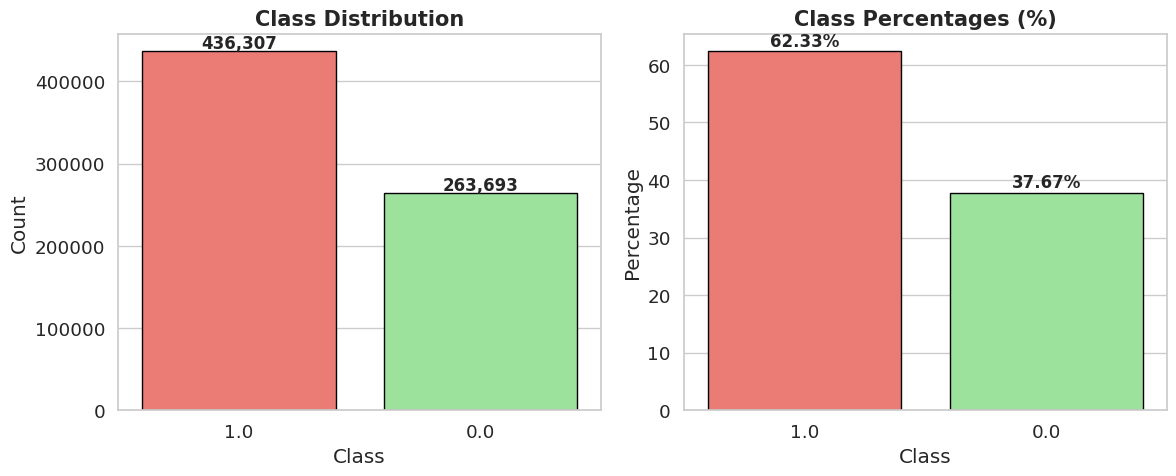

In [12]:
# Class counts and percentages
class_counts = train[target].value_counts()
class_percent = train[target].value_counts(normalize=True) * 100

# Custom colors
colors = ['#FF6961', '#90EE90']   # red & light green

# Apply modern seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# --- Create side-by-side plots ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# =====================
# Plot 1: Class Counts
# =====================
sns.barplot(
    x=class_counts.index.astype(str),
    y=class_counts.values,
    palette=colors,
    ax=axes[0],
    edgecolor="black"
)

axes[0].set_title("Class Distribution", fontsize=15, weight='bold')
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Show values on top of bars
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + max(class_counts.values)*0.01, f"{v:,}", 
                 ha='center', fontsize=12, weight='bold')

# =====================
# Plot 2: Percentages
# =====================
sns.barplot(
    x=class_percent.index.astype(str),
    y=class_percent.values,
    palette=colors,
    ax=axes[1],
    edgecolor="black"
)

axes[1].set_title("Class Percentages (%)", fontsize=15, weight='bold')
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Percentage")

# Show percentage values
for i, v in enumerate(class_percent.values):
    axes[1].text(i, v + 1, f"{v:.2f}%", 
                 ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


## Univariate Analysis

### Numerical Columns

📌 Feature: age
count    700000.000000
mean         50.359734
std          11.655520
min          19.000000
25%          42.000000
50%          50.000000
75%          58.000000
max          89.000000
Name: age, dtype: float64 

Skewness: 0.021
Zero %: 0.00%
Outliers: 1013
Outlier %: 0.14%
Min: 19 | Max: 89 | Mean: 50.36 | Median: 50.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


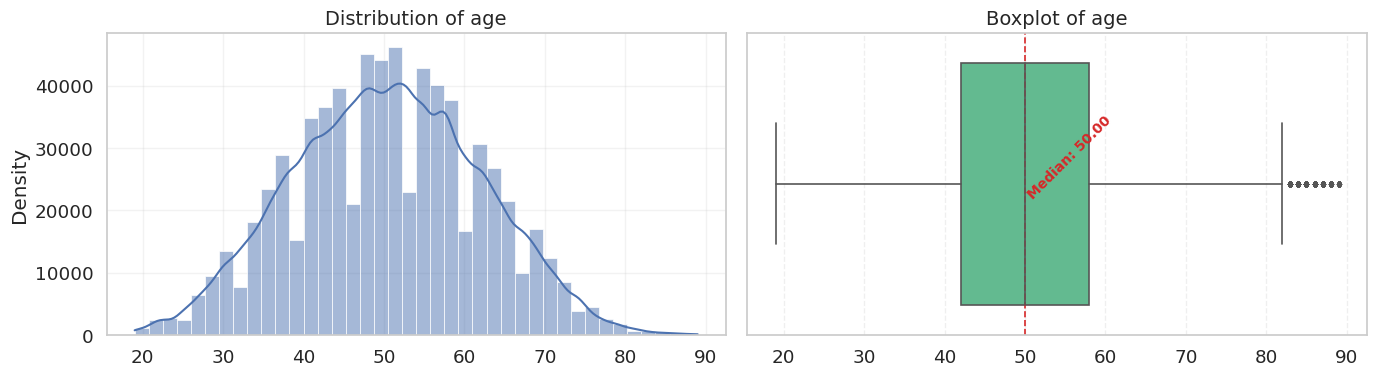

📌 Feature: physical_activity_minutes_per_week
count    700000.000000
mean         80.230803
std          51.195071
min           1.000000
25%          49.000000
50%          71.000000
75%          96.000000
max         747.000000
Name: physical_activity_minutes_per_week, dtype: float64 

Skewness: 2.814
Zero %: 0.00%
Outliers: 33490
Outlier %: 4.78%
Min: 1 | Max: 747 | Mean: 80.23 | Median: 71.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


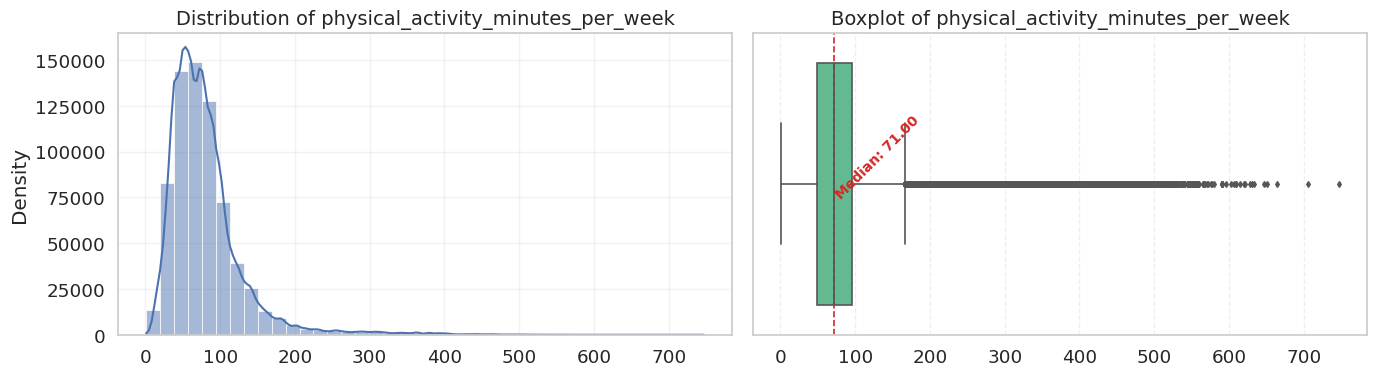

📌 Feature: diet_score
count    700000.000000
mean          5.963695
std           1.463336
min           0.100000
25%           5.000000
50%           6.000000
75%           7.000000
max           9.900000
Name: diet_score, dtype: float64 

Skewness: -0.063
Zero %: 0.00%
Outliers: 1997
Outlier %: 0.29%
Min: 0.1 | Max: 9.9 | Mean: 5.96 | Median: 6.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


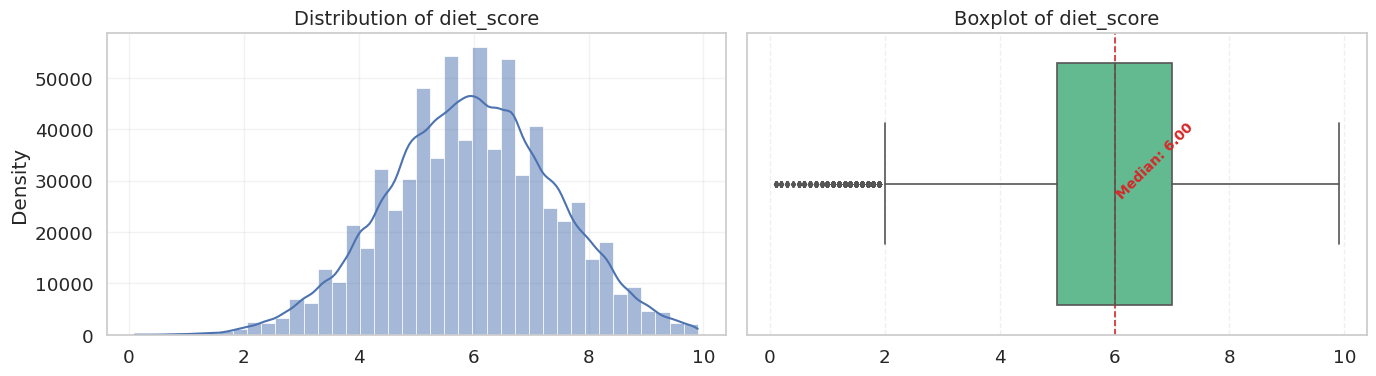

📌 Feature: sleep_hours_per_day
count    700000.000000
mean          7.002200
std           0.901907
min           3.100000
25%           6.400000
50%           7.000000
75%           7.600000
max           9.900000
Name: sleep_hours_per_day, dtype: float64 

Skewness: 0.001
Zero %: 0.00%
Outliers: 6152
Outlier %: 0.88%
Min: 3.1 | Max: 9.9 | Mean: 7.00 | Median: 7.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


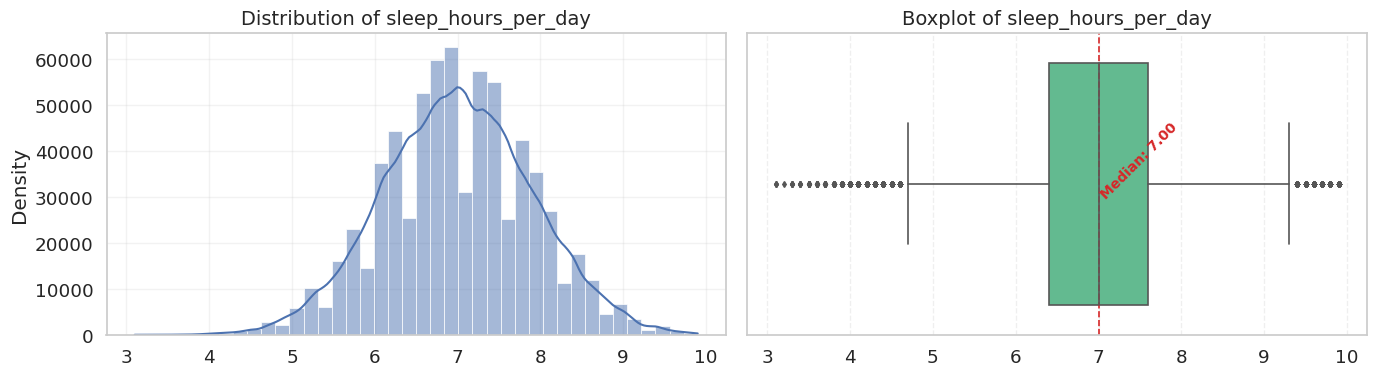

📌 Feature: screen_time_hours_per_day
count    700000.000000
mean          6.012733
std           2.022707
min           0.600000
25%           4.600000
50%           6.000000
75%           7.400000
max          16.500000
Name: screen_time_hours_per_day, dtype: float64 

Skewness: 0.114
Zero %: 0.00%
Outliers: 2337
Outlier %: 0.33%
Min: 0.6 | Max: 16.5 | Mean: 6.01 | Median: 6.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


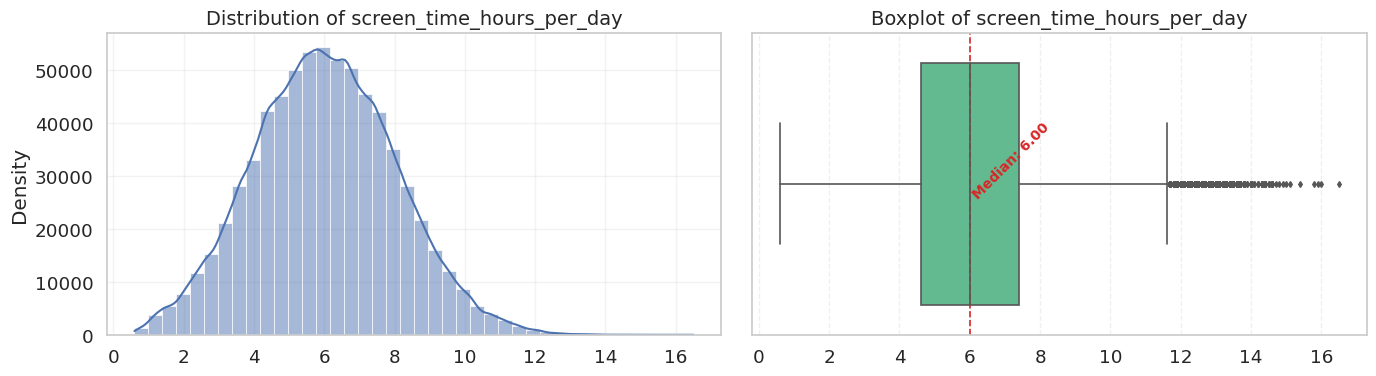

📌 Feature: bmi
count    700000.000000
mean         25.874684
std           2.860705
min          15.100000
25%          23.900000
50%          25.900000
75%          27.800000
max          38.400000
Name: bmi, dtype: float64 

Skewness: 0.032
Zero %: 0.00%
Outliers: 4254
Outlier %: 0.61%
Min: 15.1 | Max: 38.4 | Mean: 25.87 | Median: 25.90


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


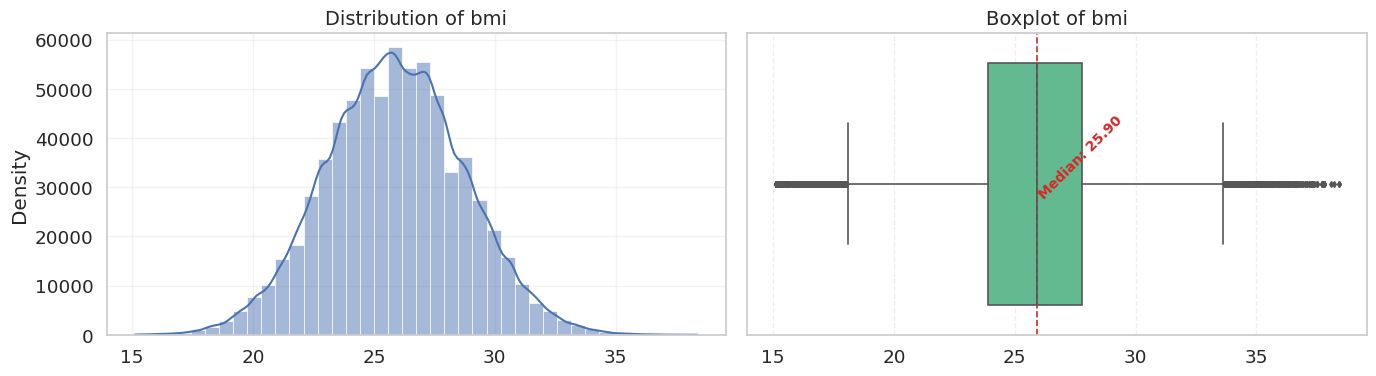

📌 Feature: waist_to_hip_ratio
count    700000.000000
mean          0.858766
std           0.037980
min           0.680000
25%           0.830000
50%           0.860000
75%           0.880000
max           1.050000
Name: waist_to_hip_ratio, dtype: float64 

Skewness: 0.038
Zero %: 0.00%
Outliers: 6159
Outlier %: 0.88%
Min: 0.68 | Max: 1.05 | Mean: 0.86 | Median: 0.86


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


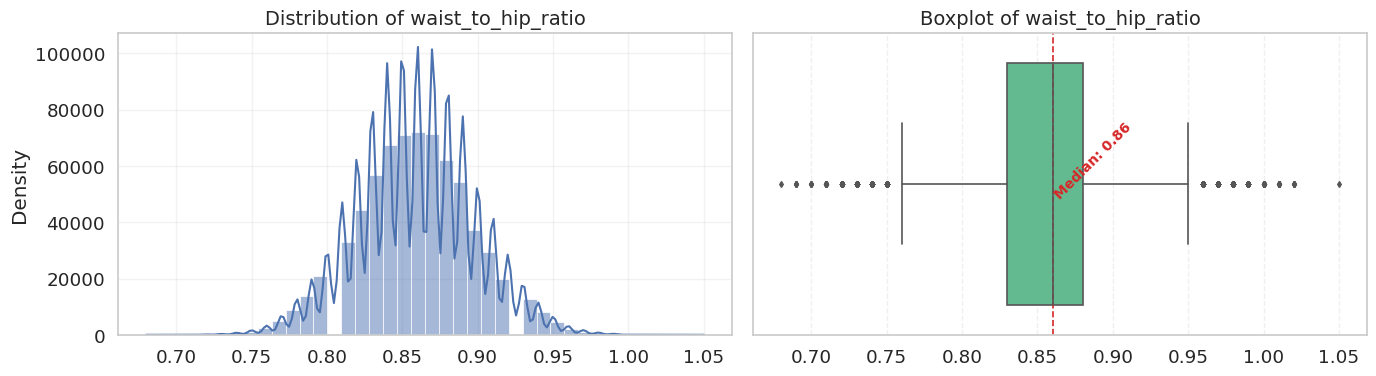

📌 Feature: systolic_bp
count    700000.000000
mean        116.294193
std          11.010390
min          91.000000
25%         108.000000
50%         116.000000
75%         124.000000
max         163.000000
Name: systolic_bp, dtype: float64 

Skewness: 0.097
Zero %: 0.00%
Outliers: 775
Outlier %: 0.11%
Min: 91 | Max: 163 | Mean: 116.29 | Median: 116.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


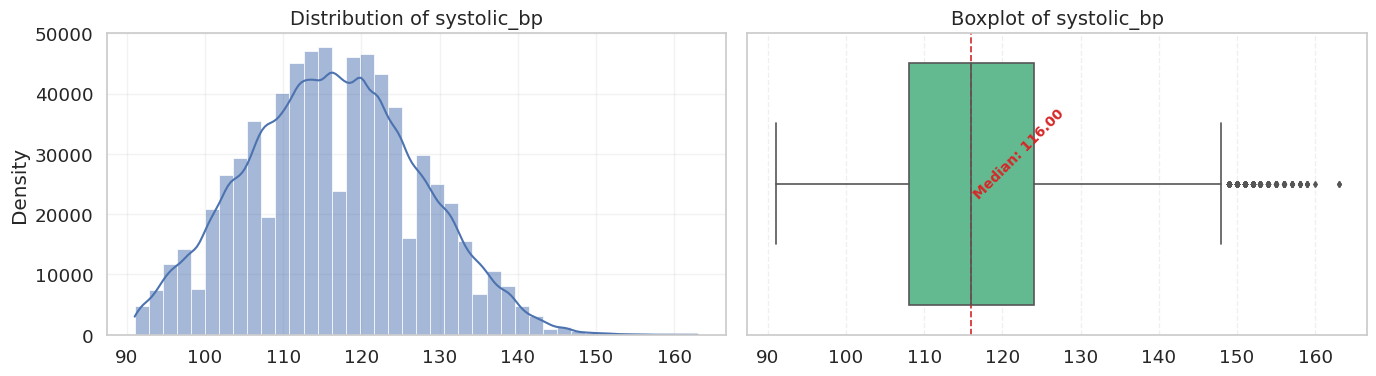

📌 Feature: diastolic_bp
count    700000.000000
mean         75.440924
std           6.825775
min          51.000000
25%          71.000000
50%          75.000000
75%          80.000000
max         104.000000
Name: diastolic_bp, dtype: float64 

Skewness: -0.001
Zero %: 0.00%
Outliers: 5752
Outlier %: 0.82%
Min: 51 | Max: 104 | Mean: 75.44 | Median: 75.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


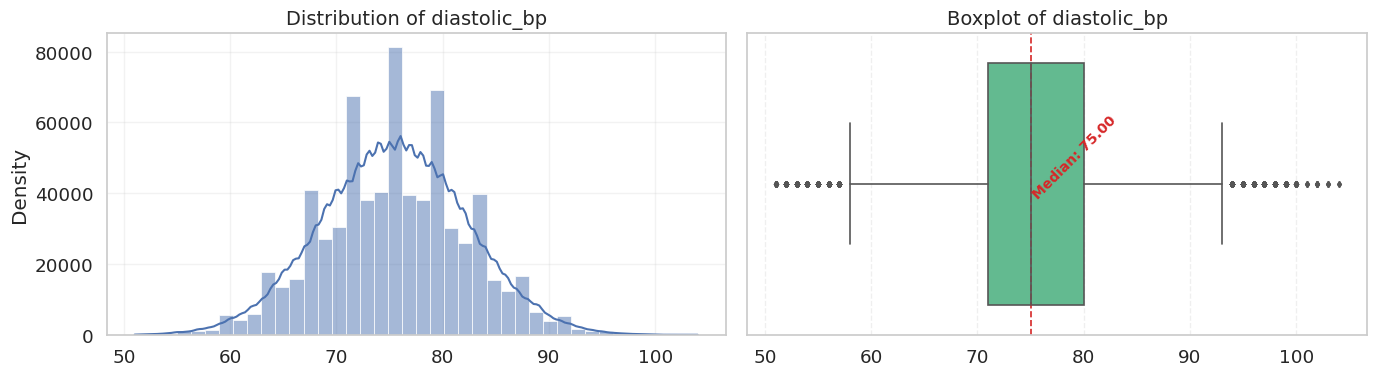

📌 Feature: heart_rate
count    700000.000000
mean         70.167749
std           6.938722
min          42.000000
25%          65.000000
50%          70.000000
75%          75.000000
max         101.000000
Name: heart_rate, dtype: float64 

Skewness: -0.013
Zero %: 0.00%
Outliers: 1797
Outlier %: 0.26%
Min: 42 | Max: 101 | Mean: 70.17 | Median: 70.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


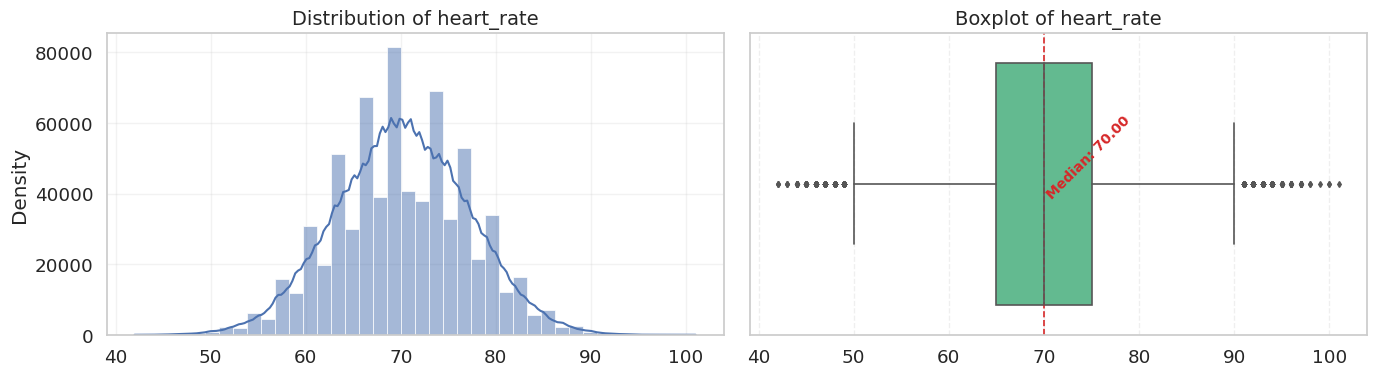

📌 Feature: cholesterol_total
count    700000.000000
mean        186.818801
std          16.730832
min         117.000000
25%         175.000000
50%         187.000000
75%         199.000000
max         289.000000
Name: cholesterol_total, dtype: float64 

Skewness: 0.061
Zero %: 0.00%
Outliers: 1771
Outlier %: 0.25%
Min: 117 | Max: 289 | Mean: 186.82 | Median: 187.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


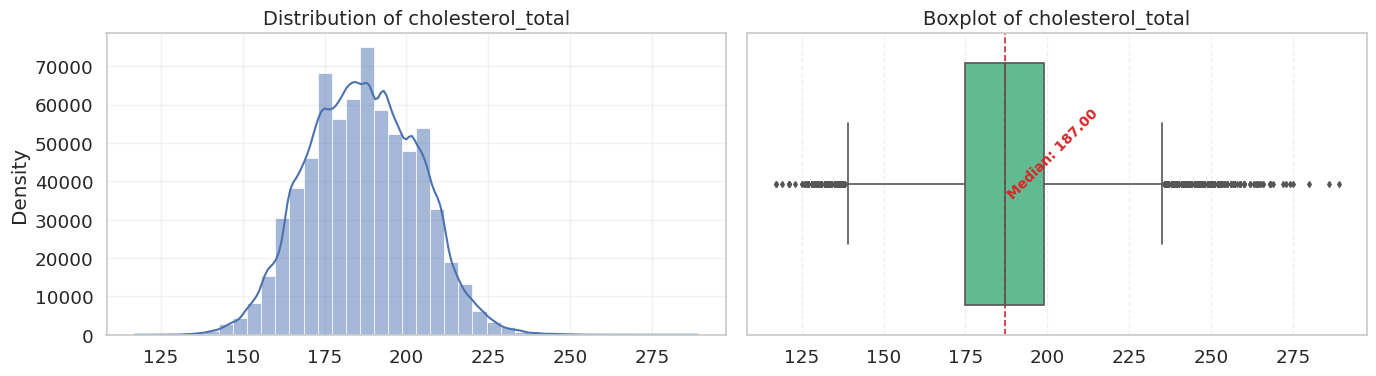

📌 Feature: hdl_cholesterol
count    700000.000000
mean         53.823214
std           8.266545
min          21.000000
25%          48.000000
50%          54.000000
75%          59.000000
max          90.000000
Name: hdl_cholesterol, dtype: float64 

Skewness: -0.021
Zero %: 0.00%
Outliers: 4693
Outlier %: 0.67%
Min: 21 | Max: 90 | Mean: 53.82 | Median: 54.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


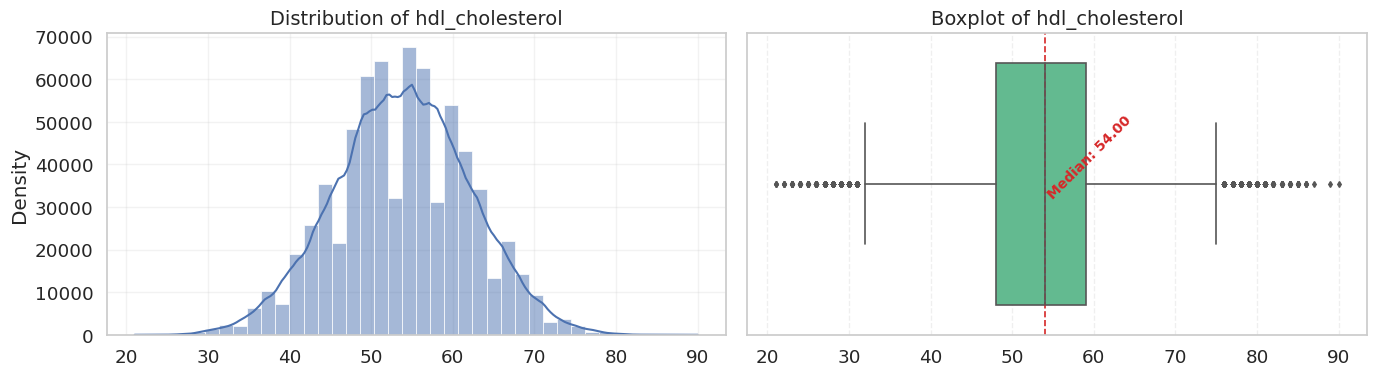

📌 Feature: ldl_cholesterol
count    700000.000000
mean        102.905854
std          19.022416
min          51.000000
25%          89.000000
50%         103.000000
75%         116.000000
max         205.000000
Name: ldl_cholesterol, dtype: float64 

Skewness: 0.132
Zero %: 0.00%
Outliers: 2290
Outlier %: 0.33%
Min: 51 | Max: 205 | Mean: 102.91 | Median: 103.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


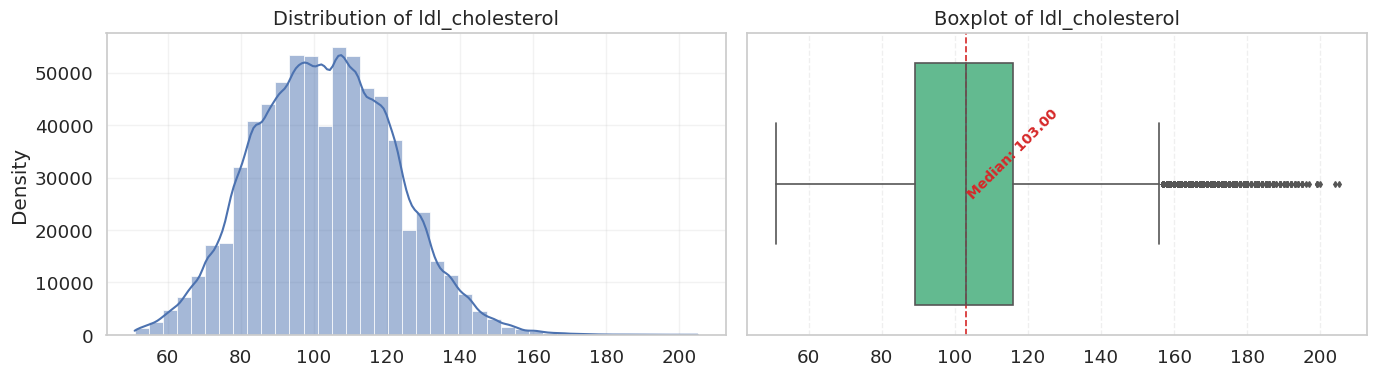

📌 Feature: triglycerides
count    700000.000000
mean        123.081850
std          24.739397
min          31.000000
25%         106.000000
50%         123.000000
75%         139.000000
max         290.000000
Name: triglycerides, dtype: float64 

Skewness: 0.192
Zero %: 0.00%
Outliers: 9053
Outlier %: 1.29%
Min: 31 | Max: 290 | Mean: 123.08 | Median: 123.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


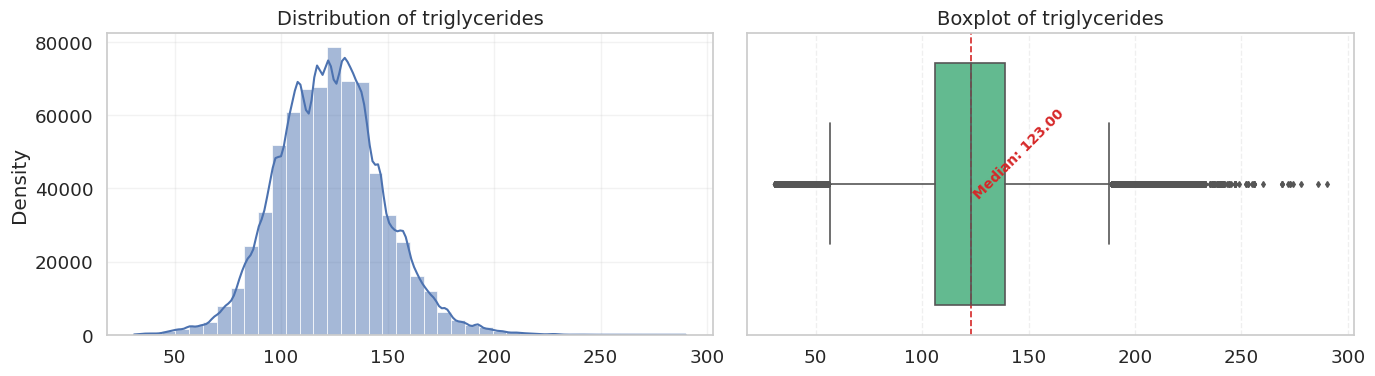

In [13]:

for col in true_num_cols:
    if col in ("id", target):
        continue
        
    print("="*70)
    print(f"📌 Feature: {col}")
    print("="*70)
    
    # Basic Stats
    print(train[col].describe(), "\n")
    
    # Skewness
    print(f"Skewness: {train[col].skew():.3f}")
    
    # Zero-inflation
    print(f"Zero %: {(train[col] == 0).mean()*100:.2f}%")
    
    # Outlier Count using IQR
    Q1, Q3 = train[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = ((train[col] < lower) | (train[col] > upper)).sum()
    print(f"Outliers: {outliers}")
    
    # Percentage of outliers
    outlier_pct = (outliers / len(train[col])) * 100
    print(f"Outlier %: {outlier_pct:.2f}%")
    
    # Range
    print(f"Min: {train[col].min()} | Max: {train[col].max()} | Mean: {train[col].mean():.2f} | Median: {train[col].median():.2f}")
    
    # =======================
    #  Dual Plots
    # =======================
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # -------------------------------
    # Plot 1: Histogram + KDE
    # -------------------------------
    sns.histplot(
        train[col],
        bins=40,
        kde=True,
        ax=axes[0],
        color="#4C72B0",
        edgecolor="white",
        linewidth=0.5
    )
    
    axes[0].set_title(f"Distribution of {col}", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("Density")
    axes[0].grid(alpha=0.25)
    
    # -------------------------------
    # Plot 2:  Boxplot
    # -------------------------------
    sns.boxplot(
        x=train[col],
        ax=axes[1],
        color="#55C890",
        linewidth=1.2,
        fliersize=3
    )
    
    median = train[col].median()
    axes[1].axvline(median, color="#D62728", linestyle="--", linewidth=1.2)
    
    axes[1].text(
        median,
        0.05,
        f"Median: {median:.2f}",
        color="#D62728",
        fontsize=10,
        rotation=45,
        ha="left",
        weight="bold"
    )
    
    axes[1].set_title(f"Boxplot of {col}", fontsize=14)
    axes[1].set_xlabel("")
    axes[1].grid(axis="x", linestyle="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()
 

**Age**

Age is normally distributed around 50 years with almost no outliers, meaning the population age profile is clean and balanced.

**Physical Activity (minutes/week)**

Physical activity is heavily right-skewed with many high-end outliers, meaning a small group exercises far more than the average user.

**Diet Score**

Diet score is centered around 6 with minimal skew and few outliers, meaning eating habits are stable and consistently reported.

**Sleep Hours per Day**

Sleep hours cluster tightly around 7 hours with very low skew, meaning the population follows a typical sleep pattern.

**Screen Time (hours/day)**

Screen time averages ~6 hours with a mild right tail, meaning most people fall within a reasonable daily usage window.

**BMI**

BMI is centered at ~26 with a nearly normal shape, indicating a typical adult weight distribution with minimal anomalies.

**Waist-to-Hip Ratio**

Waist-to-hip ratio is tightly centered around 0.86, meaning body composition values are stable and physiologically consistent.

**Systolic BP**

Systolic BP averages 116 with almost no outliers, meaning readings fall well within expected clinical ranges.

**Diastolic BP**

Diastolic BP averages 75 and is symmetrically distributed, meaning the variable reflects a normal healthy population pattern.

**Heart Rate**

Heart rate centers around 70 BPM with minimal skew, meaning measurements reflect typical resting heart rate ranges.

**Total Cholesterol**

Total cholesterol averages 187 with a clean distribution, meaning values align with standard adult cholesterol patterns.

**HDL Cholesterol**

HDL averages 54 with light variability, meaning "good cholesterol" levels are evenly distributed across the population.

**LDL Cholesterol**

LDL centers around 103 with mild right skew, meaning “bad cholesterol” levels are mostly normal with a few higher cases.

**Triglycerides**

Triglycerides average 123 with a modest right tail, meaning most values are normal but some individuals have elevated levels.

### Categorical Columns 

Categorical Feature: gender
 Value Counts:
gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64 

 Category Frequency (%):
gender
Female    51.89
Male      47.58
Other      0.53
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): ['Other']
 High Cardinality: NO (3 unique values)




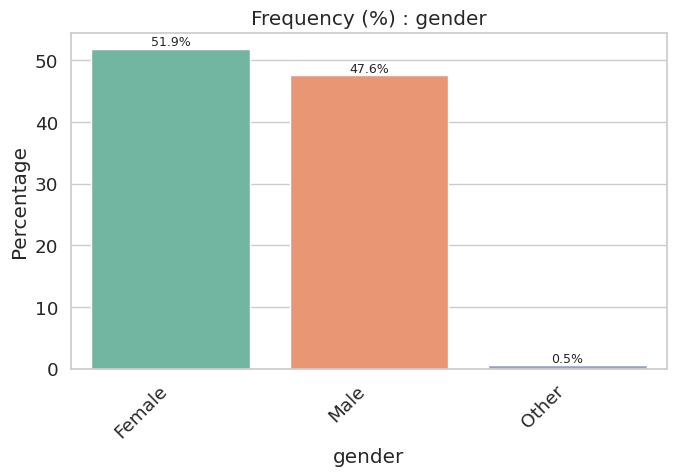

Categorical Feature: ethnicity
 Value Counts:
ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64 

 Category Frequency (%):
ethnicity
White       55.16
Hispanic    18.57
Black       15.19
Asian        8.59
Other        2.49
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (5 unique values)




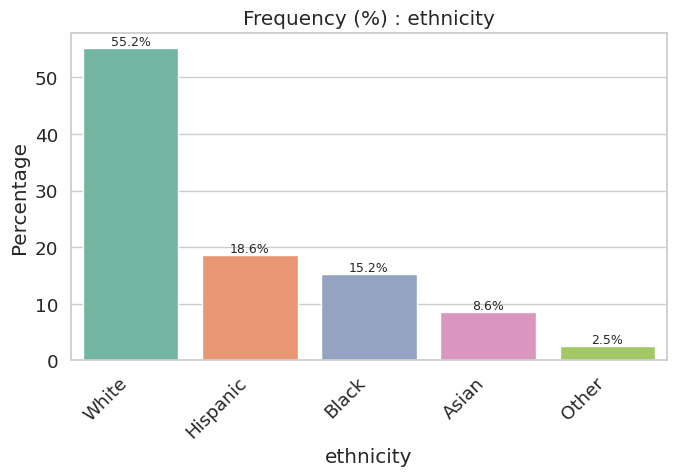

Categorical Feature: education_level
 Value Counts:
education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64 

 Category Frequency (%):
education_level
Highschool      49.16
Graduate        37.32
Postgraduate    11.38
No formal        2.14
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (4 unique values)




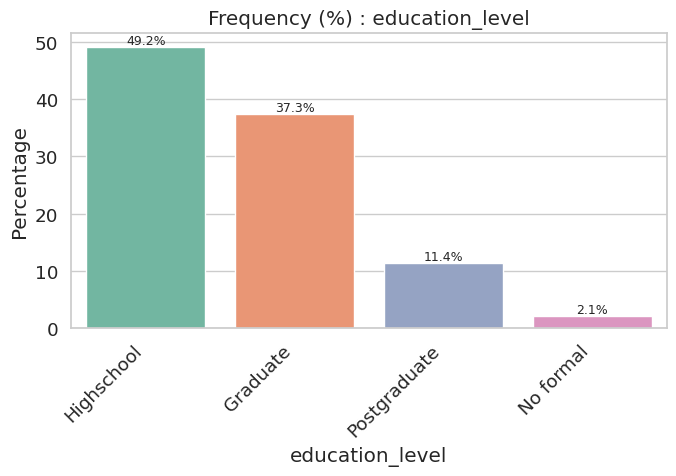

Categorical Feature: income_level
 Value Counts:
income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64 

 Category Frequency (%):
income_level
Middle          41.51
Lower-Middle    25.51
Upper-Middle    18.26
Low             12.26
High             2.46
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (5 unique values)




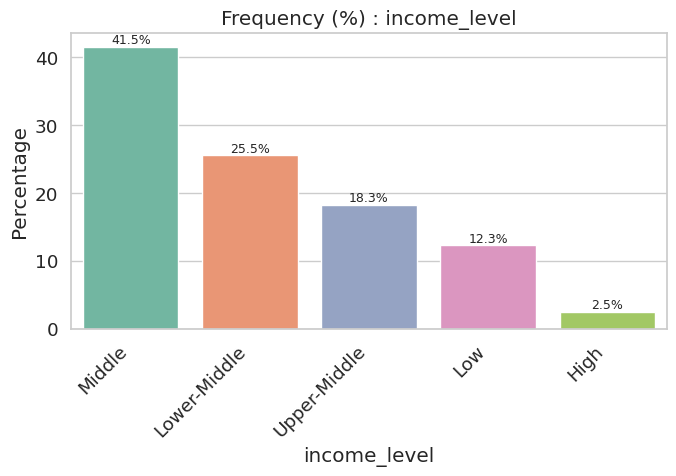

Categorical Feature: smoking_status
 Value Counts:
smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64 

 Category Frequency (%):
smoking_status
Never      70.64
Current    14.77
Former     14.60
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (3 unique values)




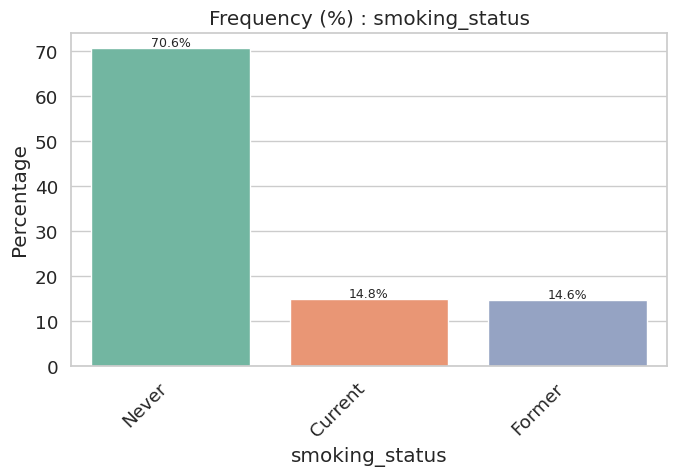

Categorical Feature: employment_status
 Value Counts:
employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64 

 Category Frequency (%):
employment_status
Employed      73.74
Retired       16.53
Unemployed     7.11
Student        2.62
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (4 unique values)




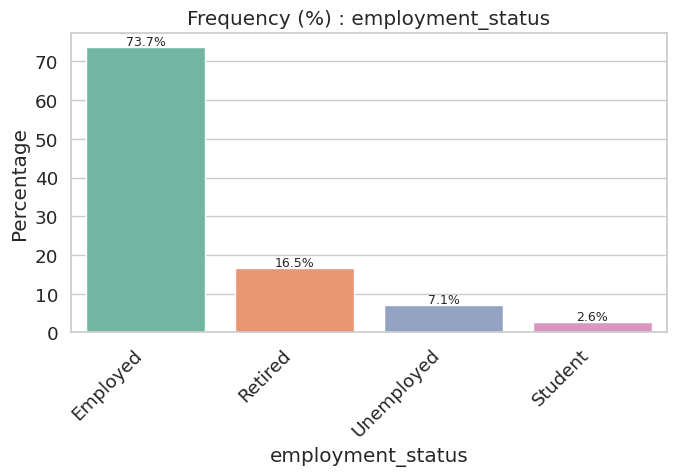

Categorical Feature: family_history_diabetes
 Value Counts:
family_history_diabetes
0    595419
1    104581
Name: count, dtype: int64 

 Category Frequency (%):
family_history_diabetes
0    85.06
1    14.94
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (2 unique values)




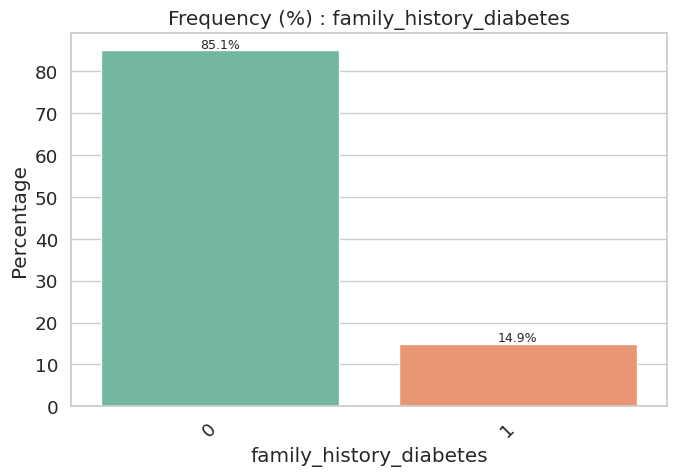

Categorical Feature: hypertension_history
 Value Counts:
hypertension_history
0    572607
1    127393
Name: count, dtype: int64 

 Category Frequency (%):
hypertension_history
0    81.8
1    18.2
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (2 unique values)




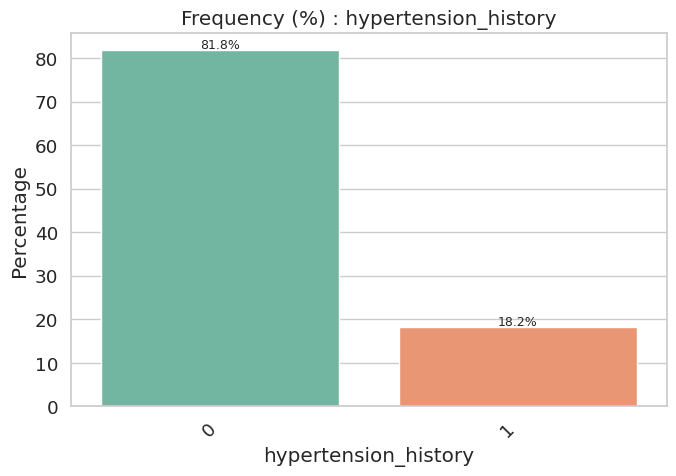

Categorical Feature: cardiovascular_history
 Value Counts:
cardiovascular_history
0    678773
1     21227
Name: count, dtype: int64 

 Category Frequency (%):
cardiovascular_history
0    96.97
1     3.03
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): None
 High Cardinality: NO (2 unique values)




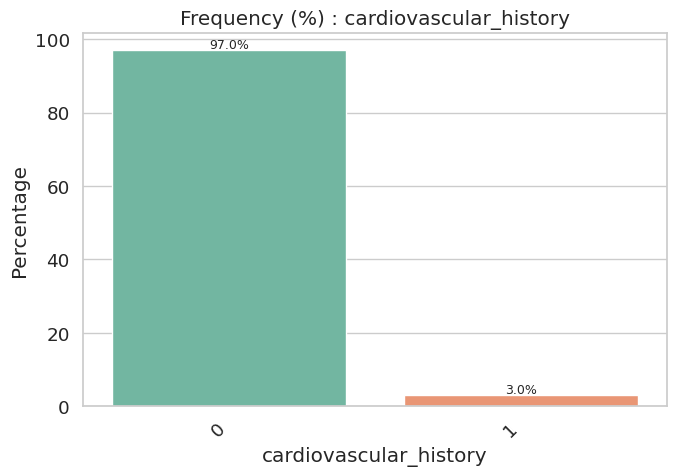

Categorical Feature: alcohol_consumption_per_week
 Value Counts:
alcohol_consumption_per_week
2    246592
1    246311
3    137565
4     52973
5     13322
6      2728
7       447
8        59
9         3
Name: count, dtype: int64 

 Category Frequency (%):
alcohol_consumption_per_week
2    35.23
1    35.19
3    19.65
4     7.57
5     1.90
6     0.39
7     0.06
8     0.01
9     0.00
Name: proportion, dtype: float64 

 Rare Categories (< 1.0%): [6, 7, 8, 9]
 High Cardinality: NO (9 unique values)




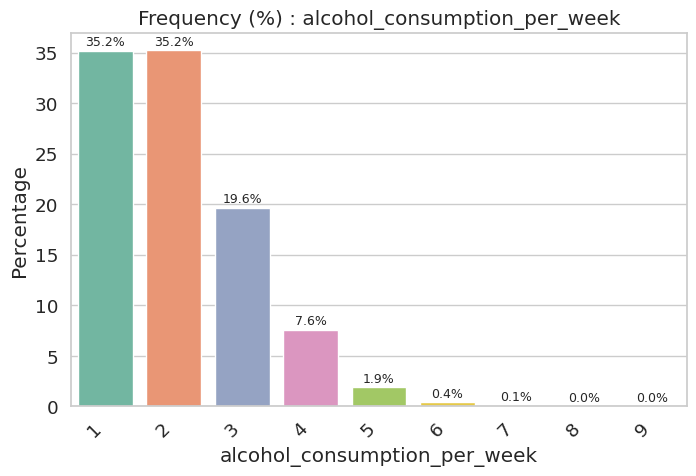

In [14]:
# Thresholds (you can change)
rare_threshold = 0.01      # 1%
cardinality_threshold = 20 # more than 20 unique categories = high-cardinality

for col in cat_cols:

    print("="*70)
    print(f"Categorical Feature: {col}")
    print("="*70)

    # --- Value Counts ---
    vc = train[col].value_counts()
    print(" Value Counts:")
    print(vc, "\n")

    # --- Frequency (%) ---
    freq_pct = (train[col].value_counts(normalize=True) * 100).round(2)
    print(" Category Frequency (%):")
    print(freq_pct, "\n")

    # --- Rare Categories ---
    rare_cats = freq_pct[freq_pct < (rare_threshold * 100)].index.tolist()
    print(f" Rare Categories (< {rare_threshold*100}%): {rare_cats if rare_cats else 'None'}")

    # --- High Cardinality Check ---
    unique_count = train[col].nunique()
    if unique_count > cardinality_threshold:
        print(f" High Cardinality: YES ({unique_count} unique values)")
    else:
        print(f" High Cardinality: NO ({unique_count} unique values)")

    print("\n")

    # --- PLOTS ---
    num_categories = len(freq_pct)

    # Auto-adjust width based on number of categories
    plt.figure(figsize=( max(7, num_categories * 0.8), 5 ))

    # FREQUENCY PLOT (BAR)
    sns.barplot(x=freq_pct.index, y=freq_pct.values, palette="Set2")
    plt.title(f"Frequency (%) : {col}")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(freq_pct.values):
        plt.text(
            i, v + 0.5,                # position (x=index, y=value+offset)
            f"{v:.1f}%",               # format label
            ha='center', fontsize=9
        )

    plt.tight_layout()
    plt.show()

## Bivariate Analysis

## Numerical vs Target

Numerical Feature vs Target: age
 Mean by Target:
diagnosed_diabetes
0.0    47.943484
1.0    51.820056
Name: age, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    48.0
1.0    52.0
Name: age, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


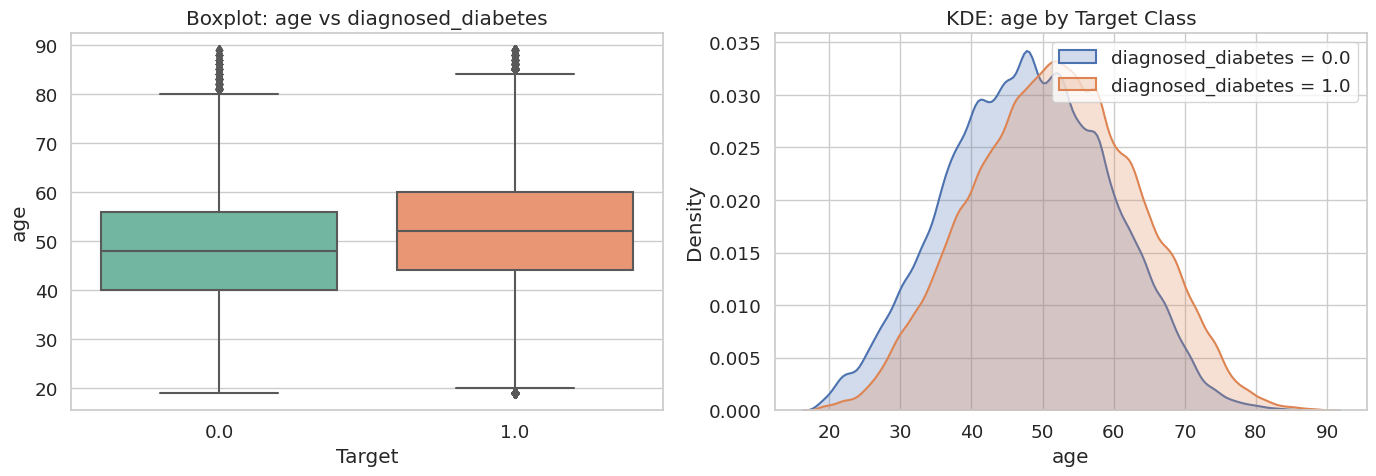

Numerical Feature vs Target: physical_activity_minutes_per_week
 Mean by Target:
diagnosed_diabetes
0.0    91.411873
1.0    73.473245
Name: physical_activity_minutes_per_week, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    79.0
1.0    65.0
Name: physical_activity_minutes_per_week, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


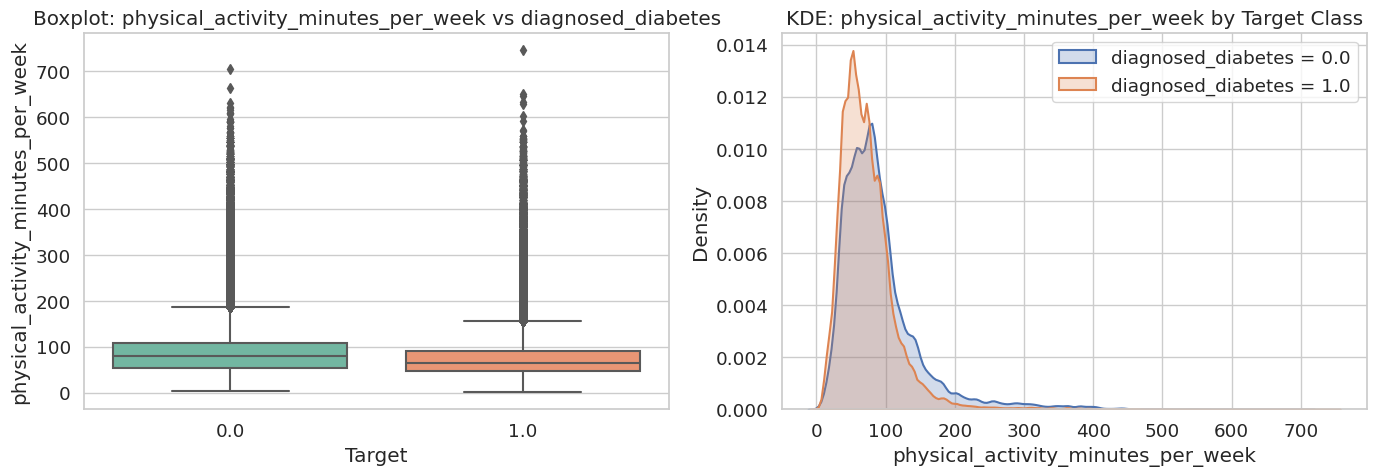

Numerical Feature vs Target: diet_score
 Mean by Target:
diagnosed_diabetes
0.0    6.058035
1.0    5.906678
Name: diet_score, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    6.1
1.0    5.9
Name: diet_score, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


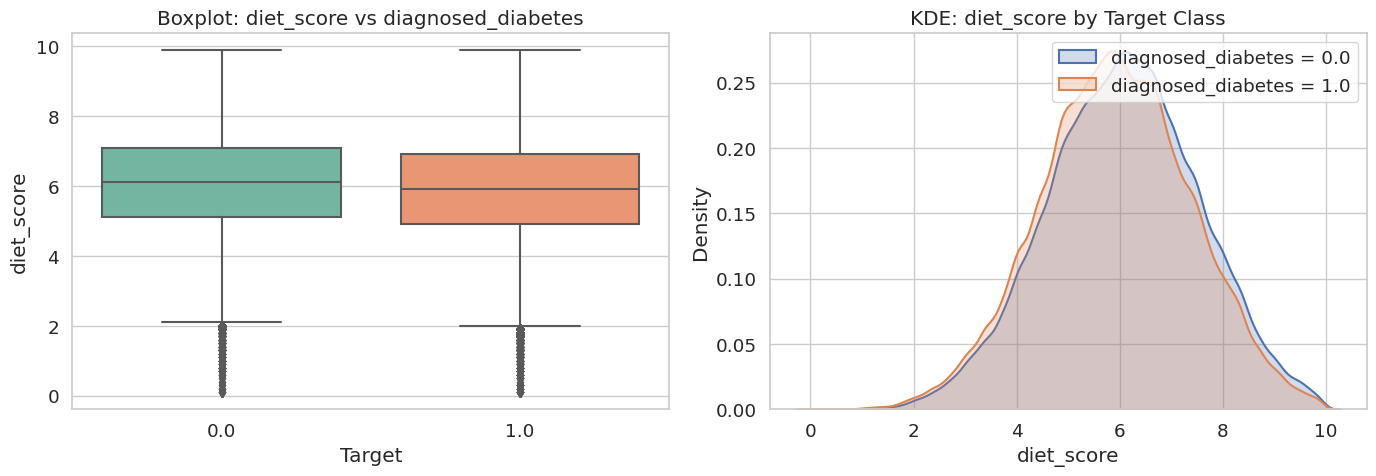

Numerical Feature vs Target: sleep_hours_per_day
 Mean by Target:
diagnosed_diabetes
0.0    6.998129
1.0    7.004660
Name: sleep_hours_per_day, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    7.0
1.0    7.0
Name: sleep_hours_per_day, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


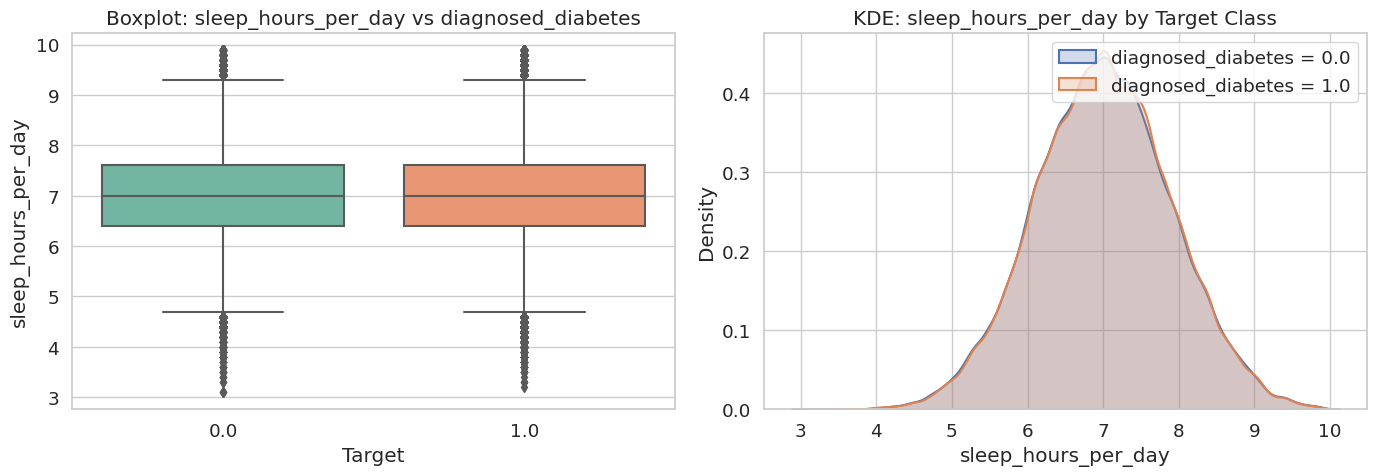

Numerical Feature vs Target: screen_time_hours_per_day
 Mean by Target:
diagnosed_diabetes
0.0    5.965346
1.0    6.041372
Name: screen_time_hours_per_day, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    5.9
1.0    6.0
Name: screen_time_hours_per_day, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


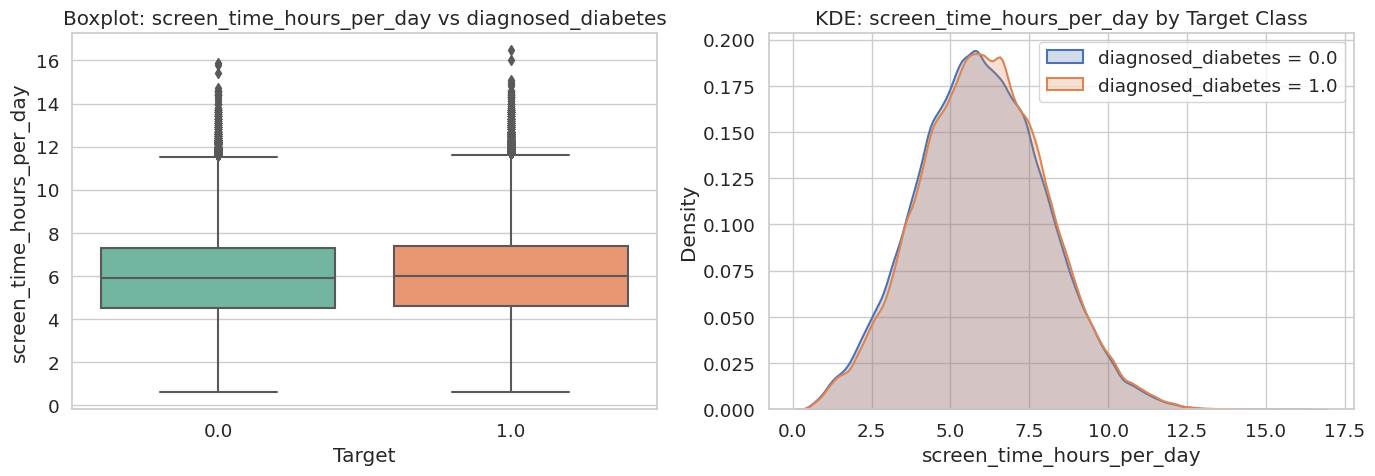

Numerical Feature vs Target: bmi
 Mean by Target:
diagnosed_diabetes
0.0    25.486175
1.0    26.109489
Name: bmi, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    25.5
1.0    26.1
Name: bmi, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


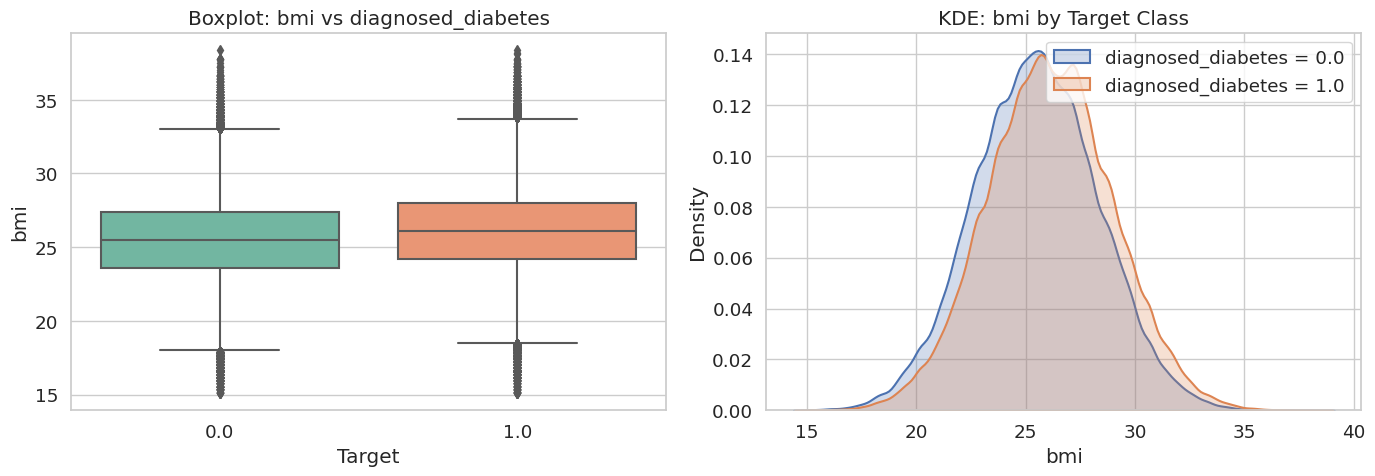

Numerical Feature vs Target: waist_to_hip_ratio
 Mean by Target:
diagnosed_diabetes
0.0    0.854806
1.0    0.861159
Name: waist_to_hip_ratio, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    0.85
1.0    0.86
Name: waist_to_hip_ratio, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


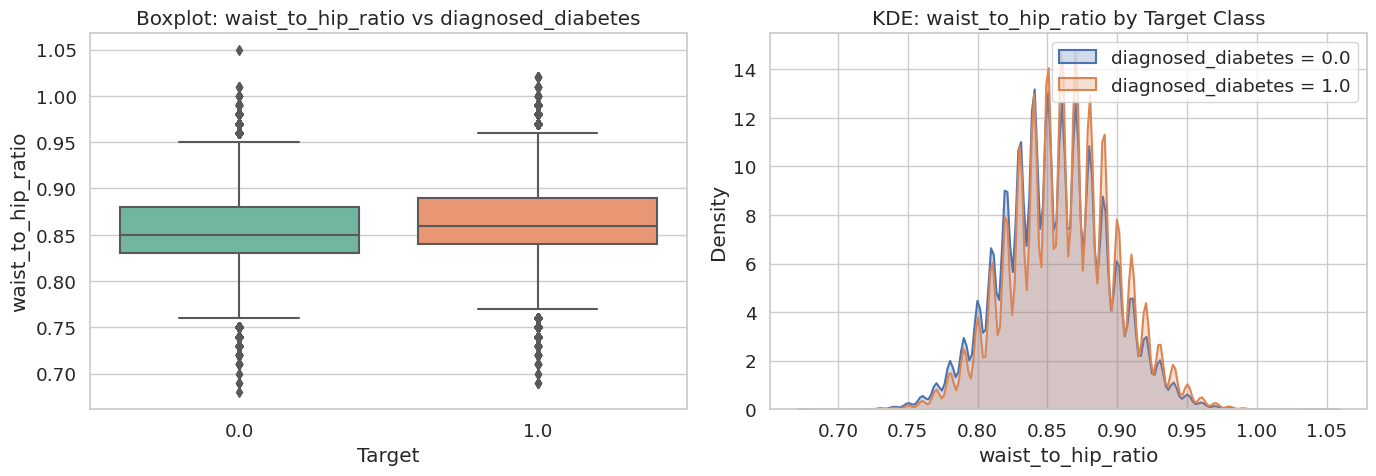

Numerical Feature vs Target: systolic_bp
 Mean by Target:
diagnosed_diabetes
0.0    114.776907
1.0    117.211202
Name: systolic_bp, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    115.0
1.0    117.0
Name: systolic_bp, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


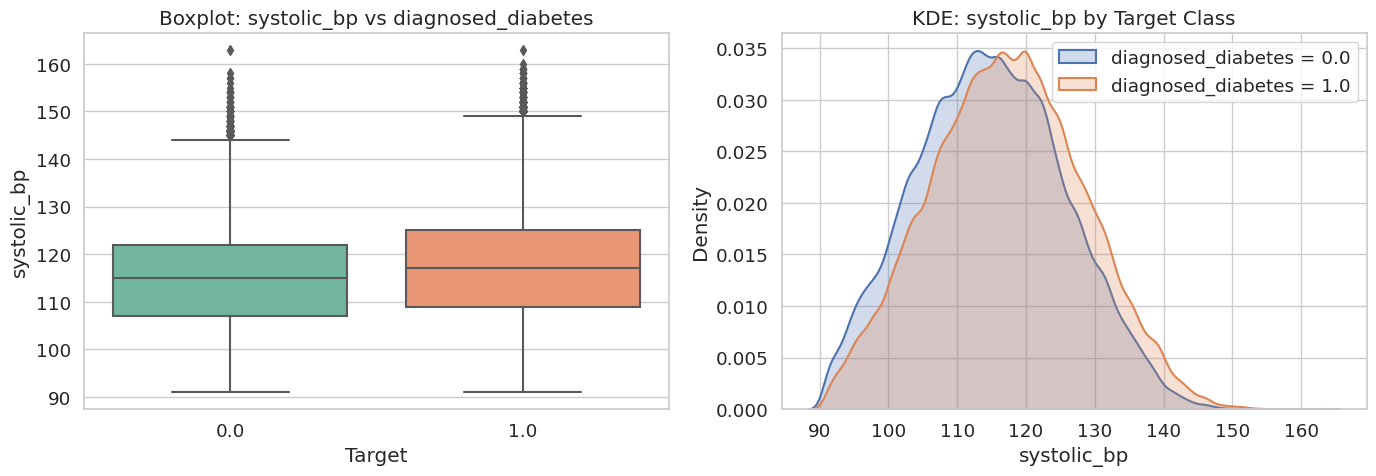

Numerical Feature vs Target: diastolic_bp
 Mean by Target:
diagnosed_diabetes
0.0    75.122464
1.0    75.633393
Name: diastolic_bp, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    75.0
1.0    76.0
Name: diastolic_bp, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


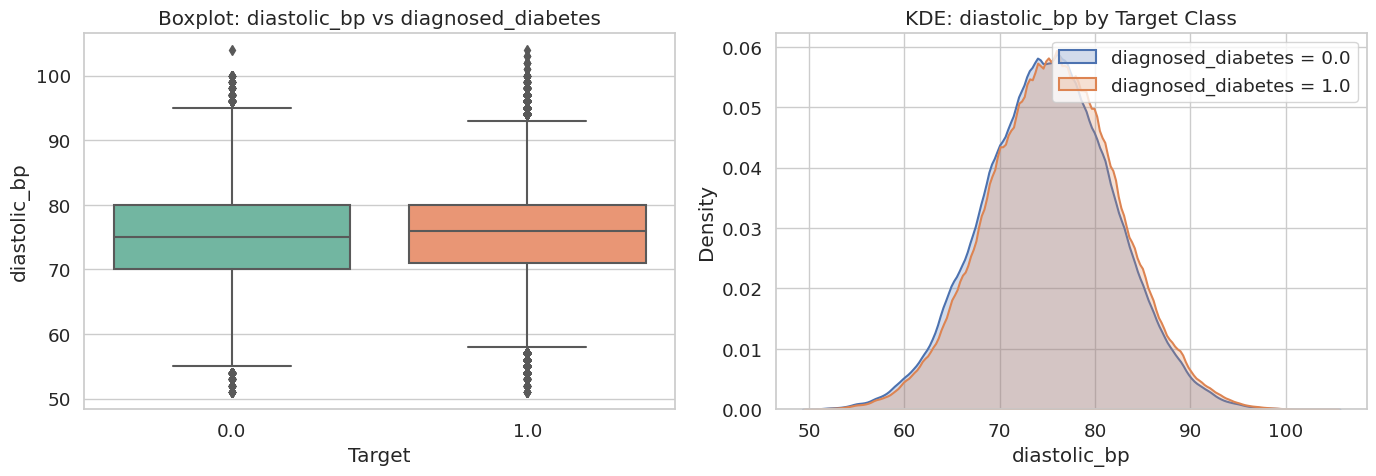

Numerical Feature vs Target: heart_rate
 Mean by Target:
diagnosed_diabetes
0.0    69.954747
1.0    70.296482
Name: heart_rate, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    70.0
1.0    70.0
Name: heart_rate, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


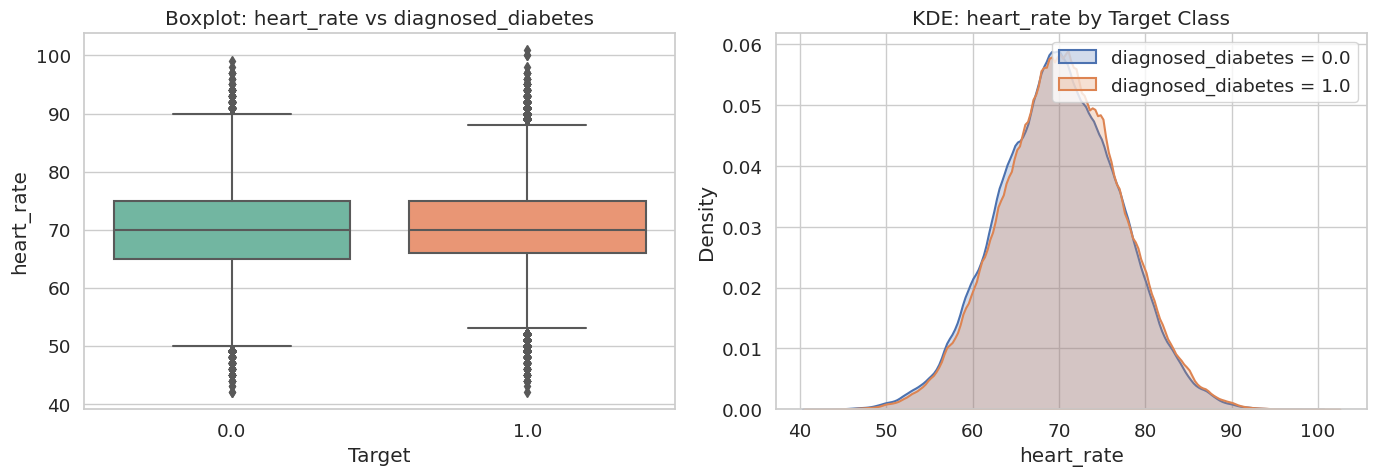

Numerical Feature vs Target: cholesterol_total
 Mean by Target:
diagnosed_diabetes
0.0    184.922531
1.0    187.964860
Name: cholesterol_total, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    185.0
1.0    188.0
Name: cholesterol_total, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


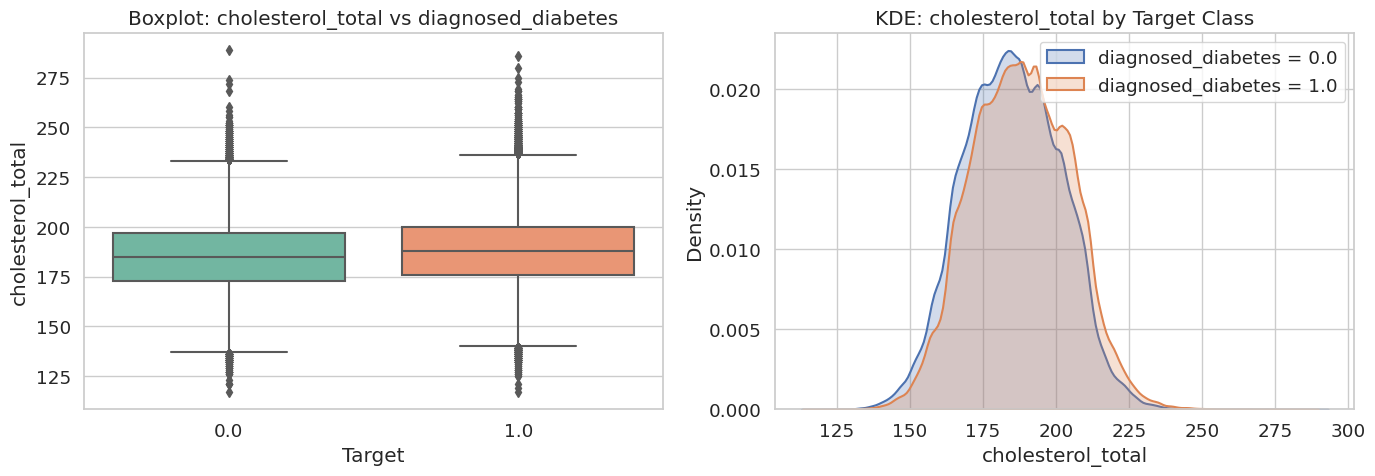

Numerical Feature vs Target: hdl_cholesterol
 Mean by Target:
diagnosed_diabetes
0.0    54.389237
1.0    53.481125
Name: hdl_cholesterol, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    54.0
1.0    54.0
Name: hdl_cholesterol, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


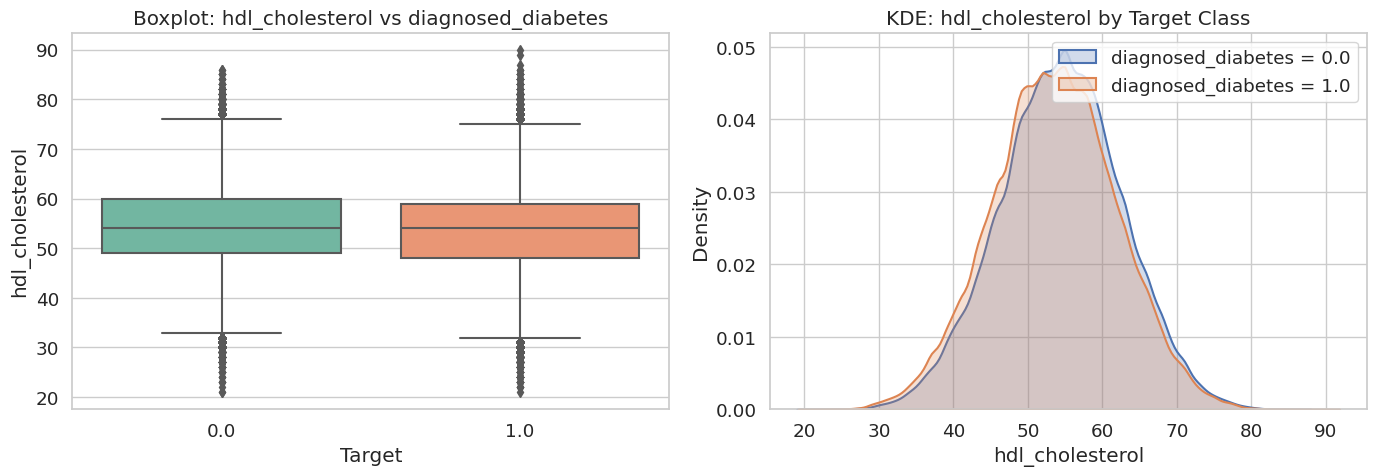

Numerical Feature vs Target: ldl_cholesterol
 Mean by Target:
diagnosed_diabetes
0.0    100.391167
1.0    104.425668
Name: ldl_cholesterol, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    100.0
1.0    104.0
Name: ldl_cholesterol, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


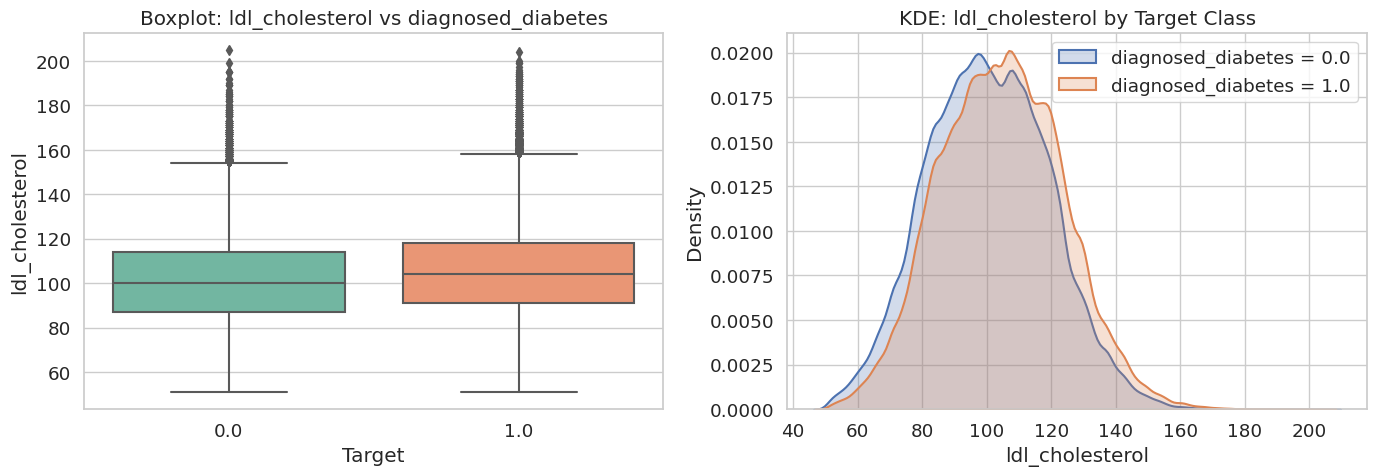

Numerical Feature vs Target: triglycerides
 Mean by Target:
diagnosed_diabetes
0.0    120.197593
1.0    124.825022
Name: triglycerides, dtype: float64 

 Median by Target:
diagnosed_diabetes
0.0    120.0
1.0    124.0
Name: triglycerides, dtype: float64 



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


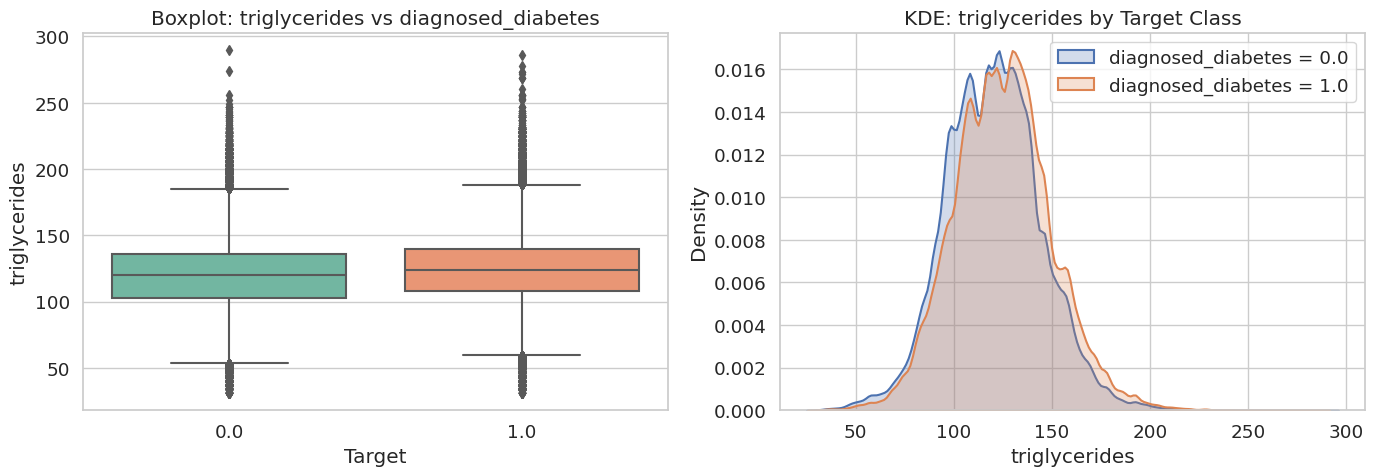

In [15]:
for col in true_num_cols:
    if col in ("id",target) :
        continue

    print("="*70)
    print(f"Numerical Feature vs Target: {col}")
    print("="*70)

    # --- Mean / Median Comparison ---
    means = train.groupby(target)[col].mean()
    medians = train.groupby(target)[col].median()

    print(" Mean by Target:")
    print(means, "\n")

    print(" Median by Target:")
    print(medians, "\n")

    # ---------------- PLOTS ----------------
    plt.figure(figsize=(14,5))

    # --- 1. BOX PLOT ---
    plt.subplot(1, 2, 1)
    sns.boxplot(x=train[target], y=train[col], palette="Set2")
    plt.title(f"Boxplot: {col} vs {target}")
    plt.xlabel("Target")
    plt.ylabel(col)

    # --- 2. KDE PLOT ---
    plt.subplot(1, 2, 2)
    for cls in sorted(train[target].unique()):
        sns.kdeplot(
            train[train[target] == cls][col],
            fill=True,
            label=f"{target} = {cls}",
            linewidth=1.5
        )

    plt.title(f"KDE: {col} by Target Class")
    plt.xlabel(col)
    plt.legend()

    plt.tight_layout()
    plt.show()

### Categorical vs Target

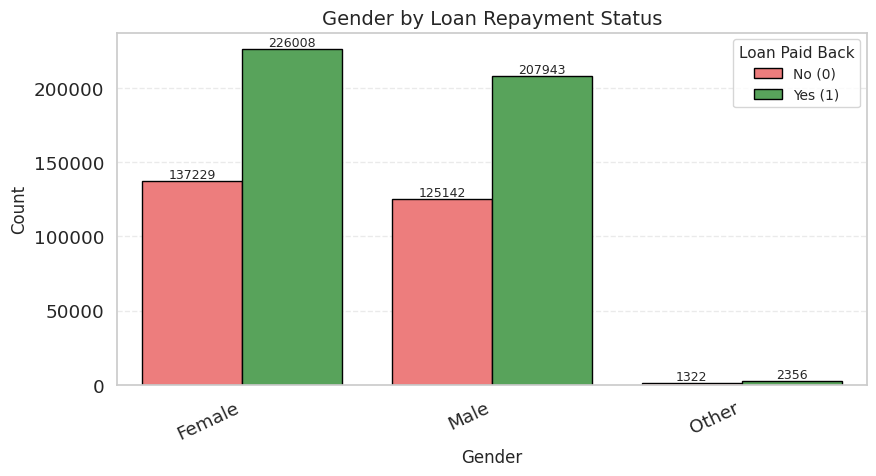

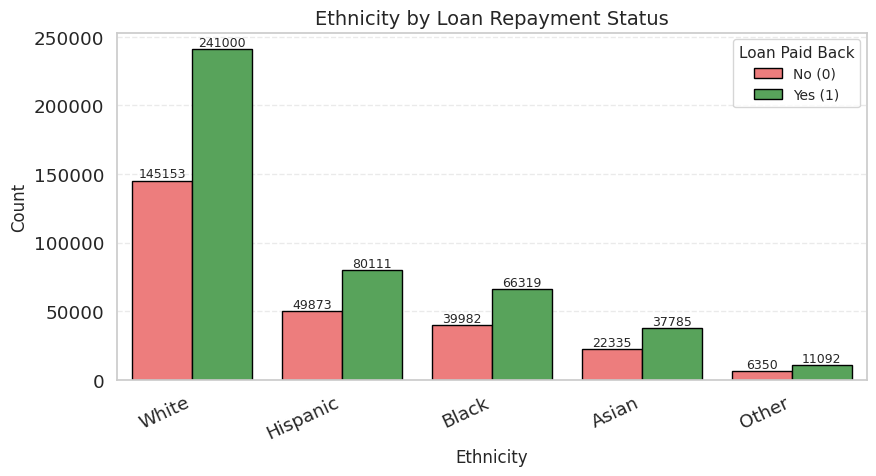

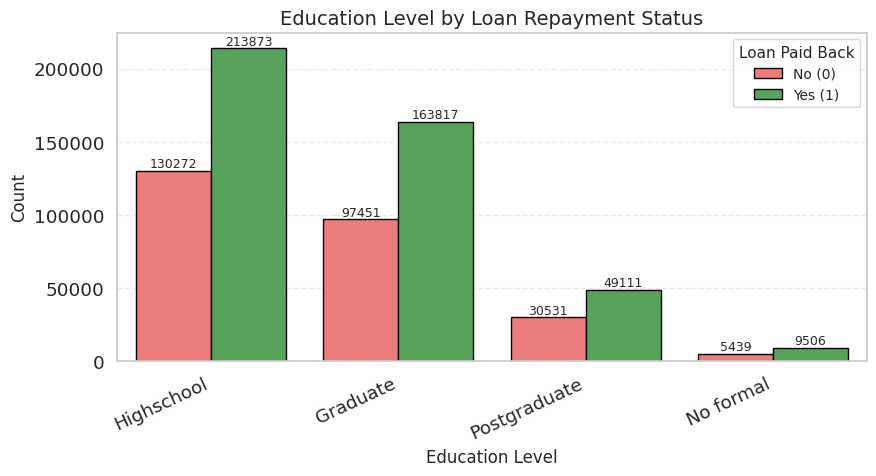

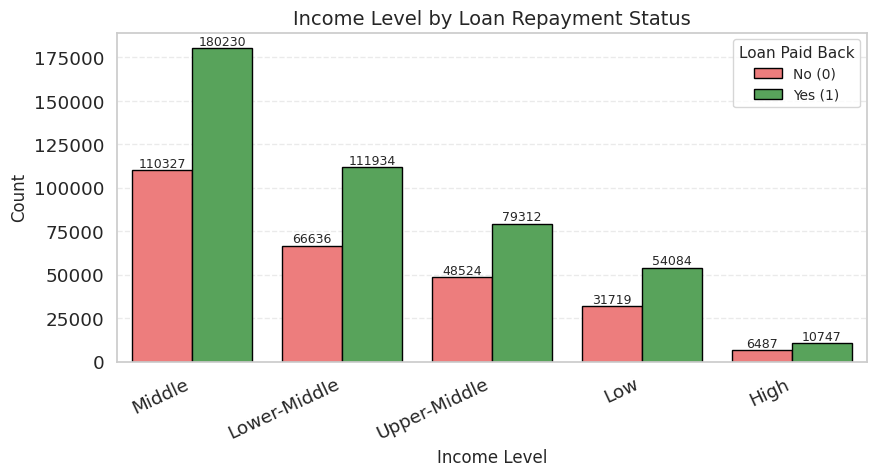

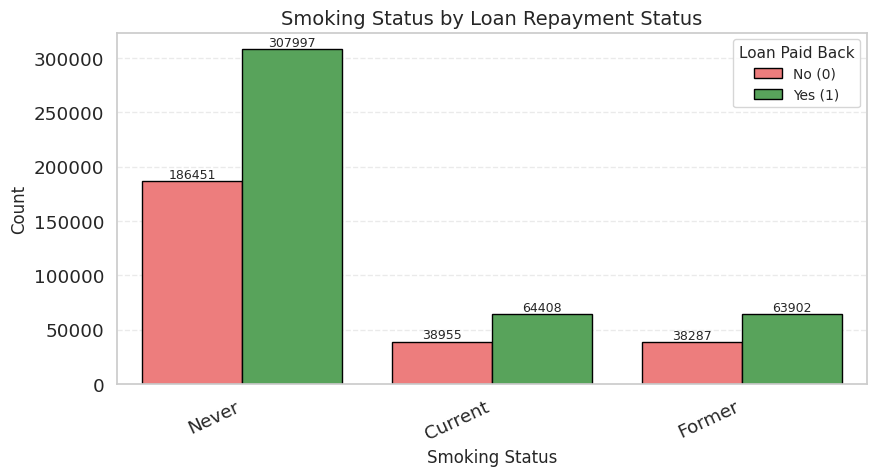

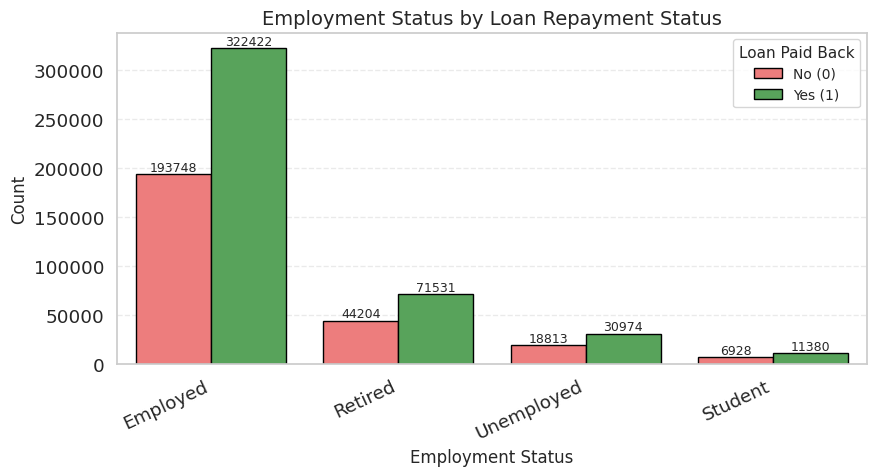

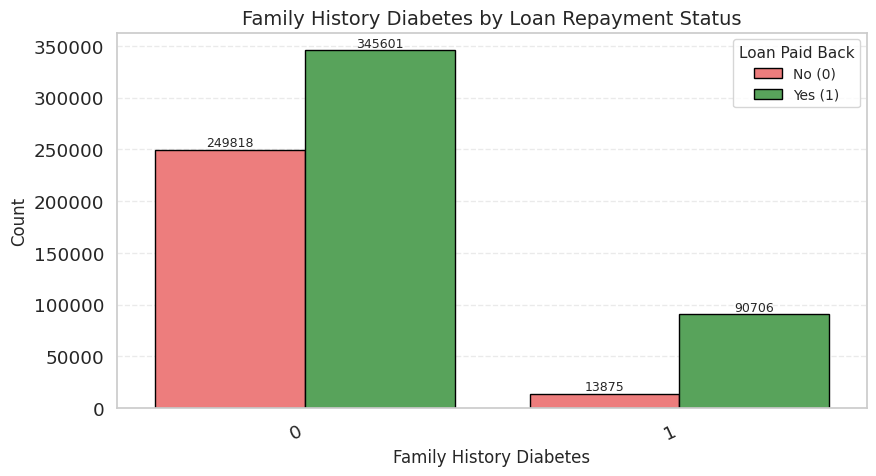

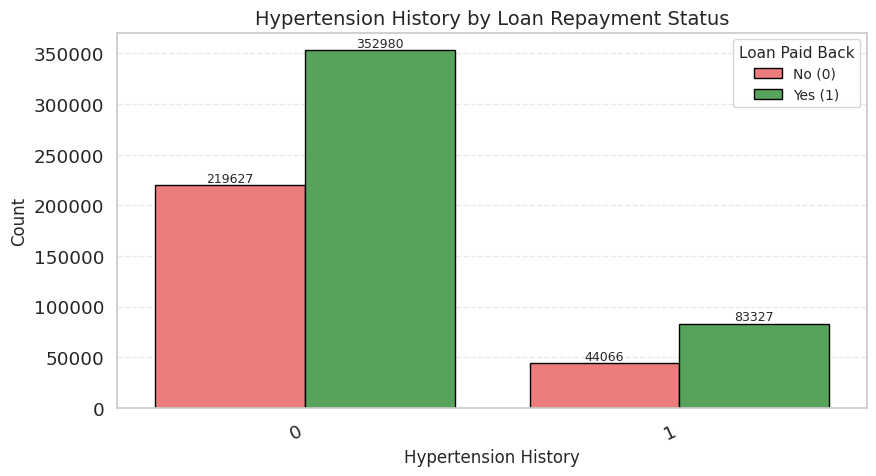

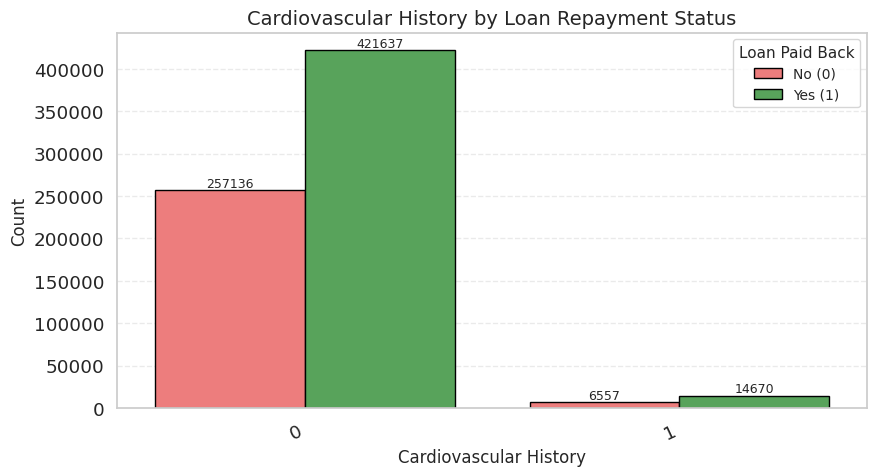

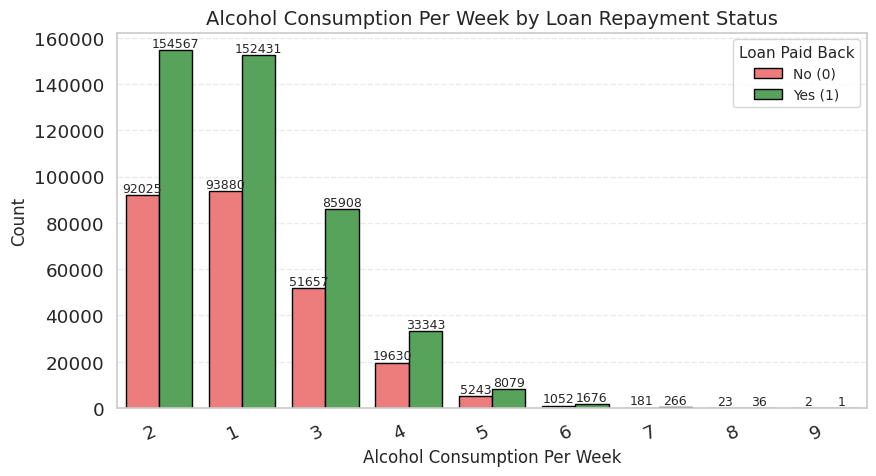

In [16]:
custom_palette = {0: "#FF6B6B", 1: "#4CAF50"}   # Red = default, Green = paid

for col in cat_cols:

    # Number of unique categories in this column
    num_categories = train[col].nunique()

    # Dynamic width: base width = 9, add 0.7 per category
    width = max(9, num_categories * 0.8)

    plt.figure(figsize=(width, 5))

    ax = sns.countplot(
        data=train,
        x=col,
        hue=target,
        palette=custom_palette,
        edgecolor='black',
        order=train[col].value_counts().index
    )
    
    plt.title(f'{col.replace("_", " ").title()} by Loan Repayment Status', fontsize=14)
    plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=25, ha='right')

    # -------- Add count labels above bars --------
    for bar in ax.patches:
        count = int(bar.get_height())
        ax.annotate(
            f'{count}',
            (bar.get_x() + bar.get_width() / 2, count),
            ha='center', va='bottom',
            fontsize=9
        )

    plt.legend(
        title='Loan Paid Back',
        labels=['No (0)', 'Yes (1)'],
        fontsize=10,
        title_fontsize=11
    )

    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


### Numerical vs Numerical

Since this dataset contains many numerical columns, using a pairplot is not a wise choice. Pairplots grow quadratically as the number of columns increases, meaning that even 20 numerical features would result in 400 plots. This makes the visualization extremely heavy, slow to render, and often unreadable. Large pairplots can freeze the notebook, significantly increase the file size, and even fail to display properly on platforms like Kaggle or GitHub. Moreover, most of the resulting scatterplots provide little meaningful insight, appearing as dense clusters of points with too much noise. For datasets with many numerical features, it is far more effective to rely on correlation heatmaps, targeted scatterplots for selected feature pairs, and univariate distributions rather than generating thousands of scatterplots that add more noise than value.

In [17]:

"""

# Remove ID + target from numerical pairplot
for drop in ["id", target]:
    if drop in true_num_cols:
        true_num_cols.remove(drop)

# Build pairplot dataset
pairplot_df = train[true_num_cols + [target]]

# Pairplot
sns.pairplot(
    pairplot_df,
    hue=target,
    palette={0: "#FF6B6B", 1: "#4CAF50"},   # red/green
    diag_kind="kde",                        # KDE on diagonals
    corner=True,                            # show only lower triangle
    plot_kws={"alpha": 0.6, "s": 20},       # scatter styling
    diag_kws={"shade": True}                # KDE shading
)

plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=14)
plt.show()

"""

'\n\n# Remove ID + target from numerical pairplot\nfor drop in ["id", target]:\n    if drop in true_num_cols:\n        true_num_cols.remove(drop)\n\n# Build pairplot dataset\npairplot_df = train[true_num_cols + [target]]\n\n# Pairplot\nsns.pairplot(\n    pairplot_df,\n    hue=target,\n    palette={0: "#FF6B6B", 1: "#4CAF50"},   # red/green\n    diag_kind="kde",                        # KDE on diagonals\n    corner=True,                            # show only lower triangle\n    plot_kws={"alpha": 0.6, "s": 20},       # scatter styling\n    diag_kws={"shade": True}                # KDE shading\n)\n\nplt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=14)\nplt.show()\n\n'

### Categorical vs Categorical

Categorical vs Categorical: gender  ×  ethnicity

 Crosstab (Counts):

ethnicity  Asian  Black  Hispanic  Other   White
gender                                          
Female     31090  54886     67657   9141  200463
Male       28713  50826     61677   8199  183670
Other        317    589       650    102    2020

 Crosstab (% by row):

ethnicity  Asian  Black  Hispanic  Other  White
gender                                         
Female      8.56  15.11     18.63   2.52  55.19
Male        8.62  15.26     18.52   2.46  55.14
Other       8.62  16.01     17.67   2.77  54.92


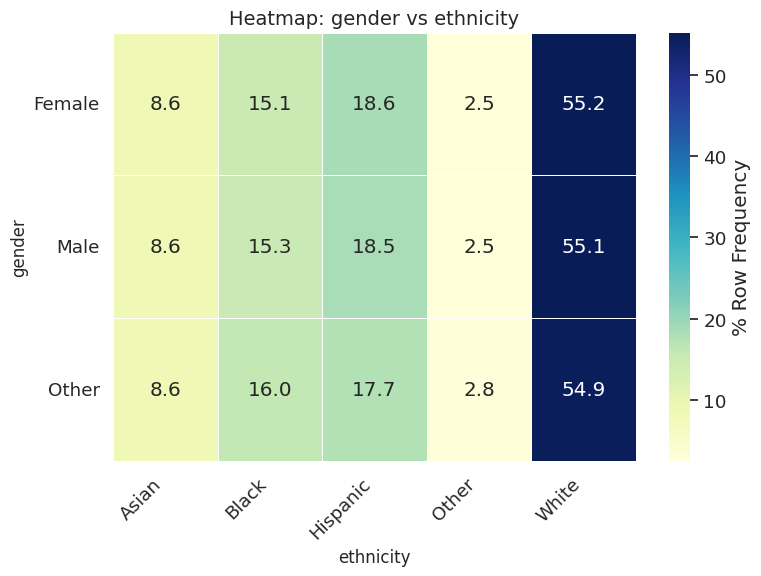

Categorical vs Categorical: gender  ×  education_level

 Crosstab (Counts):

education_level  Graduate  Highschool  No formal  Postgraduate
gender                                                        
Female             136054      178169       7676         41338
Male               123862      164091       7190         37942
Other                1352        1885         79           362

 Crosstab (% by row):

education_level  Graduate  Highschool  No formal  Postgraduate
gender                                                        
Female              37.46       49.05       2.11         11.38
Male                37.19       49.26       2.16         11.39
Other               36.76       51.25       2.15          9.84


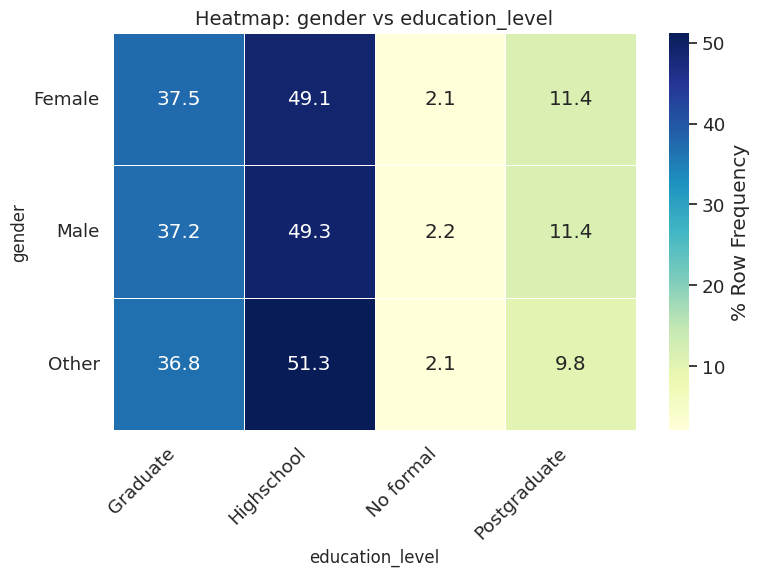

Categorical vs Categorical: gender  ×  income_level

 Crosstab (Counts):

income_level  High    Low  Lower-Middle  Middle  Upper-Middle
gender                                                       
Female        9066  44460         92814  150733         66164
Male          8067  40916         84845  138229         61028
Other          101    427           911    1595           644

 Crosstab (% by row):

income_level  High    Low  Lower-Middle  Middle  Upper-Middle
gender                                                       
Female        2.50  12.24         25.55   41.50         18.22
Male          2.42  12.28         25.47   41.50         18.32
Other         2.75  11.61         24.77   43.37         17.51


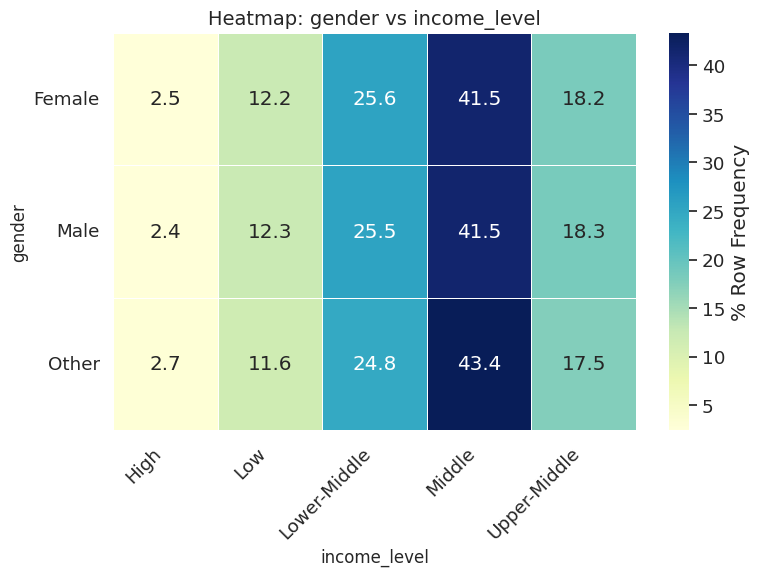

Categorical vs Categorical: gender  ×  smoking_status

 Crosstab (Counts):

smoking_status  Current  Former   Never
gender                                 
Female            53615   52196  257426
Male              49178   49472  234435
Other               570     521    2587

 Crosstab (% by row):

smoking_status  Current  Former  Never
gender                                
Female            14.76   14.37  70.87
Male              14.76   14.85  70.38
Other             15.50   14.17  70.34


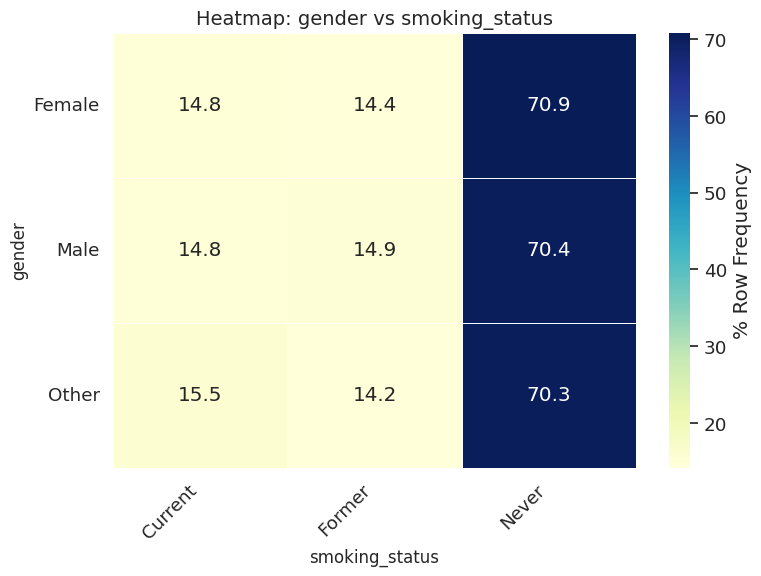

Categorical vs Categorical: gender  ×  employment_status

 Crosstab (Counts):

employment_status  Employed  Retired  Student  Unemployed
gender                                                   
Female               267794    60109     9507       25827
Male                 245655    55019     8684       23727
Other                  2721      607      117         233

 Crosstab (% by row):

employment_status  Employed  Retired  Student  Unemployed
gender                                                   
Female                73.72    16.55     2.62        7.11
Male                  73.75    16.52     2.61        7.12
Other                 73.98    16.50     3.18        6.33


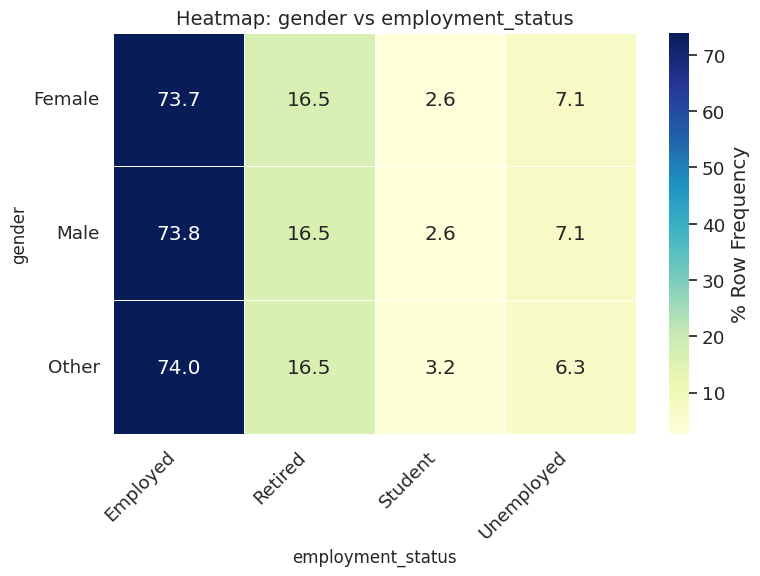

Categorical vs Categorical: gender  ×  family_history_diabetes

 Crosstab (Counts):

family_history_diabetes       0      1
gender                                
Female                   308984  54253
Male                     283344  49741
Other                      3091    587

 Crosstab (% by row):

family_history_diabetes      0      1
gender                               
Female                   85.06  14.94
Male                     85.07  14.93
Other                    84.04  15.96


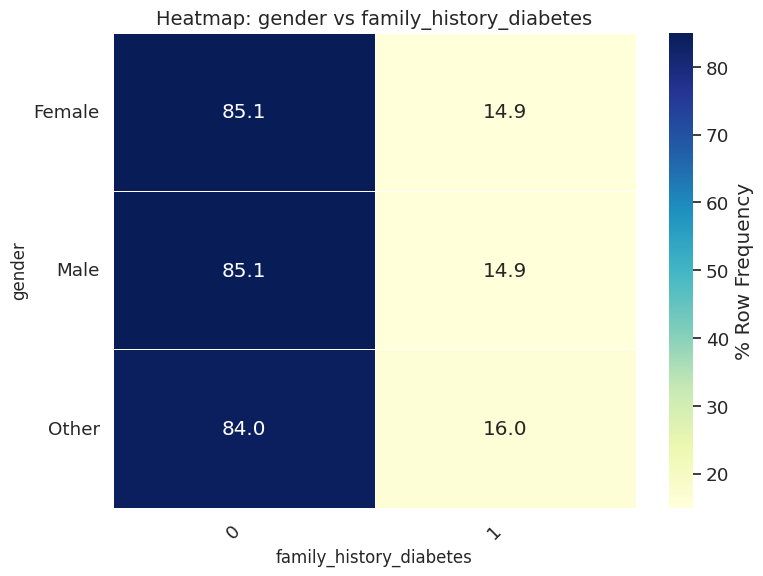

Categorical vs Categorical: gender  ×  hypertension_history

 Crosstab (Counts):

hypertension_history       0      1
gender                             
Female                297064  66173
Male                  272513  60572
Other                   3030    648

 Crosstab (% by row):

hypertension_history      0      1
gender                            
Female                81.78  18.22
Male                  81.81  18.19
Other                 82.38  17.62


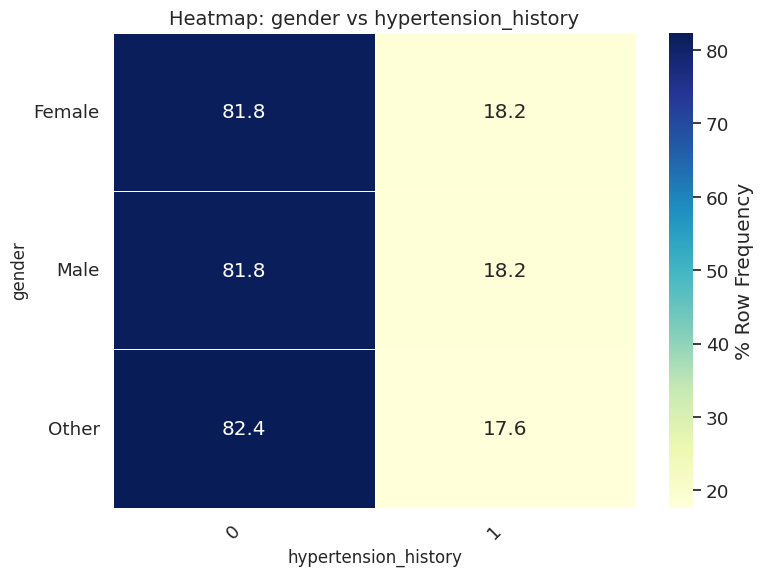

Categorical vs Categorical: gender  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history       0      1
gender                               
Female                  352270  10967
Male                    322964  10121
Other                     3539    139

 Crosstab (% by row):

cardiovascular_history      0     1
gender                             
Female                  96.98  3.02
Male                    96.96  3.04
Other                   96.22  3.78


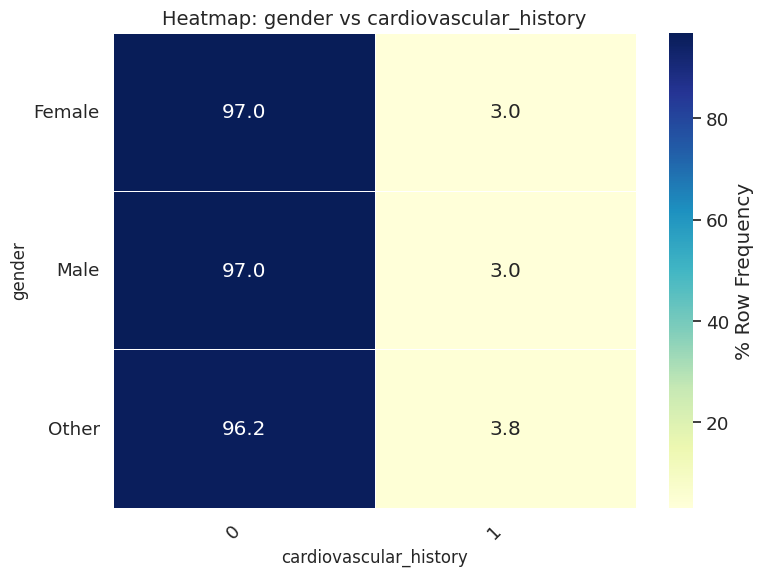

Categorical vs Categorical: gender  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2      3      4     5     6    7  \
gender                                                                        
Female                        127683  127863  71524  27539  6927  1434  233   
Male                          117372  117382  65330  25166  6315  1282  211   
Other                           1256    1347    711    268    80    12    3   

alcohol_consumption_per_week   8  9  
gender                               
Female                        32  2  
Male                          26  1  
Other                          1  0  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5     6     7  \
gender                                                                      
Female                        35.15  35.20  19.69  7.58  1.91  0.39  0.06   
Male                          35.24  35.24  19.61  7.56  1.90  0.38  

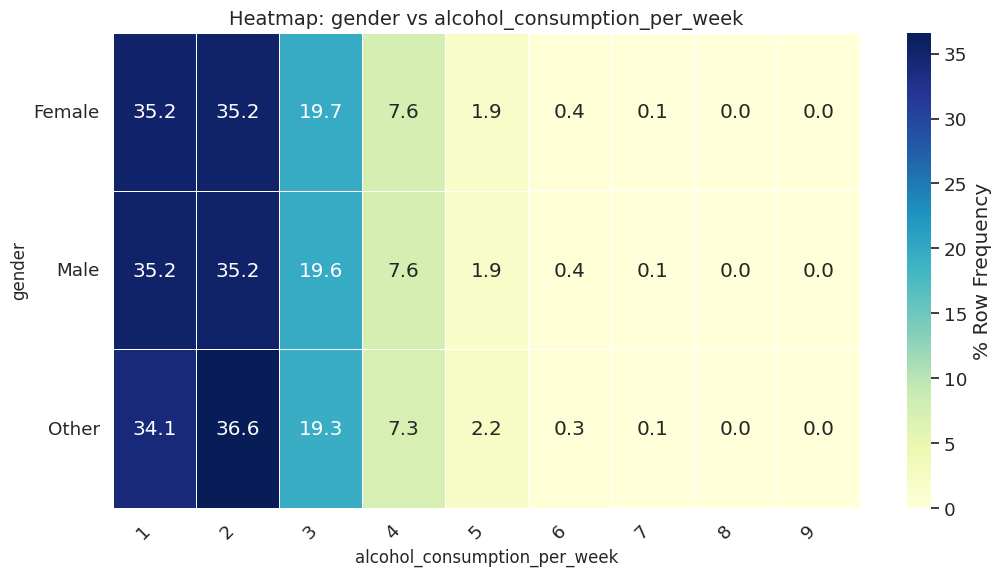

Categorical vs Categorical: ethnicity  ×  education_level

 Crosstab (Counts):

education_level  Graduate  Highschool  No formal  Postgraduate
ethnicity                                                     
Asian               22144       29850       1329          6797
Black               40229       51545       2262         12265
Hispanic            48468       63827       2709         14980
Other                6771        8403        387          1881
White              143656      190520       8258         43719

 Crosstab (% by row):

education_level  Graduate  Highschool  No formal  Postgraduate
ethnicity                                                     
Asian               36.83       49.65       2.21         11.31
Black               37.84       48.49       2.13         11.54
Hispanic            37.29       49.10       2.08         11.52
Other               38.82       48.18       2.22         10.78
White               37.20       49.34       2.14         11.32


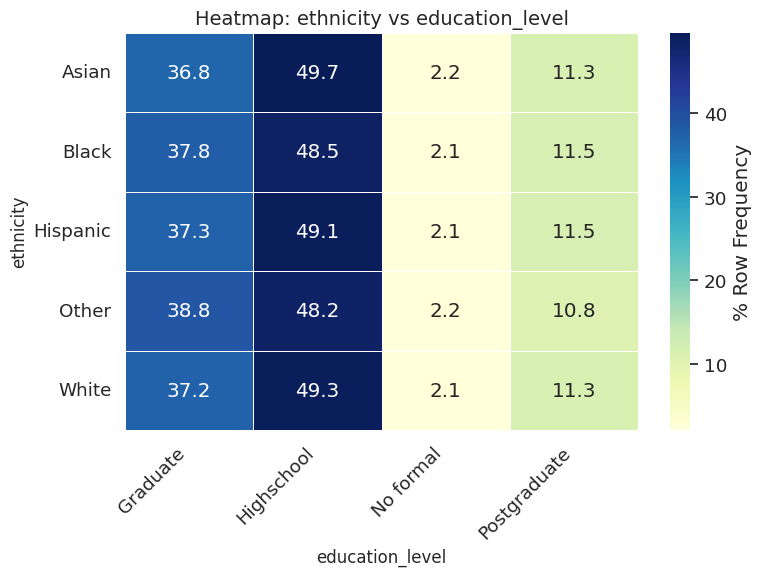

Categorical vs Categorical: ethnicity  ×  income_level

 Crosstab (Counts):

income_level  High    Low  Lower-Middle  Middle  Upper-Middle
ethnicity                                                    
Asian         1515   7279         15541   24729         11056
Black         2592  12987         27100   44041         19581
Hispanic      3187  15832         33397   53613         23955
Other          407   2197          4434    7366          3038
White         9533  47508         98098  160808         70206

 Crosstab (% by row):

income_level  High    Low  Lower-Middle  Middle  Upper-Middle
ethnicity                                                    
Asian         2.52  12.11         25.85   41.13         18.39
Black         2.44  12.22         25.49   41.43         18.42
Hispanic      2.45  12.18         25.69   41.25         18.43
Other         2.33  12.60         25.42   42.23         17.42
White         2.47  12.30         25.40   41.64         18.18


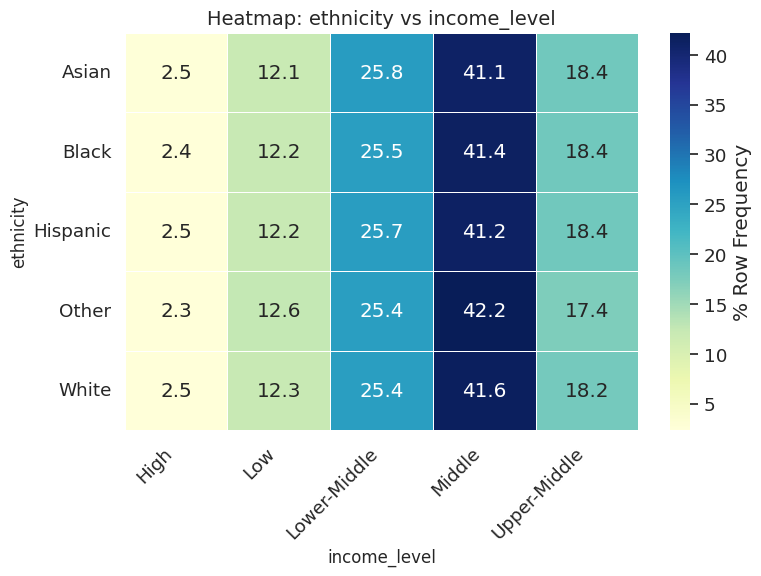

Categorical vs Categorical: ethnicity  ×  smoking_status

 Crosstab (Counts):

smoking_status  Current  Former   Never
ethnicity                              
Asian              8901    8719   42500
Black             15688   15637   74976
Hispanic          19741   18980   91263
Other              2574    2580   12288
White             56459   56273  273421

 Crosstab (% by row):

smoking_status  Current  Former  Never
ethnicity                             
Asian             14.81   14.50  70.69
Black             14.76   14.71  70.53
Hispanic          15.19   14.60  70.21
Other             14.76   14.79  70.45
White             14.62   14.57  70.81


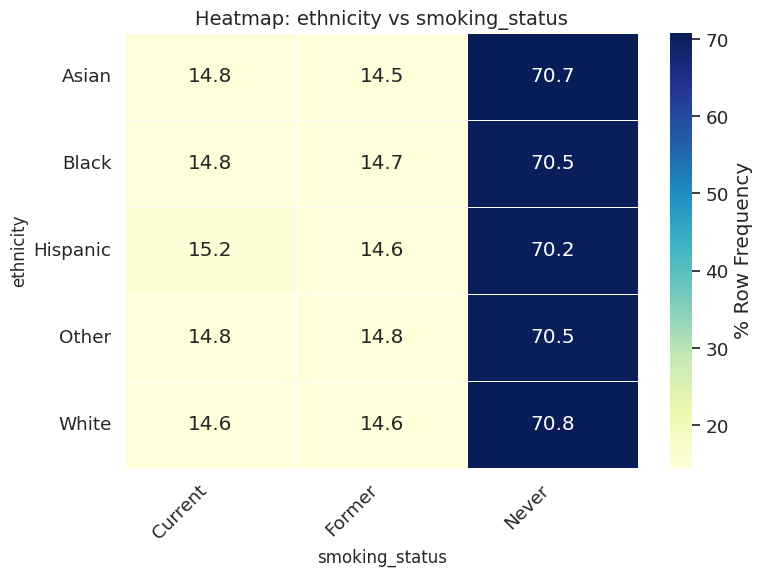

Categorical vs Categorical: ethnicity  ×  employment_status

 Crosstab (Counts):

employment_status  Employed  Retired  Student  Unemployed
ethnicity                                                
Asian                 44223     9941     1609        4347
Black                 78442    17490     2802        7567
Hispanic              95746    21576     3380        9282
Other                 12854     2887      486        1215
White                284905    63841    10031       27376

 Crosstab (% by row):

employment_status  Employed  Retired  Student  Unemployed
ethnicity                                                
Asian                 73.56    16.54     2.68        7.23
Black                 73.79    16.45     2.64        7.12
Hispanic              73.66    16.60     2.60        7.14
Other                 73.70    16.55     2.79        6.97
White                 73.78    16.53     2.60        7.09


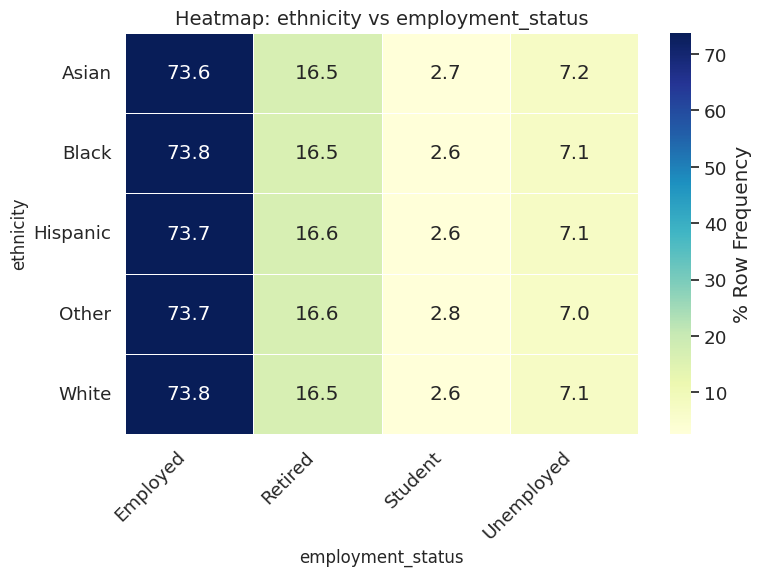

Categorical vs Categorical: ethnicity  ×  family_history_diabetes

 Crosstab (Counts):

family_history_diabetes       0      1
ethnicity                             
Asian                     51268   8852
Black                     90197  16104
Hispanic                 111263  18721
Other                     14805   2637
White                    327886  58267

 Crosstab (% by row):

family_history_diabetes      0      1
ethnicity                            
Asian                    85.28  14.72
Black                    84.85  15.15
Hispanic                 85.60  14.40
Other                    84.88  15.12
White                    84.91  15.09


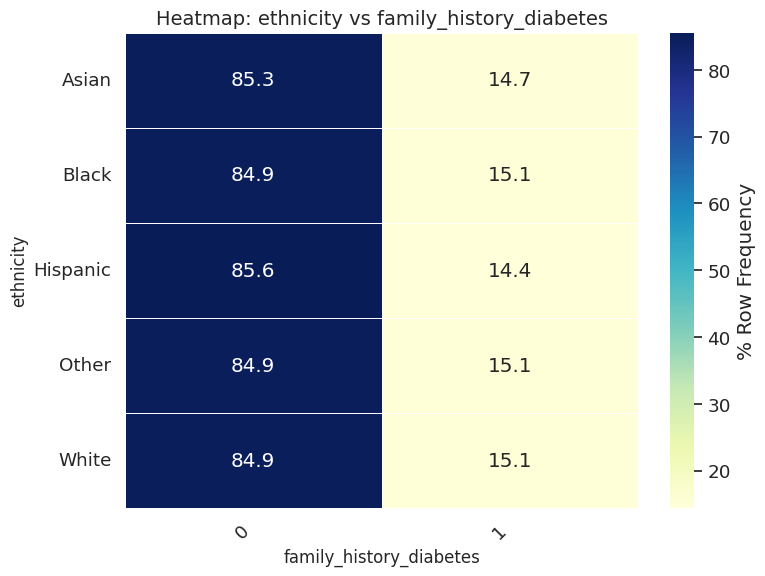

Categorical vs Categorical: ethnicity  ×  hypertension_history

 Crosstab (Counts):

hypertension_history       0      1
ethnicity                          
Asian                  49227  10893
Black                  86846  19455
Hispanic              106301  23683
Other                  14243   3199
White                 315990  70163

 Crosstab (% by row):

hypertension_history      0      1
ethnicity                         
Asian                 81.88  18.12
Black                 81.70  18.30
Hispanic              81.78  18.22
Other                 81.66  18.34
White                 81.83  18.17


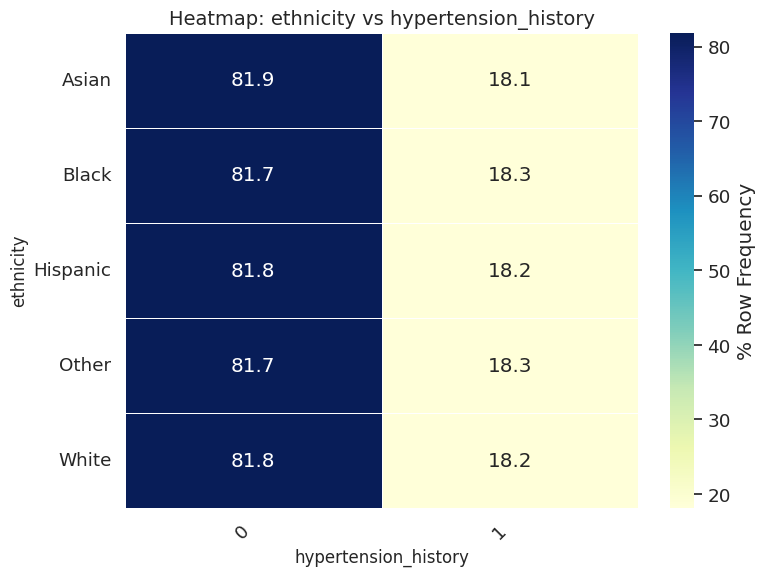

Categorical vs Categorical: ethnicity  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history       0      1
ethnicity                            
Asian                    58287   1833
Black                   102954   3347
Hispanic                126124   3860
Other                    16904    538
White                   374504  11649

 Crosstab (% by row):

cardiovascular_history      0     1
ethnicity                          
Asian                   96.95  3.05
Black                   96.85  3.15
Hispanic                97.03  2.97
Other                   96.92  3.08
White                   96.98  3.02


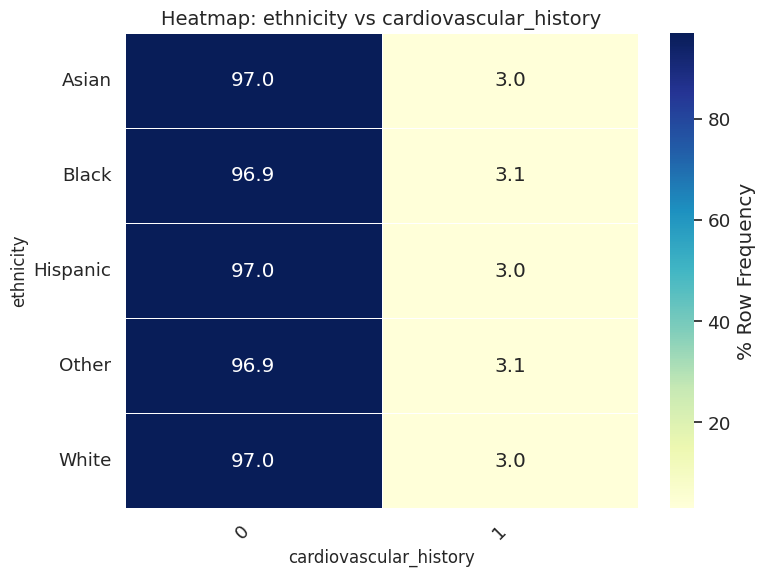

Categorical vs Categorical: ethnicity  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2      3      4     5     6    7  \
ethnicity                                                                     
Asian                          21118   21370  11772   4434  1147   221   52   
Black                          37398   37572  20888   7960  1989   406   75   
Hispanic                       45844   45657  25646   9847  2421   481   78   
Other                           6256    6124   3414   1278   308    55    7   
White                         135695  135869  75845  29454  7457  1565  235   

alcohol_consumption_per_week   8  9  
ethnicity                            
Asian                          6  0  
Black                         13  0  
Hispanic                       9  1  
Other                          0  0  
White                         31  2  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5  

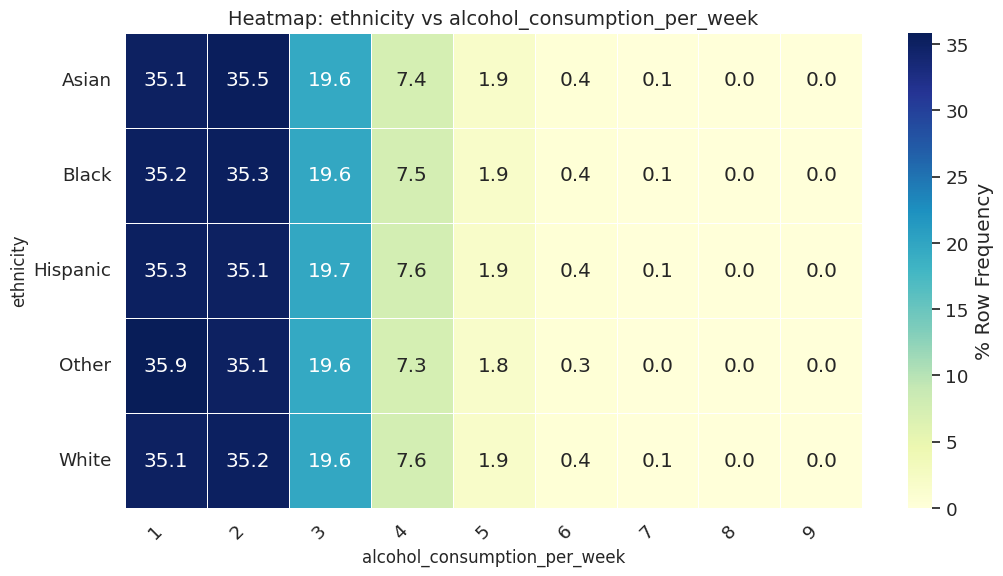

Categorical vs Categorical: education_level  ×  income_level

 Crosstab (Counts):

income_level     High    Low  Lower-Middle  Middle  Upper-Middle
education_level                                                 
Graduate         6360  31174         67282  108125         48327
Highschool       8448  42826         87700  142680         62491
No formal         393   1801          3745    6130          2876
Postgraduate     2033  10002         19843   33622         14142

 Crosstab (% by row):

income_level     High    Low  Lower-Middle  Middle  Upper-Middle
education_level                                                 
Graduate         2.43  11.93         25.75   41.38         18.50
Highschool       2.45  12.44         25.48   41.46         18.16
No formal        2.63  12.05         25.06   41.02         19.24
Postgraduate     2.55  12.56         24.92   42.22         17.76


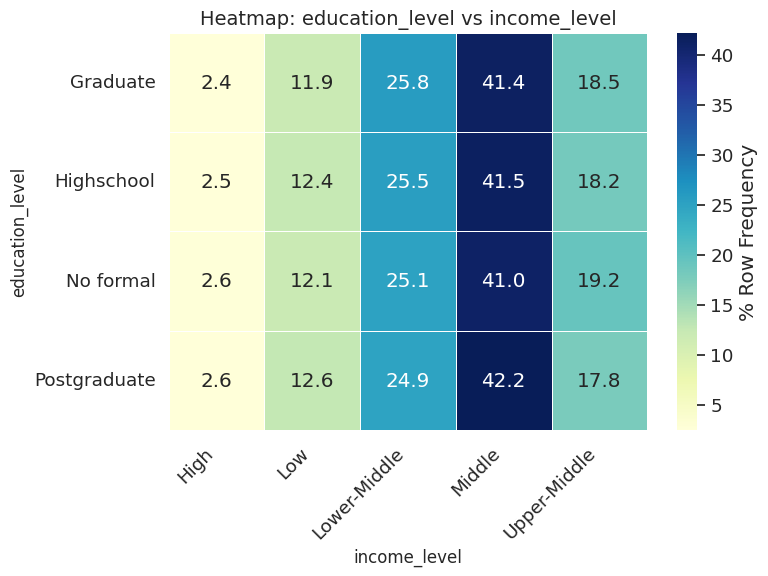

Categorical vs Categorical: education_level  ×  smoking_status

 Crosstab (Counts):

smoking_status   Current  Former   Never
education_level                         
Graduate           38780   38167  184321
Highschool         50384   50431  243330
No formal           2317    2153   10475
Postgraduate       11882   11438   56322

 Crosstab (% by row):

smoking_status   Current  Former  Never
education_level                        
Graduate           14.84   14.61  70.55
Highschool         14.64   14.65  70.71
No formal          15.50   14.41  70.09
Postgraduate       14.92   14.36  70.72


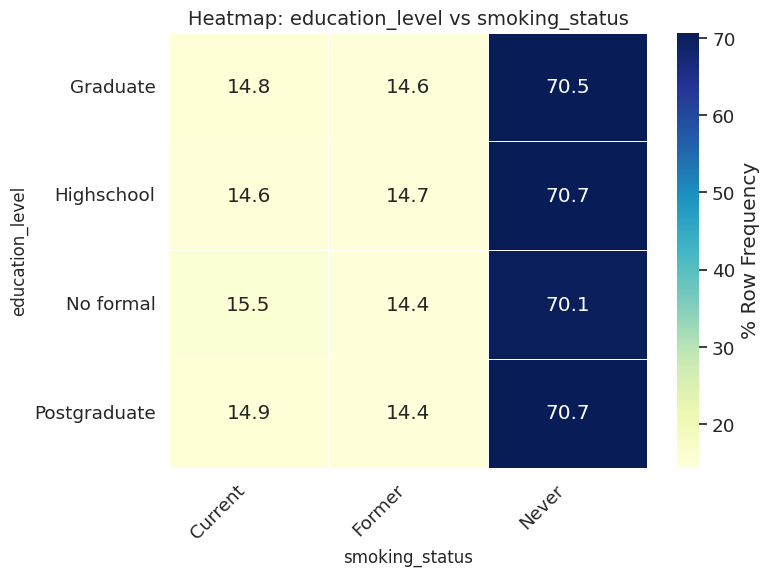

Categorical vs Categorical: education_level  ×  employment_status

 Crosstab (Counts):

employment_status  Employed  Retired  Student  Unemployed
education_level                                          
Graduate             192779    43248     6711       18530
Highschool           253237    57079     9141       24688
No formal             11162     2409      382         992
Postgraduate          58992    12999     2074        5577

 Crosstab (% by row):

employment_status  Employed  Retired  Student  Unemployed
education_level                                          
Graduate              73.79    16.55     2.57        7.09
Highschool            73.58    16.59     2.66        7.17
No formal             74.69    16.12     2.56        6.64
Postgraduate          74.07    16.32     2.60        7.00


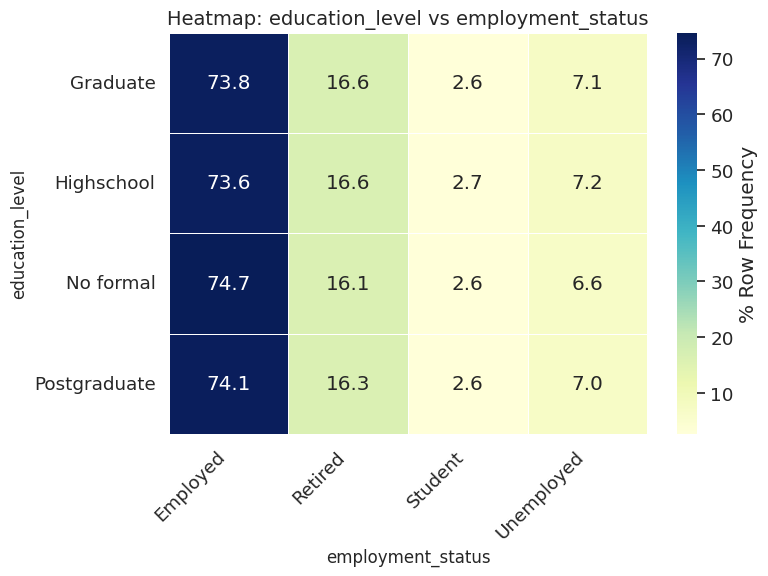

Categorical vs Categorical: education_level  ×  family_history_diabetes

 Crosstab (Counts):

family_history_diabetes       0      1
education_level                       
Graduate                 221648  39620
Highschool               293430  50715
No formal                 12659   2286
Postgraduate              67682  11960

 Crosstab (% by row):

family_history_diabetes      0      1
education_level                      
Graduate                 84.84  15.16
Highschool               85.26  14.74
No formal                84.70  15.30
Postgraduate             84.98  15.02


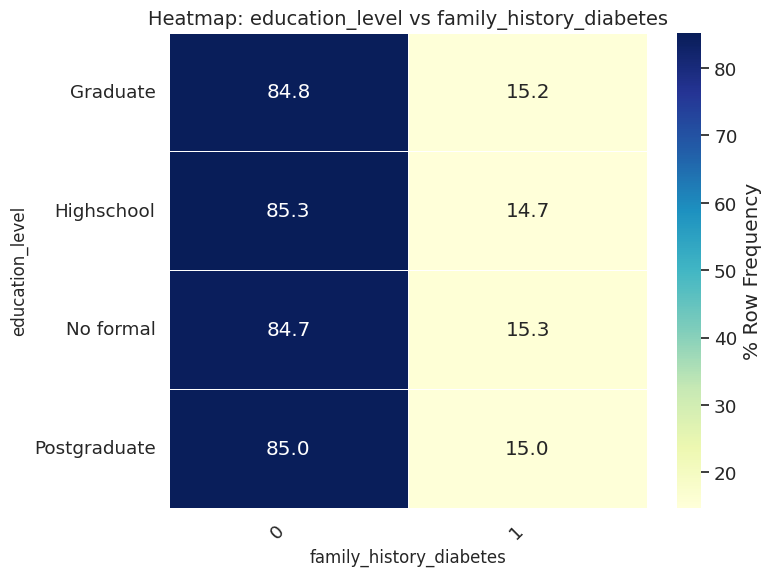

Categorical vs Categorical: education_level  ×  hypertension_history

 Crosstab (Counts):

hypertension_history       0      1
education_level                    
Graduate              213775  47493
Highschool            281355  62790
No formal              12236   2709
Postgraduate           65241  14401

 Crosstab (% by row):

hypertension_history      0      1
education_level                   
Graduate              81.82  18.18
Highschool            81.75  18.25
No formal             81.87  18.13
Postgraduate          81.92  18.08


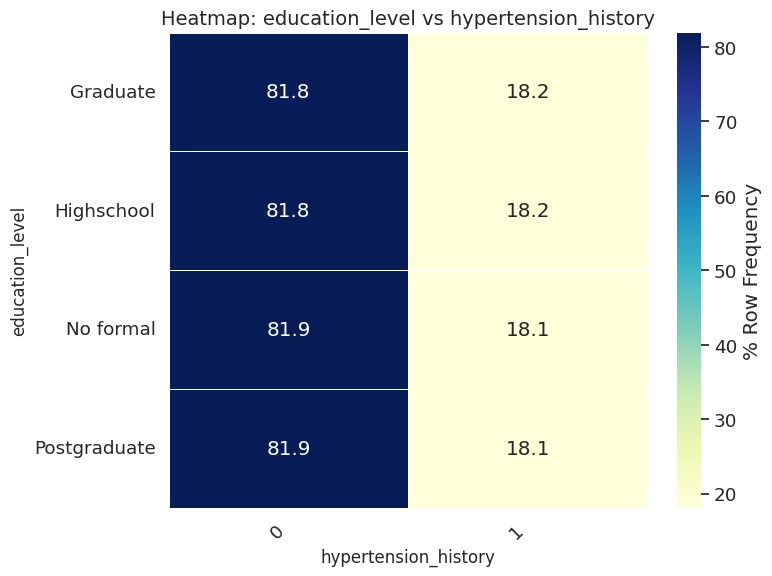

Categorical vs Categorical: education_level  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history       0      1
education_level                      
Graduate                253429   7839
Highschool              333673  10472
No formal                14525    420
Postgraduate             77146   2496

 Crosstab (% by row):

cardiovascular_history      0     1
education_level                    
Graduate                97.00  3.00
Highschool              96.96  3.04
No formal               97.19  2.81
Postgraduate            96.87  3.13


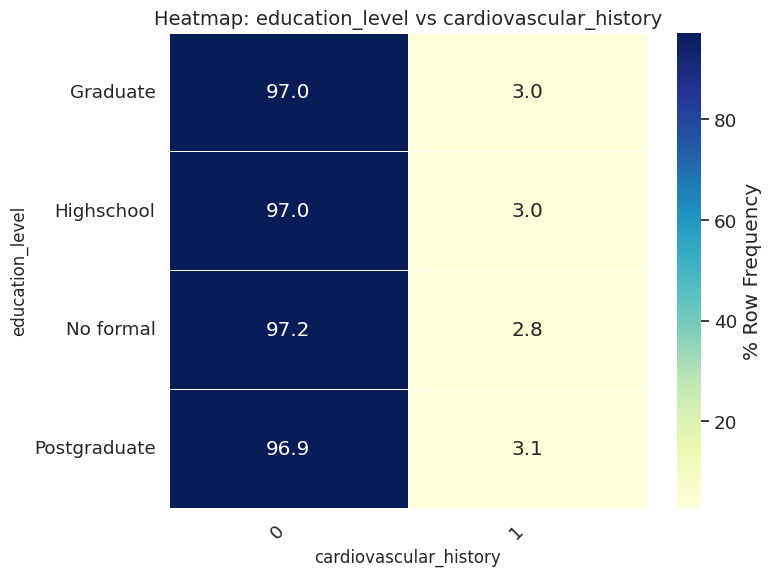

Categorical vs Categorical: education_level  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2      3      4     5     6    7  \
education_level                                                               
Graduate                       91413   92810  50738  19888  5193  1042  167   
Highschool                    120797  121429  67928  26013  6396  1323  226   
No formal                       5279    5366   2890   1064   277    55   13   
Postgraduate                   28822   26987  16009   6008  1456   308   41   

alcohol_consumption_per_week   8  9  
education_level                      
Graduate                      17  0  
Highschool                    31  2  
No formal                      1  0  
Postgraduate                  10  1  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5     6     7  \
education_level                                                             
Graduate            

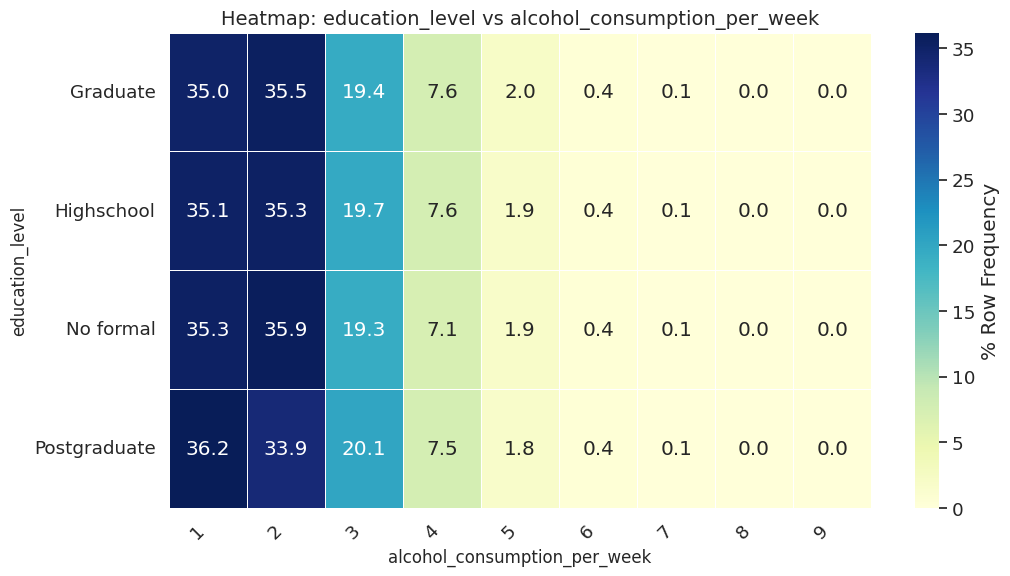

Categorical vs Categorical: income_level  ×  smoking_status

 Crosstab (Counts):

smoking_status  Current  Former   Never
income_level                           
High               2489    2478   12267
Low               12748   12514   60541
Lower-Middle      26265   25843  126462
Middle            43141   42183  205233
Upper-Middle      18720   19171   89945

 Crosstab (% by row):

smoking_status  Current  Former  Never
income_level                          
High              14.44   14.38  71.18
Low               14.86   14.58  70.56
Lower-Middle      14.71   14.47  70.82
Middle            14.85   14.52  70.63
Upper-Middle      14.64   15.00  70.36


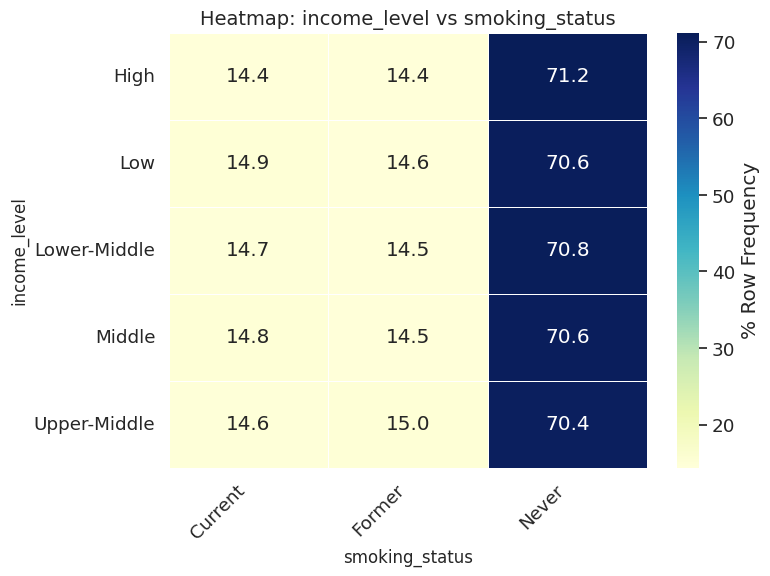

Categorical vs Categorical: income_level  ×  employment_status

 Crosstab (Counts):

employment_status  Employed  Retired  Student  Unemployed
income_level                                             
High                  12735     2863      416        1220
Low                   62905    14261     2192        6445
Lower-Middle         132018    29477     4631       12444
Middle               214594    47595     7814       20554
Upper-Middle          93918    21539     3255        9124

 Crosstab (% by row):

employment_status  Employed  Retired  Student  Unemployed
income_level                                             
High                  73.89    16.61     2.41        7.08
Low                   73.31    16.62     2.55        7.51
Lower-Middle          73.93    16.51     2.59        6.97
Middle                73.86    16.38     2.69        7.07
Upper-Middle          73.47    16.85     2.55        7.14


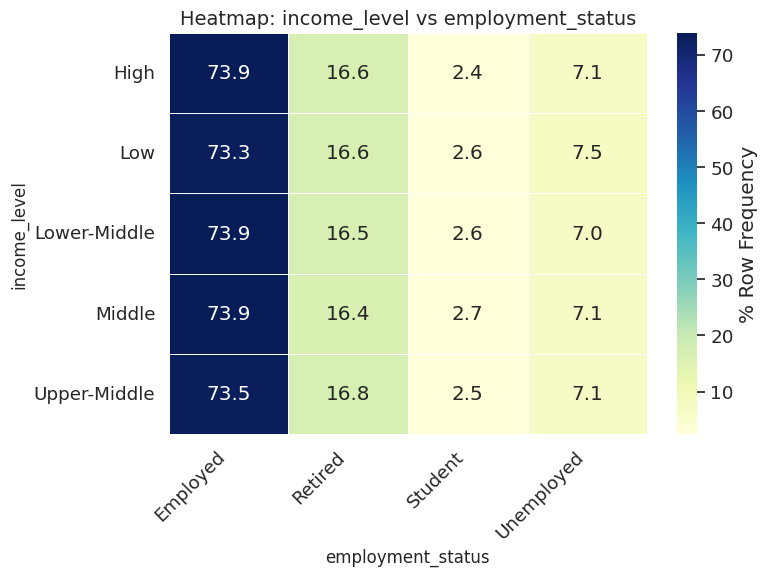

Categorical vs Categorical: income_level  ×  family_history_diabetes

 Crosstab (Counts):

family_history_diabetes       0      1
income_level                          
High                      14707   2527
Low                       72965  12838
Lower-Middle             151474  27096
Middle                   247699  42858
Upper-Middle             108574  19262

 Crosstab (% by row):

family_history_diabetes      0      1
income_level                         
High                     85.34  14.66
Low                      85.04  14.96
Lower-Middle             84.83  15.17
Middle                   85.25  14.75
Upper-Middle             84.93  15.07


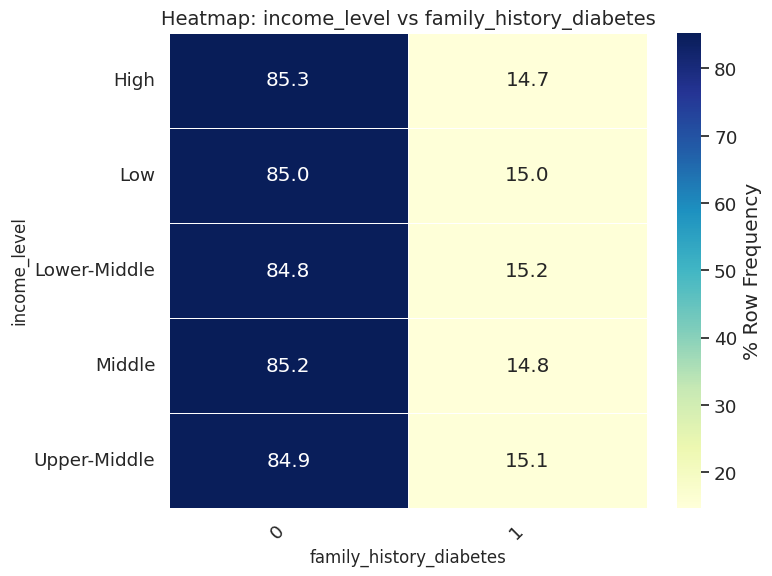

Categorical vs Categorical: income_level  ×  hypertension_history

 Crosstab (Counts):

hypertension_history       0      1
income_level                       
High                   14023   3211
Low                    69692  16111
Lower-Middle          146480  32090
Middle                237418  53139
Upper-Middle          104994  22842

 Crosstab (% by row):

hypertension_history      0      1
income_level                      
High                  81.37  18.63
Low                   81.22  18.78
Lower-Middle          82.03  17.97
Middle                81.71  18.29
Upper-Middle          82.13  17.87


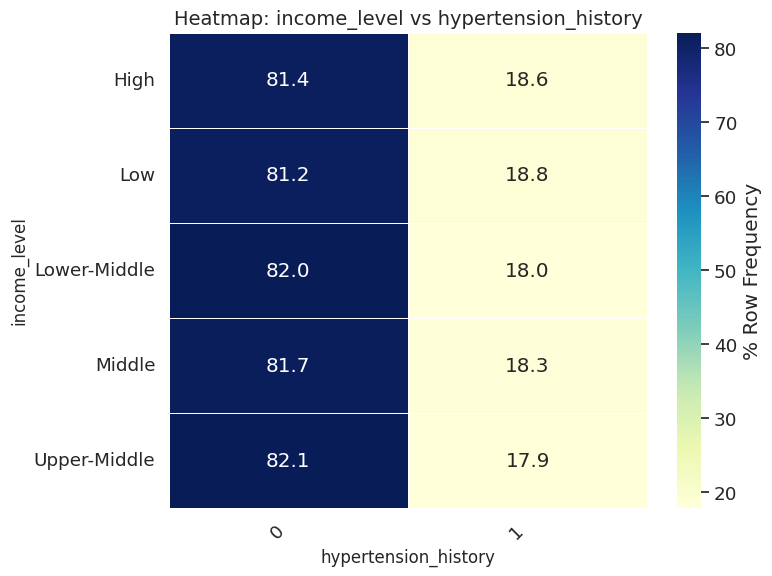

Categorical vs Categorical: income_level  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history       0     1
income_level                        
High                     16672   562
Low                      83160  2643
Lower-Middle            173227  5343
Middle                  281636  8921
Upper-Middle            124078  3758

 Crosstab (% by row):

cardiovascular_history      0     1
income_level                       
High                    96.74  3.26
Low                     96.92  3.08
Lower-Middle            97.01  2.99
Middle                  96.93  3.07
Upper-Middle            97.06  2.94


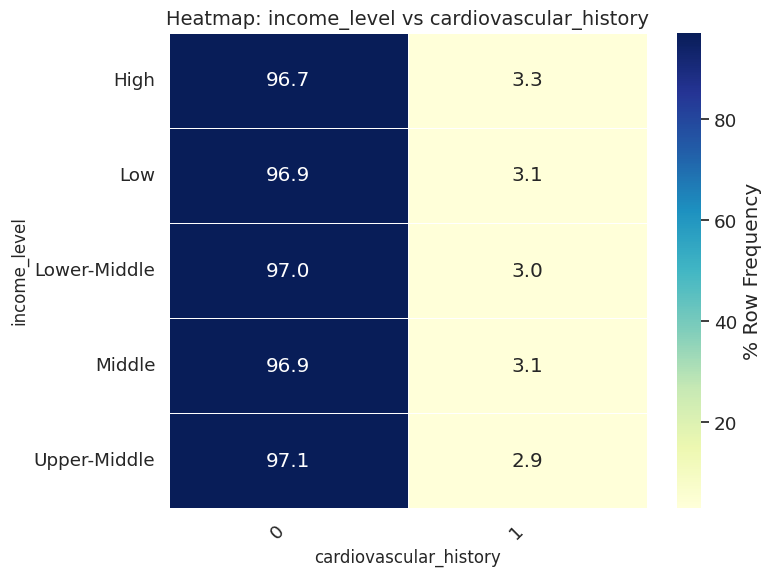

Categorical vs Categorical: income_level  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2      3      4     5     6    7  \
income_level                                                                  
High                            6085    6199   3322   1248   306    61   13   
Low                            30319   30315  16791   6435  1541   337   56   
Lower-Middle                   62957   62868  34965  13462  3481   695  125   
Middle                        101568  102104  57813  22199  5541  1132  177   
Upper-Middle                   45382   45106  24674   9629  2453   503   76   

alcohol_consumption_per_week   8  9  
income_level                         
High                           0  0  
Low                            8  1  
Lower-Middle                  16  1  
Middle                        22  1  
Upper-Middle                  13  0  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     

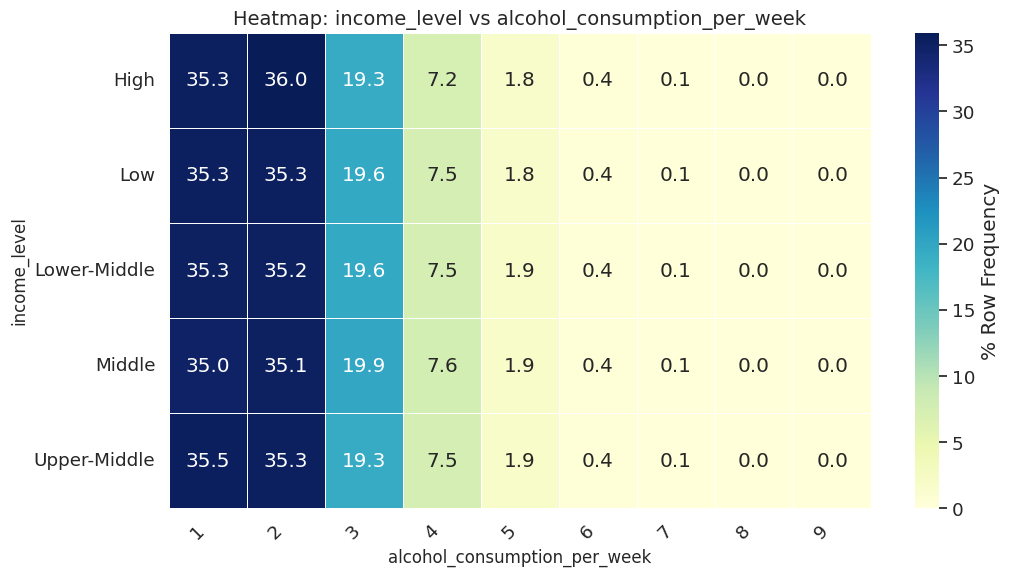

Categorical vs Categorical: smoking_status  ×  employment_status

 Crosstab (Counts):

employment_status  Employed  Retired  Student  Unemployed
smoking_status                                           
Current               75973    17259     2733        7398
Former                76031    16398     2567        7193
Never                364166    82078    13008       35196

 Crosstab (% by row):

employment_status  Employed  Retired  Student  Unemployed
smoking_status                                           
Current               73.50    16.70     2.64        7.16
Former                74.40    16.05     2.51        7.04
Never                 73.65    16.60     2.63        7.12


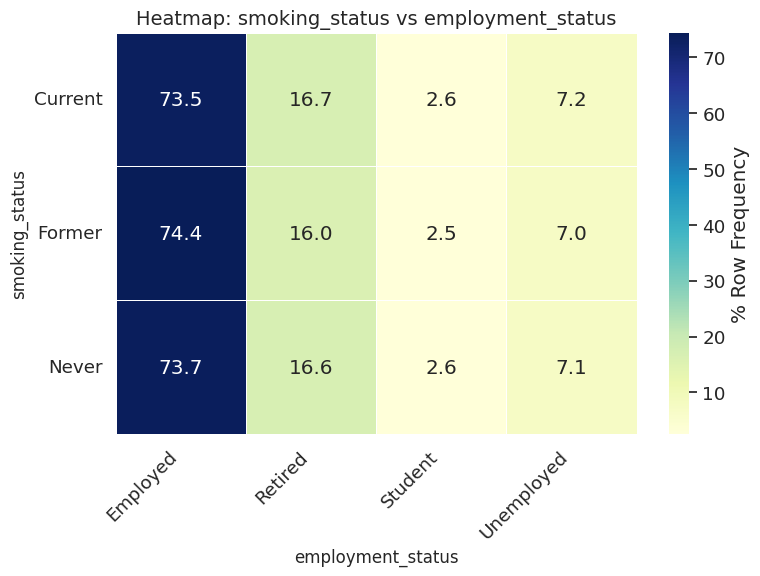

Categorical vs Categorical: smoking_status  ×  family_history_diabetes

 Crosstab (Counts):

family_history_diabetes       0      1
smoking_status                        
Current                   88797  14566
Former                    87036  15153
Never                    419586  74862

 Crosstab (% by row):

family_history_diabetes      0      1
smoking_status                       
Current                  85.91  14.09
Former                   85.17  14.83
Never                    84.86  15.14


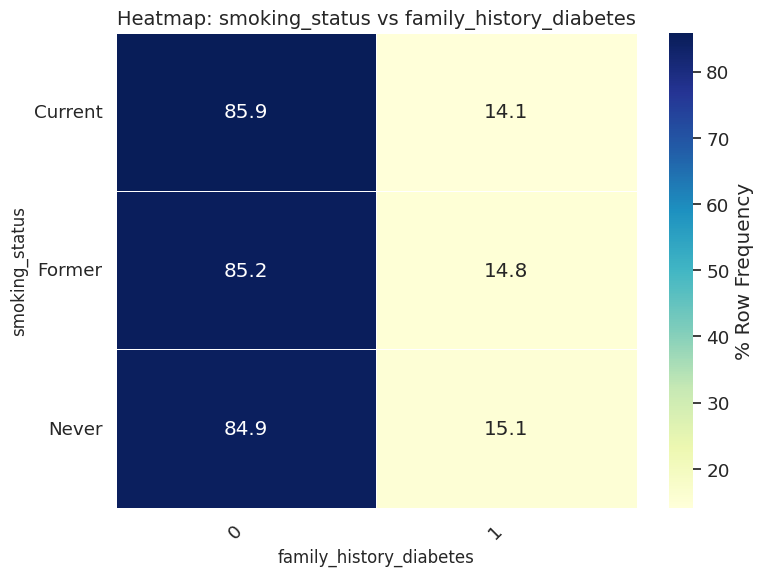

Categorical vs Categorical: smoking_status  ×  hypertension_history

 Crosstab (Counts):

hypertension_history       0      1
smoking_status                     
Current                84593  18770
Former                 83771  18418
Never                 404243  90205

 Crosstab (% by row):

hypertension_history      0      1
smoking_status                    
Current               81.84  18.16
Former                81.98  18.02
Never                 81.76  18.24


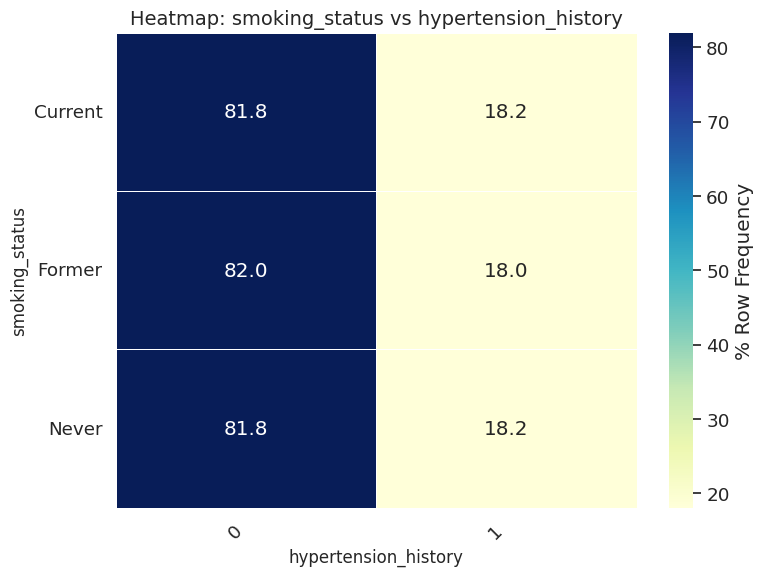

Categorical vs Categorical: smoking_status  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history       0      1
smoking_status                       
Current                 100179   3184
Former                   99071   3118
Never                   479523  14925

 Crosstab (% by row):

cardiovascular_history      0     1
smoking_status                     
Current                 96.92  3.08
Former                  96.95  3.05
Never                   96.98  3.02


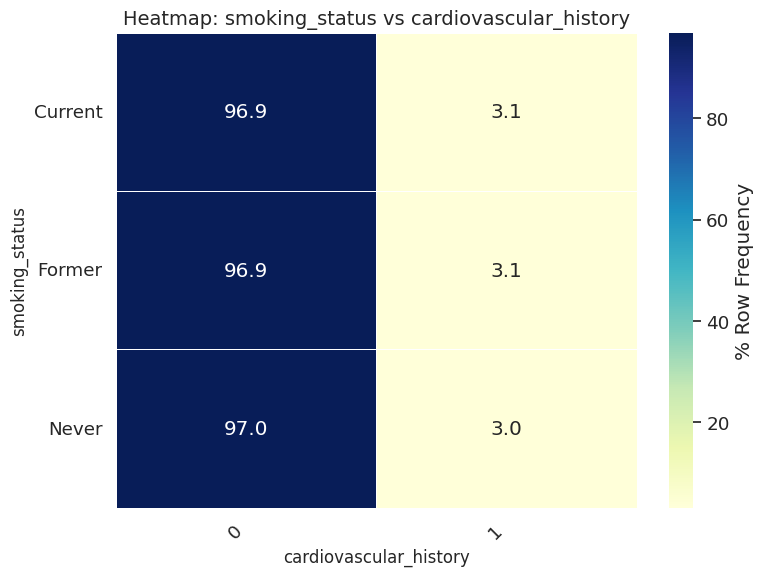

Categorical vs Categorical: smoking_status  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2      3      4     5     6    7  \
smoking_status                                                                
Current                        35911   36900  20065   8023  1976   403   72   
Former                         34797   35885  21207   7857  2020   354   61   
Never                         175603  173807  96293  37093  9326  1971  314   

alcohol_consumption_per_week   8  9  
smoking_status                       
Current                       13  0  
Former                         8  0  
Never                         38  3  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5     6     7  \
smoking_status                                                              
Current                       34.74  35.70  19.41  7.76  1.91  0.39  0.07   
Former                        34.05  35.12  20.75  7.69  1.98

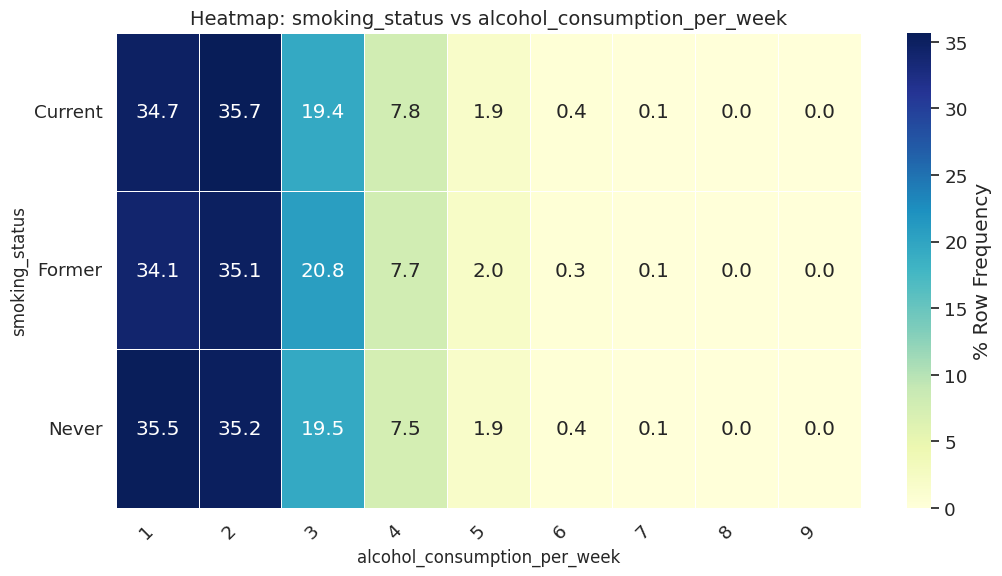

Categorical vs Categorical: employment_status  ×  family_history_diabetes

 Crosstab (Counts):

family_history_diabetes       0      1
employment_status                     
Employed                 438950  77220
Retired                   98124  17611
Student                   15661   2647
Unemployed                42684   7103

 Crosstab (% by row):

family_history_diabetes      0      1
employment_status                    
Employed                 85.04  14.96
Retired                  84.78  15.22
Student                  85.54  14.46
Unemployed               85.73  14.27


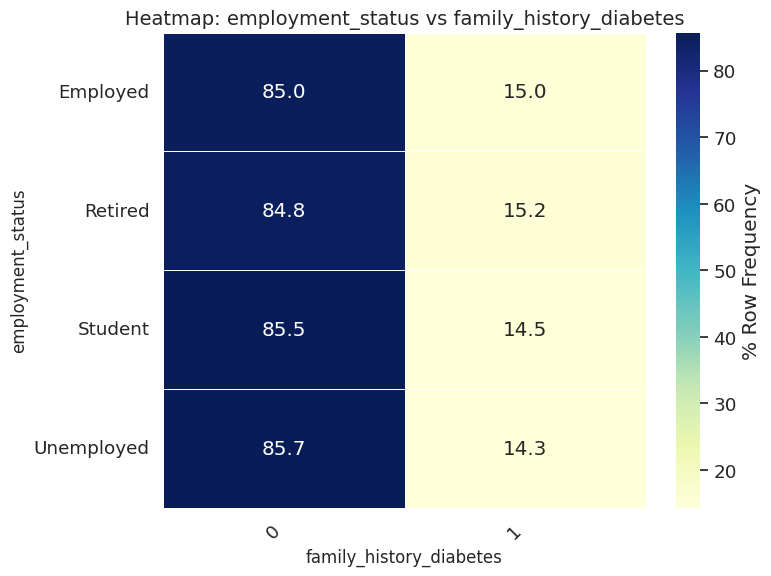

Categorical vs Categorical: employment_status  ×  hypertension_history

 Crosstab (Counts):

hypertension_history       0      1
employment_status                  
Employed              421804  94366
Retired                95086  20649
Student                15094   3214
Unemployed             40623   9164

 Crosstab (% by row):

hypertension_history      0      1
employment_status                 
Employed              81.72  18.28
Retired               82.16  17.84
Student               82.44  17.56
Unemployed            81.59  18.41


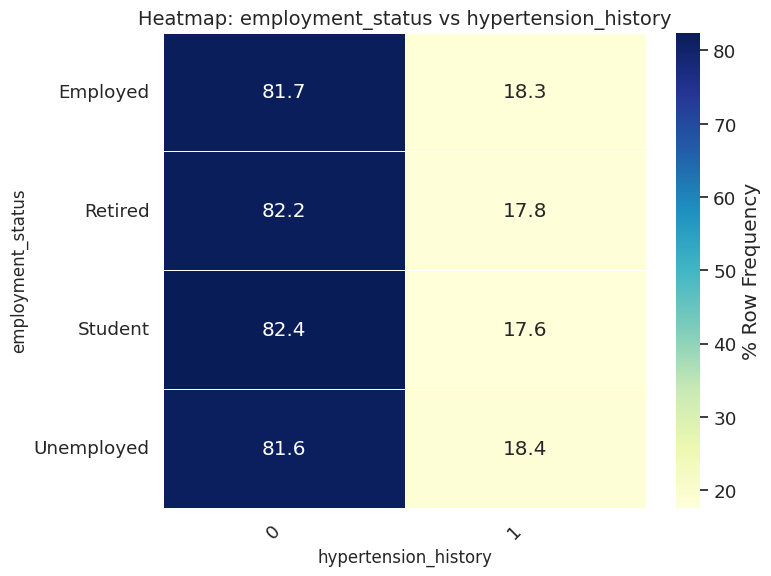

Categorical vs Categorical: employment_status  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history       0      1
employment_status                    
Employed                500805  15365
Retired                 112076   3659
Student                  17736    572
Unemployed               48156   1631

 Crosstab (% by row):

cardiovascular_history      0     1
employment_status                  
Employed                97.02  2.98
Retired                 96.84  3.16
Student                 96.88  3.12
Unemployed              96.72  3.28


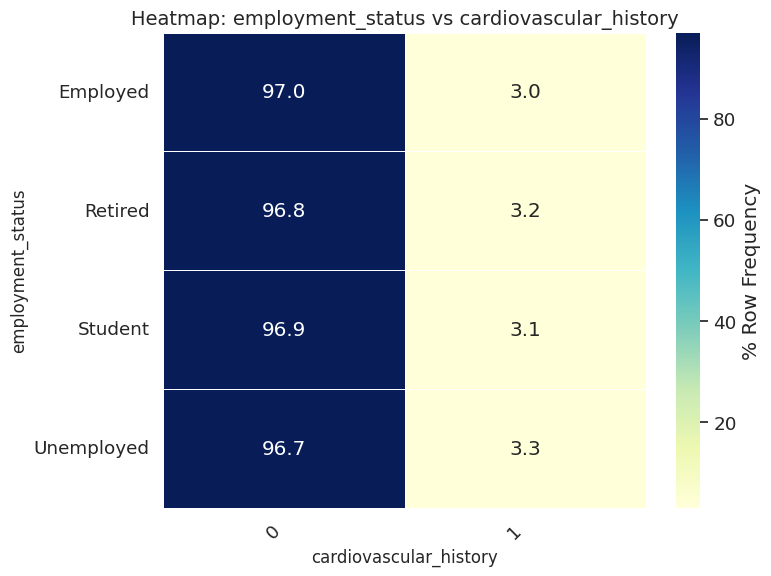

Categorical vs Categorical: employment_status  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2       3      4     5     6    7  \
employment_status                                                              
Employed                      181378  182553  101222  38836  9776  2005  349   
Retired                        41174   40160   23093   8547  2214   468   70   
Student                         6387    6253    3761   1512   320    69    6   
Unemployed                     17372   17626    9489   4078  1012   186   22   

alcohol_consumption_per_week   8  9  
employment_status                    
Employed                      49  2  
Retired                        8  1  
Student                        0  0  
Unemployed                     2  0  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5     6     7  \
employment_status                                                           
Employed    

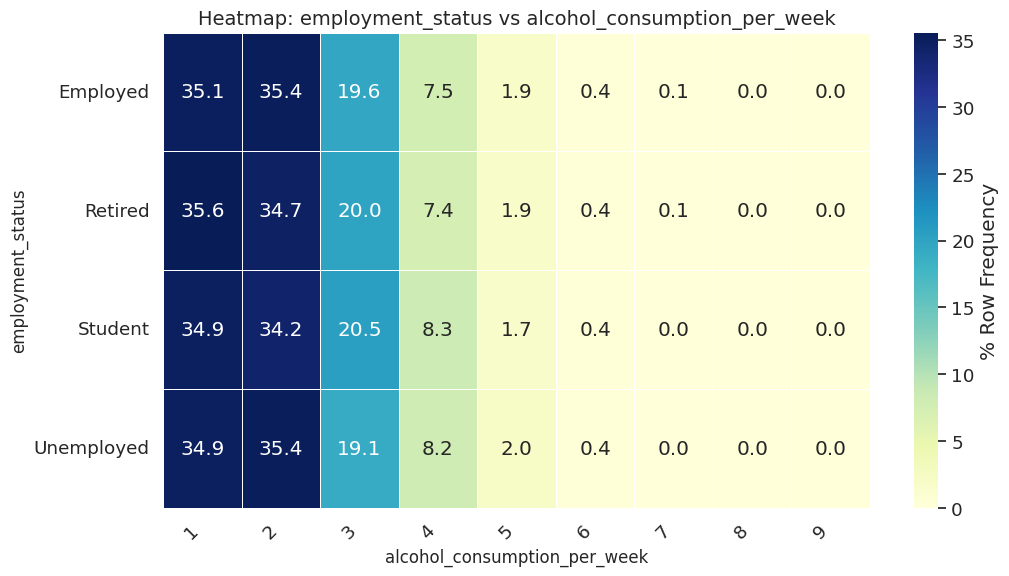

Categorical vs Categorical: family_history_diabetes  ×  hypertension_history

 Crosstab (Counts):

hypertension_history          0       1
family_history_diabetes                
0                        487858  107561
1                         84749   19832

 Crosstab (% by row):

hypertension_history         0      1
family_history_diabetes              
0                        81.94  18.06
1                        81.04  18.96


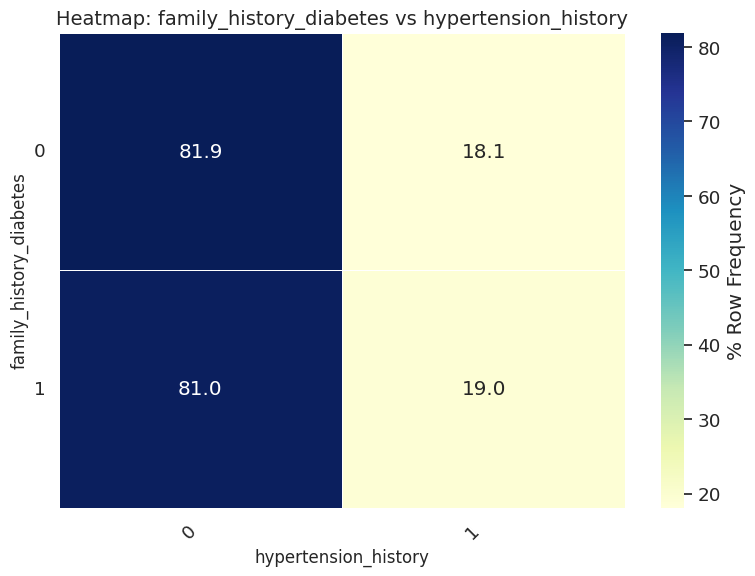

Categorical vs Categorical: family_history_diabetes  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history        0      1
family_history_diabetes               
0                        577464  17955
1                        101309   3272

 Crosstab (% by row):

cardiovascular_history       0     1
family_history_diabetes             
0                        96.98  3.02
1                        96.87  3.13


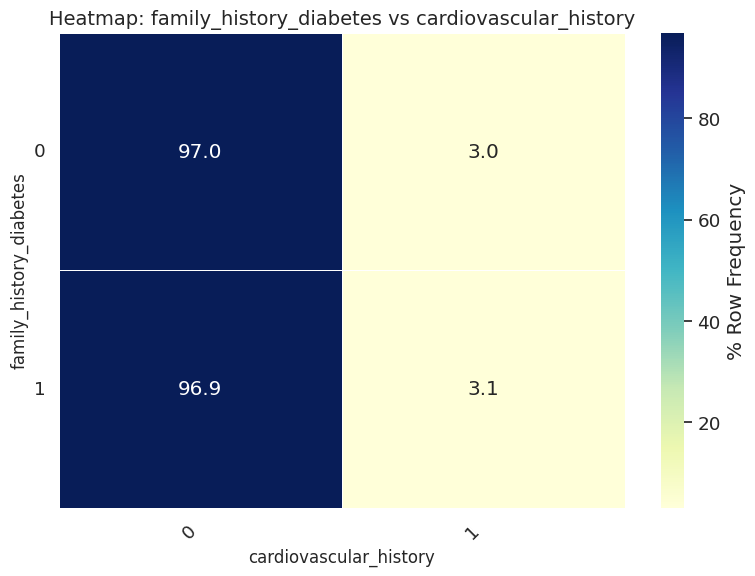

Categorical vs Categorical: family_history_diabetes  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2       3      4      5     6    7  \
family_history_diabetes                                                         
0                             210002  209245  117151  44881  11390  2315  380   
1                              36309   37347   20414   8092   1932   413   67   

alcohol_consumption_per_week   8  9  
family_history_diabetes              
0                             52  3  
1                              7  0  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5     6     7  \
family_history_diabetes                                                     
0                             35.27  35.14  19.68  7.54  1.91  0.39  0.06   
1                             34.72  35.71  19.52  7.74  1.85  0.39  0.06   

alcohol_consumption_per_week     8    9  
family_history_diabetes                  

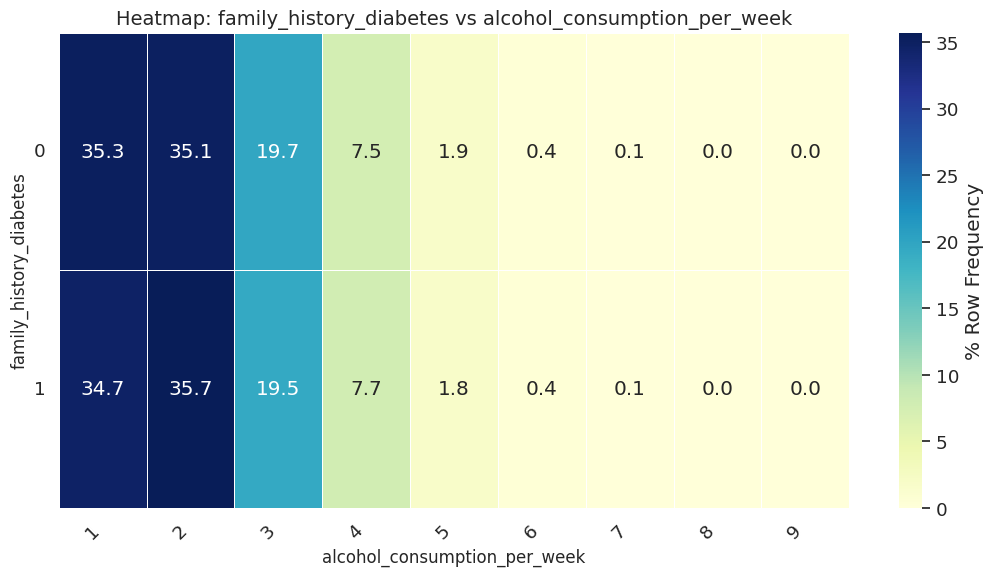

Categorical vs Categorical: hypertension_history  ×  cardiovascular_history

 Crosstab (Counts):

cardiovascular_history       0      1
hypertension_history                 
0                       555811  16796
1                       122962   4431

 Crosstab (% by row):

cardiovascular_history      0     1
hypertension_history               
0                       97.07  2.93
1                       96.52  3.48


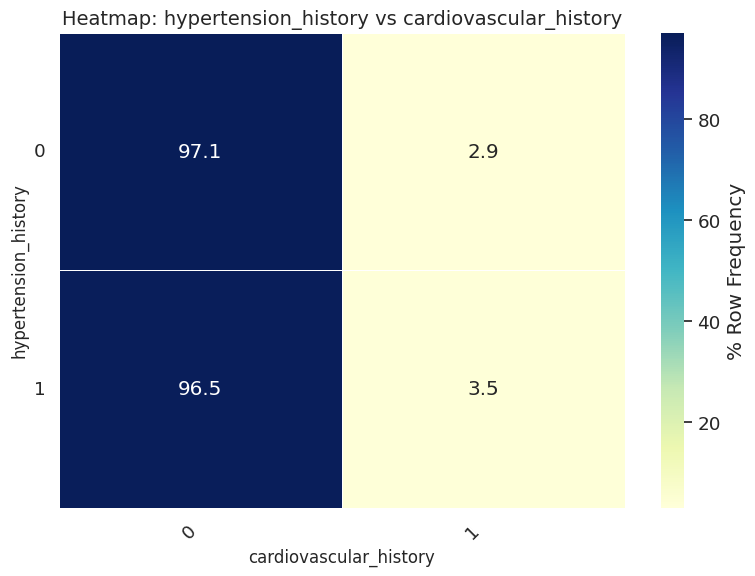

Categorical vs Categorical: hypertension_history  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2       3      4      5     6    7  \
hypertension_history                                                            
0                             201107  201541  112923  43457  10922  2238  373   
1                              45204   45051   24642   9516   2400   490   74   

alcohol_consumption_per_week   8  9  
hypertension_history                 
0                             44  2  
1                             15  1  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5     6     7  \
hypertension_history                                                        
0                             35.12  35.20  19.72  7.59  1.91  0.39  0.07   
1                             35.48  35.36  19.34  7.47  1.88  0.38  0.06   

alcohol_consumption_per_week     8    9  
hypertension_history                     
0 

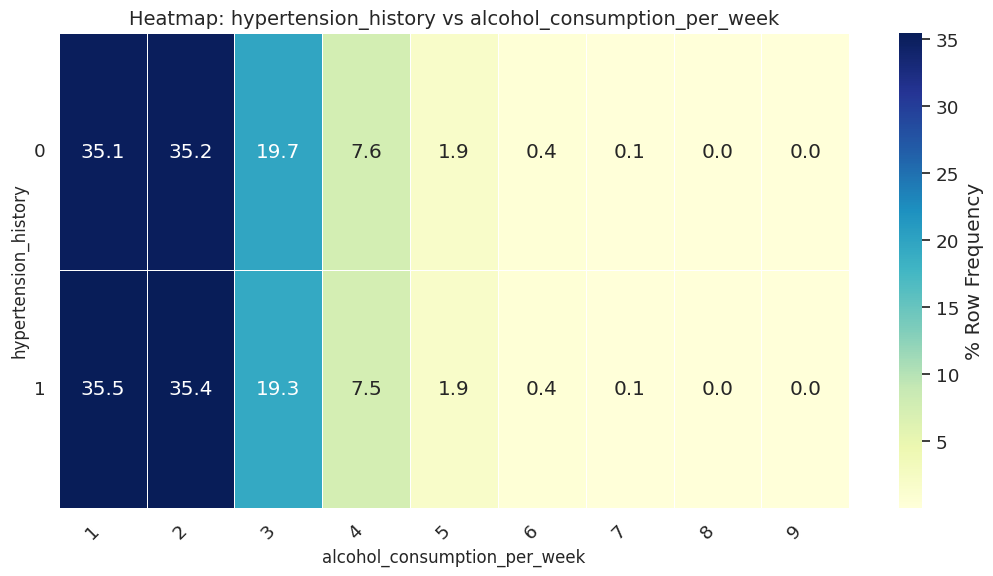

Categorical vs Categorical: cardiovascular_history  ×  alcohol_consumption_per_week

 Crosstab (Counts):

alcohol_consumption_per_week       1       2       3      4      5     6    7  \
cardiovascular_history                                                          
0                             238834  238959  133528  51388  12928  2650  425   
1                               7477    7633    4037   1585    394    78   22   

alcohol_consumption_per_week   8  9  
cardiovascular_history               
0                             58  3  
1                              1  0  

 Crosstab (% by row):

alcohol_consumption_per_week      1      2      3     4     5     6     7  \
cardiovascular_history                                                      
0                             35.19  35.20  19.67  7.57  1.90  0.39  0.06   
1                             35.22  35.96  19.02  7.47  1.86  0.37  0.10   

alcohol_consumption_per_week     8    9  
cardiovascular_history                   


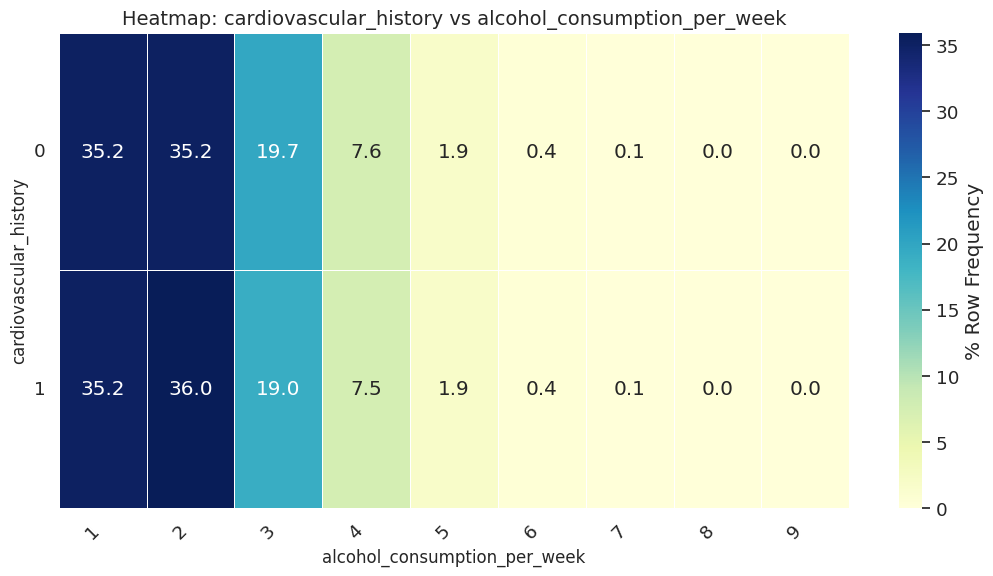

In [18]:
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):

        col1 = cat_cols[i]
        col2 = cat_cols[j]

        print("="*80)
        print(f"Categorical vs Categorical: {col1}  ×  {col2}")
        print("="*80)

        # -------------------------------
        # CROSSTAB (counts)
        # -------------------------------
        ct = pd.crosstab(train[col1], train[col2])
        print("\n Crosstab (Counts):\n")
        print(ct)

        # -------------------------------
        # CROSSTAB (percentage row-wise)
        # -------------------------------
        ct_pct = pd.crosstab(train[col1], train[col2], normalize="index") * 100
        print("\n Crosstab (% by row):\n")
        print(ct_pct.round(2))

        # -------------------------------
        # HEATMAP (counts or %)
        # -------------------------------
        plt.figure(figsize=(max(8, ct.shape[1] * 1.2), max(6, ct.shape[0] * 0.7)))

        sns.heatmap(
            ct_pct,
            cmap="YlGnBu",
            annot=True,
            fmt=".1f",
            linewidths=0.5,
            cbar_kws={"label": "% Row Frequency"}
        )

        plt.title(f"Heatmap: {col1} vs {col2}", fontsize=14)
        plt.xlabel(col2, fontsize=12)
        plt.ylabel(col1, fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)

        plt.tight_layout()
        plt.show()

## Correlation Analysis¶


===== FAST CORRELATION ANALYSIS =====

Using sample of 5000 rows for correlation.



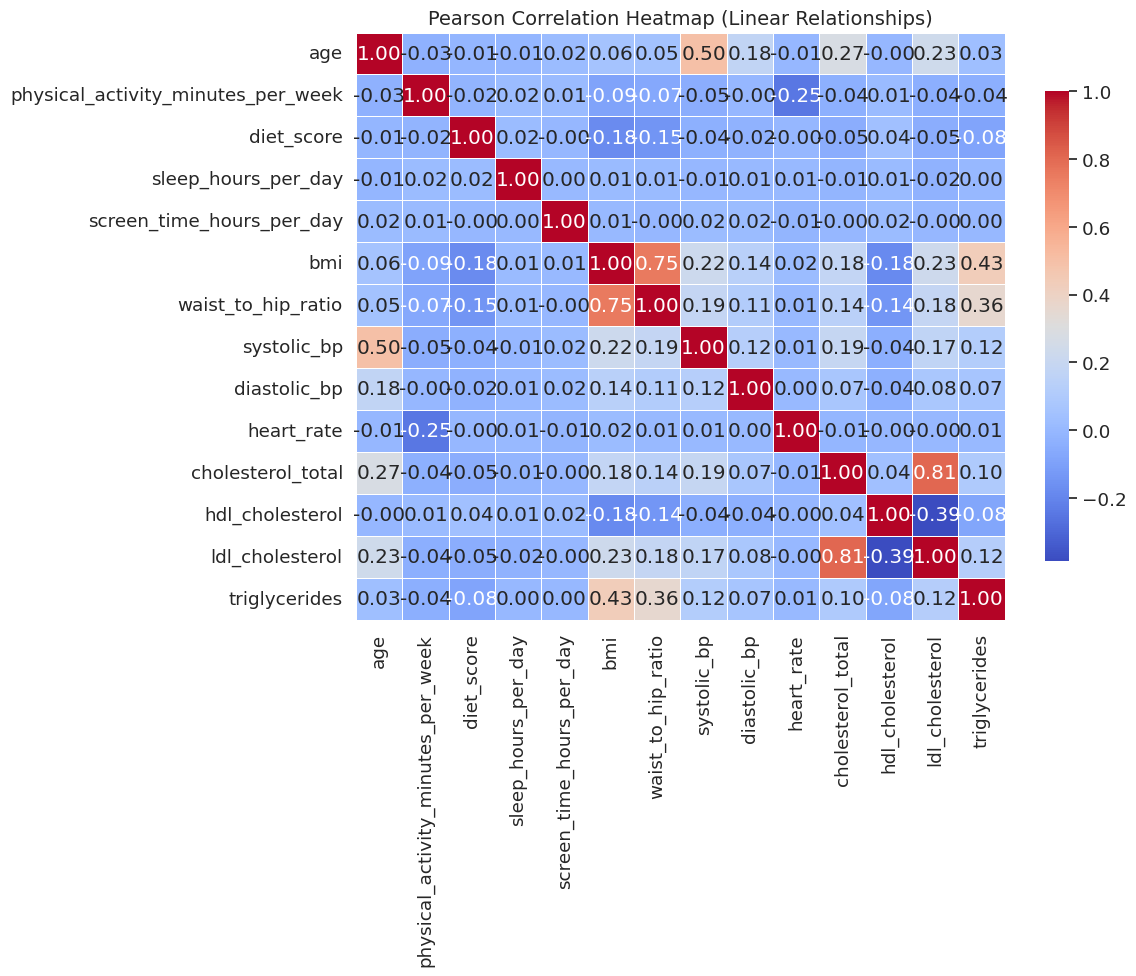

 Highly Correlated Feature Pairs (|corr| > 0.80):

             Feature1         Feature2  Correlation
86  cholesterol_total  ldl_cholesterol     0.810085
 Suggested Redundant Features to Drop (if any):
['ldl_cholesterol']


Using top correlated features for Spearman: ['physical_activity_minutes_per_week', 'age', 'systolic_bp', 'bmi', 'ldl_cholesterol', 'triglycerides', 'cholesterol_total', 'waist_to_hip_ratio', 'hdl_cholesterol']



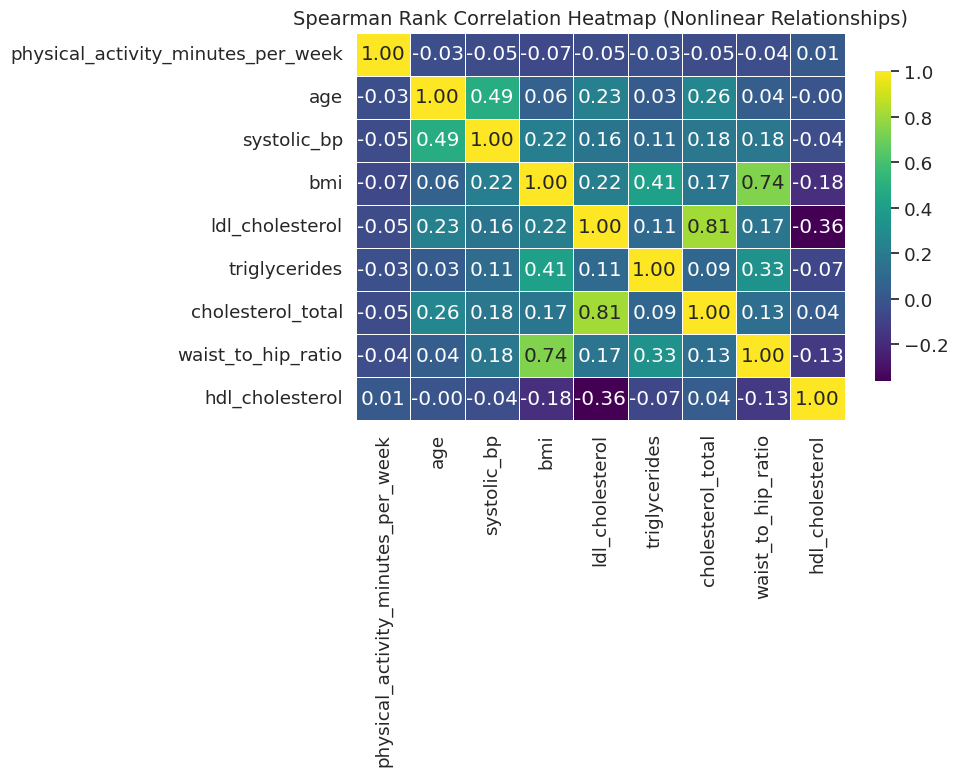

In [19]:


print("\n===== FAST CORRELATION ANALYSIS =====\n")

# -------------------------------------------------------
# SAMPLE THE DATA (5k rows is enough for correlation)
# -------------------------------------------------------
sample_size = min(5000, len(train))
df_corr = train.sample(sample_size, random_state=42)

# -------------------------------------------------------
# SELECT NUMERICAL COLUMNS
# -------------------------------------------------------


# Remove ID + target
for drop in ["id", target]:
    if drop in true_num_cols:
        true_num_cols.remove(drop)

print(f"Using sample of {sample_size} rows for correlation.\n")

# -------------------------------------------------------
# PEARSON CORRELATION HEATMAP (with labels)
# -------------------------------------------------------
plt.figure(figsize=(12, 10))
corr_matrix = df_corr[true_num_cols].corr(method='pearson')

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,              # <<< LABELS ADDED HERE
    fmt=".2f",               # round to 2 decimals
    linewidths=0.4,
    square=False,
    cbar_kws={'shrink': 0.8}
)

plt.title("Pearson Correlation Heatmap (Linear Relationships)", fontsize=14)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# IDENTIFY HIGHLY CORRELATED PAIRS
# -------------------------------------------------------
threshold = 0.80
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
               .stack()
               .reset_index()
               .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)

high_corr = corr_pairs[abs(corr_pairs['Correlation']) > threshold]

print(" Highly Correlated Feature Pairs (|corr| > 0.80):\n")
print(high_corr if not high_corr.empty else "None found.\n")

# -------------------------------------------------------
# REDUNDANT FEATURE SUGGESTION (FAST)
# -------------------------------------------------------
redundant_features = set(high_corr["Feature2"].tolist())

print(" Suggested Redundant Features to Drop (if any):")
print(list(redundant_features) if redundant_features else "None")
print("\n")

# -------------------------------------------------------
# SPEARMAN CORRELATION (ONLY ON TOP 10 FEATURES) — FAST
# -------------------------------------------------------


top_corr_feats = (
    train[true_num_cols + [target]]
    .corr()[target]
    .abs()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

if target in top_corr_feats:
    top_corr_feats.remove(target)

print(f"Using top correlated features for Spearman: {top_corr_feats}\n")

plt.figure(figsize=(10, 8))
spearman_matrix = df_corr[top_corr_feats].corr(method='spearman')

sns.heatmap(
    spearman_matrix,
    cmap='viridis',
    annot=True,              # <<< LABELS ADDED HERE
    fmt=".2f",               # rounded labels
    linewidths=0.4,
    square=False,
    cbar_kws={'shrink': 0.8}
)

plt.title("Spearman Rank Correlation Heatmap (Nonlinear Relationships)", fontsize=14)
plt.tight_layout()
plt.show()

## Outlier Analysis

OUTLIER ANALYSIS FOR: age
Outlier Count: 1013
Outlier Percentage: 0.14%
IQR Lower Bound: 18.00
IQR Upper Bound: 82.00



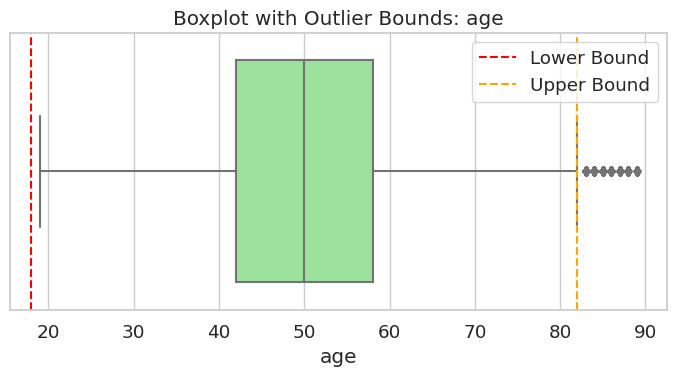

OUTLIER ANALYSIS FOR: physical_activity_minutes_per_week
Outlier Count: 33490
Outlier Percentage: 4.78%
IQR Lower Bound: -21.50
IQR Upper Bound: 166.50



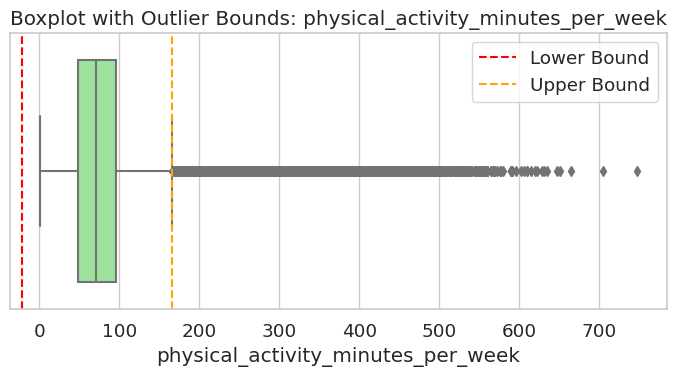

OUTLIER ANALYSIS FOR: diet_score
Outlier Count: 1997
Outlier Percentage: 0.29%
IQR Lower Bound: 2.00
IQR Upper Bound: 10.00



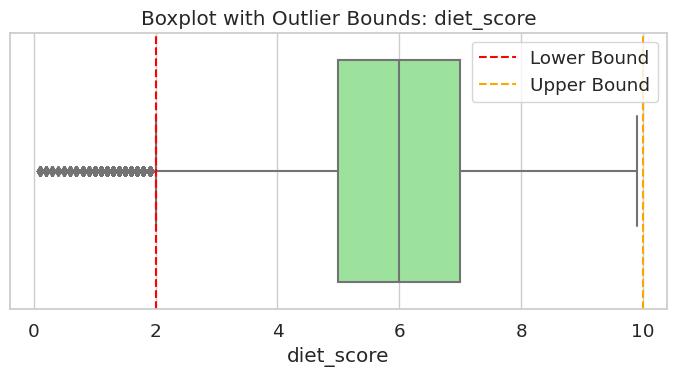

OUTLIER ANALYSIS FOR: sleep_hours_per_day
Outlier Count: 6152
Outlier Percentage: 0.88%
IQR Lower Bound: 4.60
IQR Upper Bound: 9.40



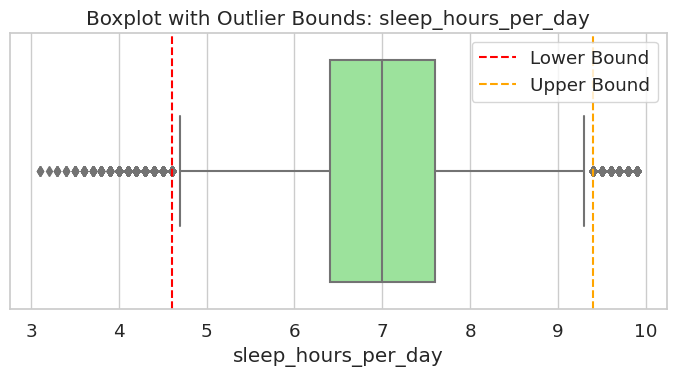

OUTLIER ANALYSIS FOR: screen_time_hours_per_day
Outlier Count: 2337
Outlier Percentage: 0.33%
IQR Lower Bound: 0.40
IQR Upper Bound: 11.60



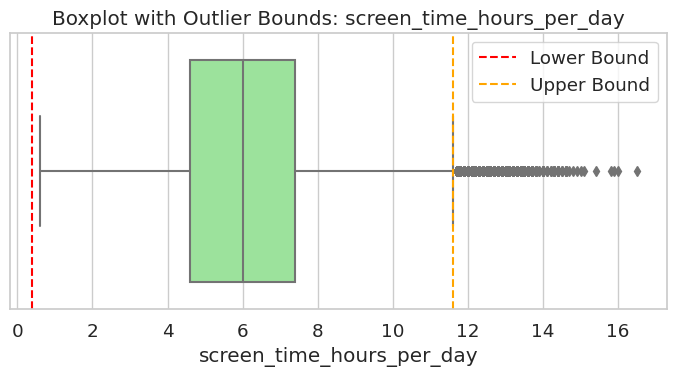

OUTLIER ANALYSIS FOR: bmi
Outlier Count: 4254
Outlier Percentage: 0.61%
IQR Lower Bound: 18.05
IQR Upper Bound: 33.65



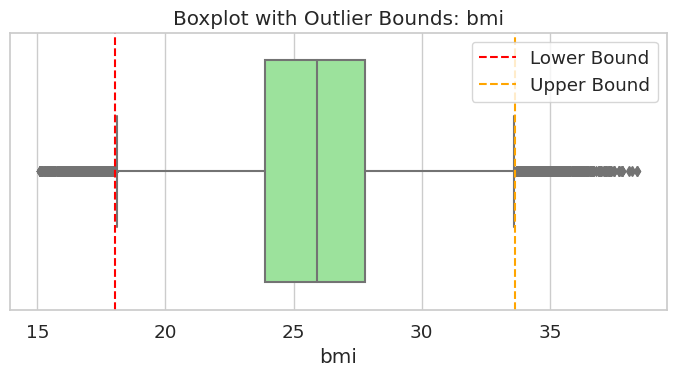

OUTLIER ANALYSIS FOR: waist_to_hip_ratio
Outlier Count: 6159
Outlier Percentage: 0.88%
IQR Lower Bound: 0.75
IQR Upper Bound: 0.96



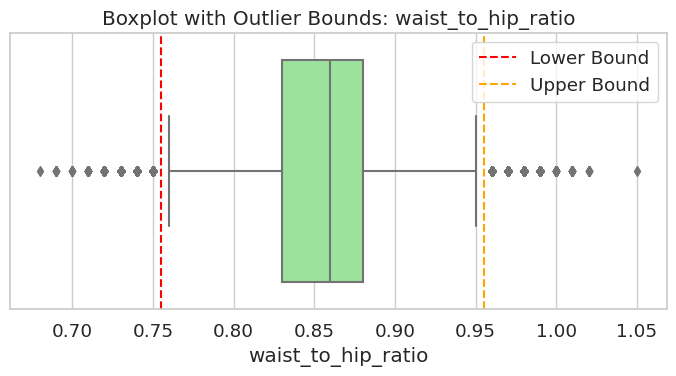

OUTLIER ANALYSIS FOR: systolic_bp
Outlier Count: 775
Outlier Percentage: 0.11%
IQR Lower Bound: 84.00
IQR Upper Bound: 148.00



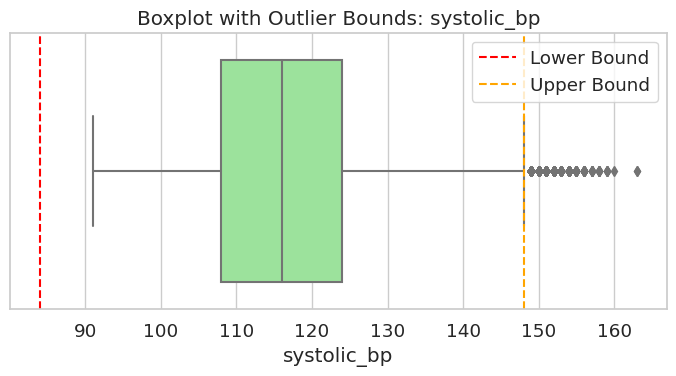

OUTLIER ANALYSIS FOR: diastolic_bp
Outlier Count: 5752
Outlier Percentage: 0.82%
IQR Lower Bound: 57.50
IQR Upper Bound: 93.50



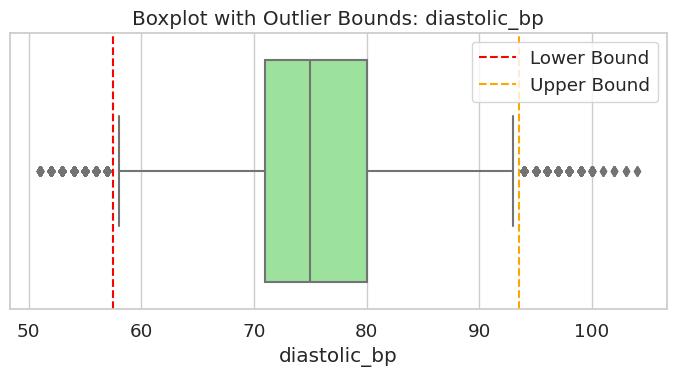

OUTLIER ANALYSIS FOR: heart_rate
Outlier Count: 1797
Outlier Percentage: 0.26%
IQR Lower Bound: 50.00
IQR Upper Bound: 90.00



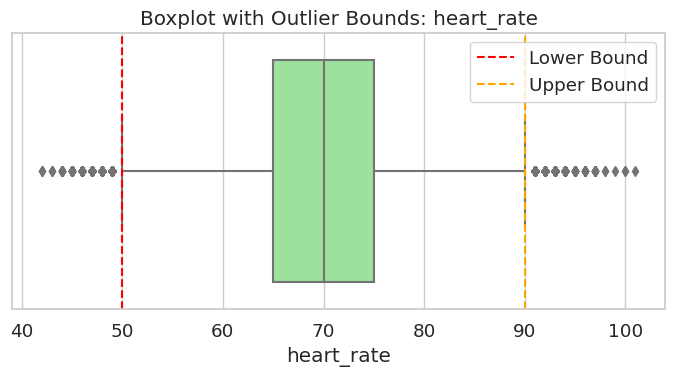

OUTLIER ANALYSIS FOR: cholesterol_total
Outlier Count: 1771
Outlier Percentage: 0.25%
IQR Lower Bound: 139.00
IQR Upper Bound: 235.00



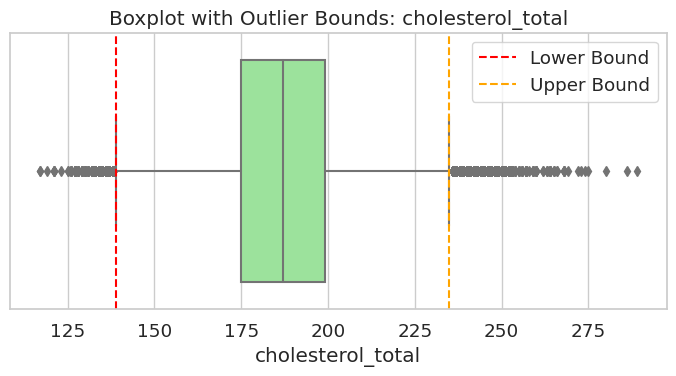

OUTLIER ANALYSIS FOR: hdl_cholesterol
Outlier Count: 4693
Outlier Percentage: 0.67%
IQR Lower Bound: 31.50
IQR Upper Bound: 75.50



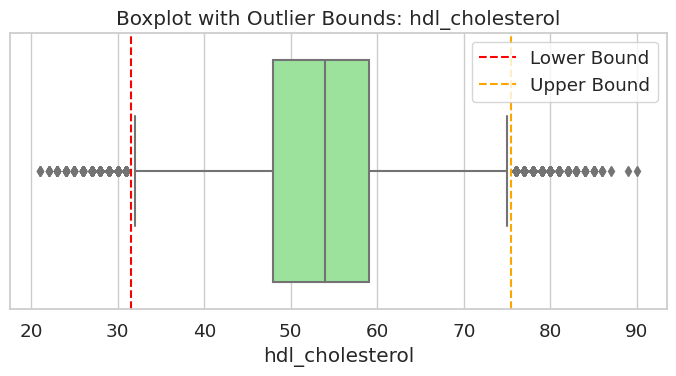

OUTLIER ANALYSIS FOR: ldl_cholesterol
Outlier Count: 2290
Outlier Percentage: 0.33%
IQR Lower Bound: 48.50
IQR Upper Bound: 156.50



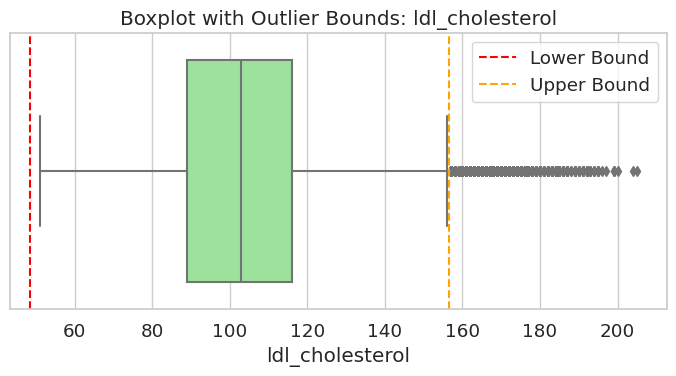

OUTLIER ANALYSIS FOR: triglycerides
Outlier Count: 9053
Outlier Percentage: 1.29%
IQR Lower Bound: 56.50
IQR Upper Bound: 188.50



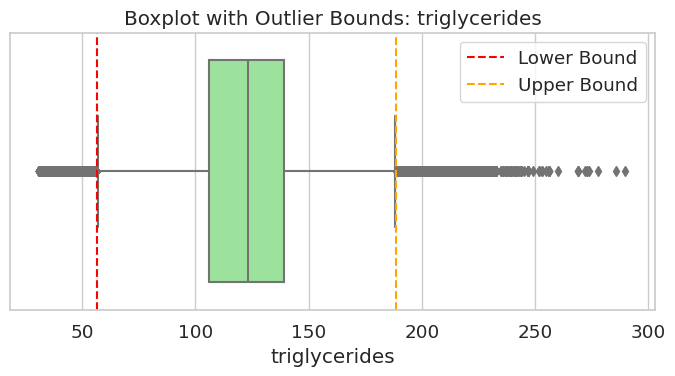


====== OUTLIER SUMMARY TABLE ======
                               Feature  Outliers (%)  Lower Bound  Upper Bound
0                                  age          0.14        18.00        82.00
1   physical_activity_minutes_per_week          4.78       -21.50       166.50
2                           diet_score          0.29         2.00        10.00
3                  sleep_hours_per_day          0.88         4.60         9.40
4            screen_time_hours_per_day          0.33         0.40        11.60
5                                  bmi          0.61        18.05        33.65
6                   waist_to_hip_ratio          0.88         0.75         0.96
7                          systolic_bp          0.11        84.00       148.00
8                         diastolic_bp          0.82        57.50        93.50
9                           heart_rate          0.26        50.00        90.00
10                   cholesterol_total          0.25       139.00       235.00
11             

In [20]:
# Remove id + target
for drop in ["id", target]:
    if drop in true_num_cols:
        true_num_cols.remove(drop)

outlier_summary = []

for col in true_num_cols:
    print("="*70)
    print(f"OUTLIER ANALYSIS FOR: {col}")
    print("="*70)

    # ------------------------------
    # Detect outliers using IQR
    # ------------------------------
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = train[(train[col] < lower) | (train[col] > upper)][col]
    outlier_count = outliers.count()
    outlier_pct = (outlier_count / len(train)) * 100

    print(f"Outlier Count: {outlier_count}")
    print(f"Outlier Percentage: {outlier_pct:.2f}%")
    print(f"IQR Lower Bound: {lower:.2f}")
    print(f"IQR Upper Bound: {upper:.2f}\n")

    # ------------------------------
    # Save summary for final table
    # ------------------------------
    outlier_summary.append({
        "Feature": col,
        "Outliers (%)": round(outlier_pct, 2),
        "Lower Bound": round(lower, 2),
        "Upper Bound": round(upper, 2),
    })

    # ------------------------------
    # Plot boxplot with boundaries
    # ------------------------------
    plt.figure(figsize=(7,4))
    sns.boxplot(x=train[col], color="#90EE90")
    plt.axvline(lower, color='red', linestyle='--', label="Lower Bound")
    plt.axvline(upper, color='orange', linestyle='--', label="Upper Bound")
    plt.title(f"Boxplot with Outlier Bounds: {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------
# Outlier Summary Table
# ------------------------------
outlier_df = pd.DataFrame(outlier_summary)
print("\n====== OUTLIER SUMMARY TABLE ======")
print(outlier_df)

## Multicollinearity Check

In [21]:
print("\n===== MULTICOLLINEARITY CHECK =====\n")

# -------------------------------------------------------
# SAMPLE FOR SPEED
# -------------------------------------------------------
sample_size = min(5000, len(train))
df_corr = train.sample(sample_size, random_state=42)

# -------------------------------------------------------
# SELECT NUMERICAL COLUMNS
# -------------------------------------------------------


# Remove ID + target
for drop in ["id", target]:
    if drop in true_num_cols:
        true_num_cols.remove(drop)

# -------------------------------------------------------
# CORRELATION > 0.85 (REDUNDANT FEATURES)
# -------------------------------------------------------
corr_matrix = df_corr[true_num_cols].corr()

# Find highly correlated pairs
threshold = 0.85
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 1).astype(bool))
               .stack()
               .reset_index()
               .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)

high_corr = corr_pairs[abs(corr_pairs['Correlation']) > threshold]

print(" Highly Correlated Pairs (|corr| > 0.85):\n")
print(high_corr if not high_corr.empty else "None found.")
print("\n")

# Proposed redundant features (drop second feature in each pair)
redundant_from_corr = list(high_corr["Feature2"].unique())

print(" Suggested Redundant Features (Correlation > 0.85):")
print(redundant_from_corr if redundant_from_corr else "None")
print("\n")

# -------------------------------------------------------
# VIF — VARIANCE INFLATION FACTOR
# -------------------------------------------------------
print(" VIF Analysis (Variance Inflation Factor):\n")

# Prepare dataframe for VIF
X = df_corr[true_num_cols].copy()
X = X.dropna()

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df, "\n")

# -------------------------------------------------------
# REMOVE FEATURES WITH VIF > 10
# -------------------------------------------------------
high_vif = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()

print(" Features With High VIF (> 10):")
print(high_vif if high_vif else "None")
print("\n")


===== MULTICOLLINEARITY CHECK =====

 Highly Correlated Pairs (|corr| > 0.85):

None found.


 Suggested Redundant Features (Correlation > 0.85):
None


 VIF Analysis (Variance Inflation Factor):

                               Feature         VIF
0                                  age   27.664989
1   physical_activity_minutes_per_week    3.733793
2                           diet_score   17.604825
3                  sleep_hours_per_day   57.975471
4            screen_time_hours_per_day    9.673107
5                                  bmi  192.105740
6                   waist_to_hip_ratio  628.405091
7                          systolic_bp  152.877856
8                         diastolic_bp  123.735742
9                           heart_rate  100.513857
10                   cholesterol_total  620.430407
11                     hdl_cholesterol   91.206658
12                     ldl_cholesterol  176.218560
13                       triglycerides   31.995143 

 Features With High VIF (> 10):
['a